# Vision-Language Models (VLMs)

Vision-Language Models (VLMs) are powerful systems designed to handle both visual and textual data. By combining image understanding and text generation, VLMs can perform a wide range of tasks, such as image captioning, visual question answering, object detection, and more. In this session, we will explore how different components of a VLM can be integrated to create a unified system capable of processing and reasoning across modalities.

## Introduction to PaliGemma2

PaliGemma2 is an example of a VLM that integrates two key components:
- **SigLIP-400m/14**: A vision encoder that processes images into embeddings (numerical representations).
- **Gemma 2**: A text-only language model that generates text based on input tokens.

These components are merged through a linear projection layer that aligns the image embeddings into the same space as the text embeddings. This allows the model to seamlessly process both image and text tokens together.

### Training Process
The training of PaliGemma2 involves three stages:
1. **Unimodal Pretraining**: SigLIP is trained for image encoding, while Gemma is trained for text generation independently.
2. **Multimodal Pretraining**: The pre-trained SigLIP and Gemma models are combined and jointly trained on 1 billion image-text pairs at 224×224 resolution. Tasks include:
   - Captioning (short and descriptive)
   - Optical Character Recognition (OCR)
   - Visual question answering
   - Object detection and segmentation
3. **Resolution Scaling and Fine-Tuning**: The model is further trained with higher-resolution images (448×448 and 896×896) to improve performance on tasks requiring fine details, such as OCR or object segmentation.

This extensive training equips the model with world knowledge and multimodal reasoning capabilities.

---

### Workflow Overview

For this question, we will work with the smallest resolution of **224×224 pixels**, which divides the image into **14×14 patches**. Each patch corresponds to an "image token." Here's the step-by-step workflow:
1. **Image Embedding Generation**: Use SigLIP to convert an input image into embeddings.
2. **Projection Layer**: Pass these embeddings through a linear projection layer to align them with the text embedding space.
3. **Token Concatenation**: Combine the projected image tokens with text tokens.
4. **Text Generation**: Feed these combined tokens into the Gemma language model to generate outputs.

Below is a flowchart summarizing this process:

---

<img src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAABCEAAAMTCAYAAACfZw3WAAAgAElEQVR4Aey9f8wlV3nn2X+ZCCmW1hoR7aBldjwis0iTbYMBA2O0GQUR4exqNyKZVYZkEokhMd3QNjaBjCc44ACJCUkAE0iabWcC04YB96wzg5khYZI4ssIECI4SZxzHgICkYWYt0SaxjSG4a/U5fZ/Leeute2/dWz9u/fi8Uqnqrapz6pznfKrqPN/7nFNHjnT899wfv+V/ec7L3/kvnn31Lb90xdW3/D7Ls6++5ctXXH1L4aINZEAGZEAGZEAGZEAGZEAGZEAGZKB/BhZ+efjov4Tfjv/esUTQTfYUHNFBsaF/kLx5tbkMyIAMyIAMyIAMyIAMyIAMyMCuDODH48+PQpBQeBD0XUE3nezIgAzIgAzIgAzIgAzIgAzIwLAYQJAYZISE4sOwQPHGtT1kQAZkQAZkQAZkQAZkQAZkQAbaYmAw0RGLuR6c38H5LZzfQwZkQAZkQAZkQAZkQAZkQAZkYOIMRGRENxM7rMmVsSGLSSaFbOKQtaWcmY8qrAzIgAzIgAzIgAzIgAzIgAxMgwHEiN7mjDD6YRrQePPbjjIgAzIgAzIgAzIgAzIgAzIgA7sy0EtUBHM/7FpA0wm3DMiADMiADMiADMiADMiADMiADEyLAXSCNQMpdj+kADEtULzxbU8ZkAEZkAEZkAEZkAEZkAEZkIE2GGhdiHD+B8FsA0zzkCMZkAEZkAEZkAEZkAEZkAEZmB4Dz3n5O5kv8vd3D3vIUhoBMT1AvOltUxmQARmQARmQARmQARmQARmQgbYZaBwRoQAhlG1DaX4yJQMyIAMyIAMyIAMyIAMyIAPTZICIiJ2FCL6CIRjTBMN2tV1lQAZkQAZkQAZkQAZkQAZkQAa6YgA9IRtgsXmT733yuY2uCmS+wi4DMiADMiADMiADMiADMiADMiAD02NgEQ3xZXSFzerD4gwFiOmB4M1tm8qADMiADMiADMiADMiADMiADPTIQL2JKh2GIZQ9QskMqi7aQAZkQAZkQAZkQAZkQAZkQAYmyMDGYRkOw9AhVhSQARmQARmQARmQARmQARmQARmQgTYYYJTF2iEZfg1D0NoAzTzkSAZkQAZkQAZkQAZkQAZkQAZkAAZWfi3DKAgB8SEhAzIgAzIgAzIgAzIgAzIgAzIgA20ysDIawrkgBK1N0MxLnmRABmRABmRABmRABmRABmRABmCgMhrCL2IIhw8IGZABGZABGZABGZABGZABGZABGWibgUPREAzFaPsi5ie4MiADMiADMiADMiADMiADMiADMiADMIDusJyk0gkphcIHgwzIgAzIgAzIgAzIgAzIgAzIgAx0xcCBIRkOxRC0rkAzX9mSARmQARmQARmQARmQARmQARlYDslwKIYw+ECQARmQgTkx8JyXv7Poo77PPfau4orjp4orTpyuXjh27GTRV3n6qLPX8FkiAzIgAzIgAzKwjoE0JMOvYgjJOkg8Jh8yME0GcHxjGWMblx338v9RJ/b/k2vfU/yLXzhT3HDyI2nN/6vOj3S7rFOeCAvXnymuvOmPiu+++S+Kf/zWs8WL3vallQvnXPVzf1w8+4bfS0JFEi6uniZzu9jUNLLQFwPcv108F/oqv9fxXpEBGRgLA+gPR5wPQmDHAqzllFUZuMDAhz9+f3H3n35h5+V3Pv254rb//CfFL3zgruIlb3x/8aLX3Frg/I6hE04ZERTK9adO1CVnhHPZx7EHH3q0OPfw18+z3POZL6f9bTgcKY9jJ5OAgKDw/FseKp7/rm+k5cpfK4oXnHy89vKidz+cxIrvff1dKYJCQcJnXs6z2+3ywL3LPYYoWbVwzHuwXZvLsPaUARmAgTQvxBVX3/L7AiEQMiADMjAeBnCo2/p7+LFvFmcf/GqBsEGkAJ3xIbOA40A5y3+IC9fe8u8PlB0H4oEvfKl8avo/hIgmdSV/IhiIdkB4eNa7zqcF8aHuskqkQMxA1CCqog2xpEk9TTueZ4NttbmtuG9f+OoPFK/4pU8VP3frZ4t3/JuzxckPfeXAwj6Occ4/e+3tihFGZx14t3ifbb7PtJE2WsXAok/z+0cUIYRkFSTulw0ZGCYDbYoQuYdOvhFRMFTHt64Iseq8vL7v+s0/3MnBT7Y5cbq4/Gf+pHj62x9Zig8hQlStdxUlECMY2pHmltAR0BGQgUYMILL+9Dv/OAkOH7zzfFFnQaBAkECMGOpz0Xf1MN/VtovtIgMrGfh9hmN8WQOtNFCjl5121a4yIANdMNCVCBEOOvkzVIMO+9A63avEhapICIacrPvj+Nb1O3YyRT8gPhx95/mNSwgSnJ8vsT/Wm0QKoi3SBJc6ob6XZWBrBniW/fib79pKfCgLFKf//deSgDH0aLEu3jnmaV9GBmSgTQbSFzLazNC8BFQGZEAGumegaxECx/2RRx5LQsTQxkTXFSE4DyFl3d/WkRDHThbfdcOnisve9rcbxYckUrzpbIqWYMgGyzN/8qPLhf+JcHjGTQ+k4RycH4JErMvCRBIiHJ6xtQPqM6n7Z9KQbcwzjGEViAhlYWGX/4mkYDjH1gKm4pH3rgzIgAwsGWA4xvIft7WFDMiADAyfgSoR4vNnH0xDKRhOsWlhUkfmRCANYsOqP+aKwJEfkhBRV4SAYybcrLIV9aVu5Tkk1rJ//FQSFJIA8faiOFqxhPCAwJCiFjZ8gjPZNT7hef2ZWsM7jIgY/v25liP7XL32OYlaqCNAIFDkyyZxguEZPF9sa+9HGZABGdiNAUUIOwS+RGVABkbGQJVjvc3QAhx5HGA60UzyiCixSoxAqMBZH4oQsY0Iwbk33vrbSWzJhRYECPbXrtNCgKgSHtiHMEFEA5NIXsGXMnbkifIy9wMiRhI0SsM9iJBI1zlxeudr7Fo20+3WydJu+7Mb9/fL3/LxlREQiA5MQElkw0tv+u3iR193Z1rYZh/H1kVPIETUfobs+EyQn/3xo+21vQx0y4AihC8GO7MyIAMjY6CpCJG/WHF8f+DG96VPduaOer5NZMVQ5ofYRoSgnjgJfNKTiA6EGoZgIKrUHte9GILx9JsfLY7+8vnDy83nkmjwrOPvbe0+SmLE9WeKo286e2DYRwgQ6fjImM2Zc7vbjp32vSUNlWAiSSaVrIpqYD9iA0Js1f3EPo4hYqzKg3wRLrS3PMuADMjA9gwoQtiR8wUqAzIwMgbaFCHixYlTjoPOJzvLf+zDca/qrEf6vtaUoe4nOqNMpEGMoI6s69aD81JUwhoBgnke6uYX5amzJk+EDYSHNATkTU5MWcdunrN9R3CKNuM+J1KhSoAgwqHuly7Ih3NJU5UX16gtaI7sPTNFLqyTzwcZGA4DihC+FHRAZUAGRsZAFyIETi+//H344/eXNYj0P3NI0CHf9wuccm4rQuxaZkQAIiAue+v5QwtRCgy/6EKAOFDeRSRGGuoxMk4P1MOy7/3emUt7cE8S5VA1lIKoBkSFbW3BRJRVERFcw2iI4Tg127ar59t2MrA/BhQh7Bht/TL2ht3fDavttT0MdCFCkC+d95e88f2V80NwTYZt7JvB3kSIYycvTERZJUDcfC5NPNm5ALF4Pw1B/Nl3u3t9n311GeB+YU6HqsgFhlfsct+SJ2mr8mTiS+9R+azLp+fJigxcYEARQhFi706FN6MPZBnYjoGuRAjagQ56VTTEuYe/fp4hGXXbKu/os50vdfOoOo98eomEuPbOyigIIiPSly8m+O7AtsmZYnLNYye3GrpS1VZN9+XlacvJy/PcRx25fl4G6sX/bdkq2q+tfNeVi2uUlzbqsu6adY9RLiIUGC5BBAMRC02HThApVhUNwVANh2Rs9w6r246ep11lYLoMKEJMsCPpDTvdG9a2tW1hoGsRAie/PDcE//NFiU0M5k4WHXOiJ5gYMhYiLejMbzs/Q1yX/LcVIaJM+Tryq1wfO5nmYnjGzX9bPP3ni+XC/991w7R+9cRZQ1RhbgvqdvnP/MmBJX1ulK9+HD/Vy6+9tBHXojxX3vRHB5ZlWbb8AknkyZCW7339XcVVP/fHBxb2peEufC61oz5BKsOxk8ULb7iz+Kdv/njxkl/6s+XC/+yn3ttcf5nnqz+Q8lyVL/daOrdh3cgDXhiagINPZABRANe+4960sM0+jnEO57Zx3W1skp/Ltak7wy8oG+VqUh7qUzXPBAIHz7T82m77rpYBGZCB9QwoQjR8KQvYesC0j/aRgfYZ6FKEoL0QDMrXQITgCxOr2jM694gOTHBJNAXzSPCJTz6JGQv/s5/PgvK1CqIrtnGSuM42IgSOAw5CeeGaq+qCQ1oWIBAjjt58Lk0WuTLdmN4nx04mR5+JL6lX1SdBjy4+EZqOvens8jOk0dZ17ID9y2IC/1fOcXHidDr3H7/1bPH8d32jeMHJxw8s7Hv+LQ8V333zX6Sy1yrHsZMpzxe97UvFi979cPG//z+PFz9w6+GFY5yTBInjpzY6q1wb4aAsaLDvULmOnUz5/vCvnC1+4l9/rXj5vzl/YGHf1e95sOA418dmm2zLNTg38nz1bd8sfvoDjx9a2E/eiB4IA4fKVpNZ7hdEjuvf/UBx4+mvFDd98NHirWcer1w4xjmcy9wMa++1mtffZI9Nx7FpHbuuy4f0VSIEQzSw7bq0Hmv/PahNtakMjJsBRYieXoDeKOO+UWw/229IDJQFAmaOxKHf1cEo141oBUSD/G+dCIGDT5QEwkI5giLPY9U210K44Lqb6sDxuiIE5yJylMu0ri7Y4lmvvW8Z/ZBHQvBL/KbylW05uP+Pn0pf/EB4OPr2ot6yECNClGBSTiIVGM6wsX7HTqbPjD7rXeeLfElRDfH+PXE6RV9w/MpfK2oviBWVYgb5LsQHRAvEDMSHOgsCBYJEpZgQ5V3kjxjyz3/j8QMLosSSkeOnklDwQ+/56wPnRJqyGBH/hxixzCe/7iJPhAUEhroLAgXnIiTUarfF521xrhEwXv+BvyneePvjh5Y333G+YFklSLCftERINBFBNnKW26ijbUUI+wFD4NAyyOFUGFCE6OhlNRVArIcPOxkYHgNdixBEQjAHRC4aVDnudMoRDoh6KJ+fp62zTf5ESCAwrPvFEsdsWxGifP2qugTnfBHj8hvPFZe/8fGDy43najtvkdfg1sdPJWefeS2O/vL5CwJEvmY7/t8gUBAdwfCNjUMIFiLEUsBYCBpLQefE6QJRIxcoVm1XCRSIDIfm6Dh+KkVLVEVTlKMrVgkUG4WIYyfTNcpRFUsR4tjJFCXB8RAd6qwRIjiP6AiEkPxeYBsRoSqaIgQM1puECfLI8y1zyj3GQqQFYkceYVElRKzalwsUnENkxJgjBrBZVSSEwzGG944sM+3/tpEMDI8BRQhFiM2/ZGkjbSQDg2KgSxEC54NhF+W/Rx55LDn/8SKnQ06UAVEMOPVt/XEdoipWOUldixD8wv/Mmx47KEAgSPzMnwyKgWiHOmtshliQhl6E0LBmfdnb/rZgSYLEGlGCc8hz7S/ra0QIohgQIMoCRfn/VaJE7E8RESdOX2ifE6eTOFAlWFQJEFX7ImKC4RnrIi2IhKgSIbB11bHyuZtECSIolhEZx07WEiByMSK2ESVycSIEjpXsLIaPkC4XIOpsrxIkYv9PnfriVsOvVpZxD+8khpUwCWX5CxlOTDk852ZI3FgW+ZCBagYUIfbwIhPGahi1i3aRgXoMdClC0NF+4AtfOqQpEOlAhARtFAJE1Xl5QtIgUnAeUQ4xR8SmqAnqtyoioksRgnoxFIMoiGe+oTggRKThByN9XxDdgVhwWdXnRn/5/AXB4eZz6RzElnyCyiQS3HzuoChREiaSQLNqaMYKEYJrJFGkNNQj5p/Iy5HOY/jIOw8O6QgRgnWUgXXsDyEi5pJArMjnp0AoIJJiXcQE51SKLItIiBAsYs35XIP/c9Eh5pzI55DgXISOVcM1ECkYmkGkB1EJVeexj3MYMhF5sx1zRYQQUV4T4VBVL+4BroVQUY6oiCEd7I95JoiqiIXrEu3wr37jvy/FixAf8jXnDGGeiG3fN0xwWfV1DD/RWe+9ta29PV+7ysC0GVCEGGmn0htz2jem7Wv7rmOgKxEiHPyqyAauydwPnIMYgaCw6o9zmaOCiAbOZcgGE1ay5n8EBo5X1SPyJH/SpF/xs+d0lDHOizXCBpEZud04l33lv5XDMY6dPCBCIEQkMYKhGPFLe1aW/FqD3T52MjnoTLRZKULcfC7NEZF+8S9NyJiiUfhiw/Vn0jnLYRylKAoiIpbDK8r2QYSoGtoRwgbHFkJEEhIWX+I40O4IHCdOXyjD2x9Znh/pWCNe5AJECBGslxNhluqXnPBFvogRIVrkawSKymiIhQgRkRQhQiSxYTEB5nLf276UIhqoQ1W9iHZAjMhFi3wbcaFKgMDpJy0OfWqrsP3CXjFxZVmAiP9JW+aW4RIIDJxTFiH4P66ZhlWUhCfqRlk4hjDB+auiJzYNCSmXa9//Y1/Ehl/7zccPRELwf9Ovbuy7bl7f/oYMyMA+GFCEiJe260OdkX0A6TV9EMrAZgaqnPemE1PiQCAQlCekDAc+zx/HvioKAiGACSYRK2jHAw5X9oxlfzgsnF9VH677O5/+3EHnapFnZ3NCHD9VPP2nv5iEhxAgWBMdUfWr8dBZxcaIA1XiA4JCrTkdsnbDicbRDzGCfGPIBvtWOetJhChFTxwQJm4+V/9rFzWHcIQwUTuC5cTpIkVKVEyMmaIhcjuwXRIhQozI1wgSCAEHBIJyPvH/8VMpkqEcQZGLEbGNIEG+q+6v4DIdX8xNUR76gciQoizKnwVdDPsIISIEC/5HtKhVl0WdECS4RpUYwb6xzA+BHSkrgkN5YShGPO/C7q43v8O0kTaSARlQhIgOgGtFCBmQgZEwUOW05yLBti93OtlEKfB1i6o/hAmiEvJ8ESwQCeKPc2Iuh03OUeTDeTgqzEGxaogG5crzY7szEQIn+8ZzB0QIhmY8+1V3HyhDlH/w6xOnk2AQX/gIMYKoiPR1itIv2bXqs5jcMvLKhQiGTRxyUomEKEVOlP+vLRQsRCjOT8M2SkM5ypER2+Sb6n79meVQjjySgiiJQyLUQoTIoyZyAYLtFIGxjY1PnF5+RjSiKMqiBP8jQBwqz7pn14nTlZEUiBlV0RC0Ifs5jgiRBIgdP0GJ8x5CBMJDvhANUYu5dXXr4RjPKIaYlAUI/uerH4eY76FMY7CbZdTJlAEZWMeAIoQvi1F0AtZB7DEfcnNjYJ0IgZNed8FudKBx9NcNr0DgKHe0uQbCBF/GiOEN5XPqtgudfK5R9UekBNeKvNjuUoRgUspn3Xh+ufB/qyIETim/PnewlO2E0BACRL5GLNjKiS2/JxfiRi5EsF0ZDbFBhCCyYmtuyDMmtCwP9VgIE0R5bJsv9ot5KnIRAsHjUJRHhQiRCxKVwkXZjhX/E3WRCxDl7TRZZjl6oSKfuF/SekU0BNERqyIqsB1CRAy/yNk6kPeGa5MOIaJqjgnEjW3baJtrt3LusZNpGAafGi2LEOzj2dXKdTbY0WvYz5EBGZgaA4oQPvh9gcqADIyMgSoRAjEAMWGbBWee6IeqOSBCECDfdeHGdMKJimjqTHCNqiEelC/PG6emMxHiFWfSlzE6EyGyOScOfQK0/EnQbf9n3orcOV1EdeTiA9tEerQyv8W1dxZV80ykeR3yX/+PnawcDpKiId50YdLFXTpWCCwHhnTkYsTNJVtscX8TPZG+DFKKskiRI3k+x04mwSIXK2J75TwSefoV21y/HFHB/4gRrHdtOwSFGM6Rr5lvIr+/ym3B/barABF5kR4xI4Z2xDp9pWPHCIvIu8s1dmEeCMSGqoVjXV7fvHU6ZUAGpsyAIsSKjsCUG926+VCTgXEzUCVC8GlLhkTUXRj+sE58QIRYNTlkF/wgZhD1UP77iy89dGAoSNcixLNv+OYyCgIxotVIiIUIkc83sW57G6EiRXAcf+/SKcKZLadHhEjzQOQiwY7vQL64QTRCioD4+WIpNBxFAMgn8VwhQiBg7BKtsGTv+jOVX+xYO0lmnbpef6ZyqAdlPeCML0SIfAhIiBAp0iQXhOpcN+ZQOXE6fbGDqIqyGJHmptih7VK5GepRMfklIkSjqJiadUMEQXQIAYJ1EiEqJsdctnHNvNs+H3shQDBc5KYPPlq8+Y7zh0QIvvAxljkt2raP+Y27/2D72X5DYUARYk8vuaEAYDl8GMnA+BioEiHKznuT/xEnECCIqmjCB535qqUqT85jTomyMIKowkSYkYbzuoyEKIsQ/N/acIwtRYhcoEBQiP/L2yE25M5/fGo0jqU0Nz12UCBo8P7DScMxR0w4EG1x86PFFddmX11YIUIksYIvYexahhOnD4sQzD1RFkG2zX+FCHFo2EiFCIEg0VgEOX6qcoJMoiuIxoD/nWx2/FQSIcrDO5KwsYNgQhkoCxzEsq5sOOzxhY8QIhAh0vwW27ZRx+dTH754cePprxT5p0Vjm/khqA/n7dQWHZffMo3vnW6b2WZzZEARwpeBL1EZkIGRMdClCEFEBfMzlCeirPuCxBGJhegG8okhImwz7CLvvOeOC+JCeYJK6sr+uD7ndyZCpM81HoyECBEirt9o3UCECAGiah1CQ4gQ2IhhF0l4eEOxjIjgyx+Nyl+6T4i2YB6IXIRAlGD/8joLESI/J01myVCMHZ3flHfFvBQM8dg1CmFZ3hOnk5BRHupRV4RoLK4cP1UgDERURcwzkeaYaCDacM+RbwztCDFiaxGCSIzrz6T5IhAQygsRD2n+jPLnUE+cThNUlr/SMTQRgnuHOiA08HnREB5i/foP/E06vuSldE+4X2dSBmRABuoxoAjhC+RbnUVtoS1kYBQMdCFCID4w/wJfqth2sjU67iwxPwR5IGTw9QwiKpjrgYVtrsE8Ewy9IPIBgYJ0pCfioVy3PkUIhhhccd1DRRIeiIBYLFdcc08qX+OOxUKEyOec2Ga7SoCIfQgOIUJQj7IAwXlJhCBKoaWFCBGGgeQCA9tpyEc8S46dPHScc5pOjkkdEUDKk2M2zRcbIiQsPyu6+LToRhGCOSmYR+JNZ4vEUdR/2/XxU5VzTfD50Cb55iJEPsyjjgjBvYmwgGDA+Qzr4POjCBn5/BKxzTHOYahHEiUQLkYiQhDhwISZCBBVC0M0kj22bVfPH8W7tfEz3na2nWWgNgOKEMJSGxYfzvWUPe2knbpmoOyoM/Ri2zkhGOaAMIAogGDA5JKIAXmUwqZ60BnnfCIcEB4QGSgbZdn0x7ALziPygXSkR5goR0Lwf2+REMdPJUc9xIdYM7ShtXHz/PrPnAk7Ljiiyfl/Q7EcnpGECL7qEXNCXHvnwWNx7k2PJdEA4aCtBbEjRIjYTkJAvFvXiBDbsFZmkbpWiRCHxIIoR911iBClz4oeyjeGY+QTYrJNhMcO8zYs67cQIfK5JthuGuERIkREVsScE2tFCOpx7Z0XhId3P3woiiKiKfJ1CBH5GlECQYLhGPl+tocUCYFgggCRf0YUISL+R4DYVqBdtmtd/jzPPqkMyMBMGFCEmElD+yLUMZaB6TBQJUIQdUAkQd0F0QHxIISHXX7dI22ID+W5HDaJEFXHywIE5/QqQiwiFUJ8iDXREUk0GMj7AhEiIigiEiKfmLJSpAghYs0aEaGN5cCwj4UIkeeLaIGwswtz8RwbjAhREisQIZqIKwxRQXCoFCEaiBuUiXxzEYLtlSLEYlgIc1HkkRPl7VyAWLVdFh7y/4ciQkQEBPNVhOiQrxEgGrXrQJ4dcf+4nk5/wLa0LcfKgCKELwYVRxmQgZExUCVCEM3QxKnb5iXGdViqIheqxIUm+/oUIZKTcc09xRWvefzAghhxYLLFPfOCAx8iRKzTpzdjjoVr7kmREHFsKVSsESCanJMLDGmbz4CGjToWISIKI9aHIhaiHHXXi0iIfJgHc00cyjciIUYmQsRcE7GuFCGOnSyuvOmPDgkWZQFi1f+rxIiq/fsWIdIzczFUJCbMLK/5vKgChI7e8plW91nied96D2gLbVHBgCJEhVF80PiykQEZGDID+xYhIgKiKnIhBAfKyHAPIjQQSPIl5opgSMimCIo+RQjanCiCsgiR/kecGML74vipNOlkCAyxTtEH8Uv5NfccEinivDrrFFXB50mzSS0PCQ1roibKkRBVaduKhAjxIdaHxIJt26xChECQOJRvJkKkiTZDjGgrEiIf5hHDMaJ9t63T1bckJ7ocYYEQUR7mgbNNXTlWjprgfyIjmJ8CkSJNQMpkmSwML1ps8xUPjsfcEWWxIhcj9i1CEAHxw79y9sCnQ0OEiK93KEDYHxjEs3+H+95yy+6QGVCE8KYeRsfadrAdZKA2A/sWIZijoaoMMXwCwYFJJxnuUY7OiCgKhAyGhBBNgSixStDoW4RI8yow/KIUDZGGZDRwAlvrCLziTKUIkc9bkQ/XOCA6vPa+JLJwvMvlQNTIsZPL+SlyMaINEQKxJMSHWB8SC7Z9rmwpQuQRE0mMaEuEQNTIhIgkFjTgD0e6LEJUzTWRvnjy9keWX+eIiAnWiA8IDLXnvDh+Kp1PtMWqYR0pv23bqIXz8wiI8hc74n/msVCA0Ilr7dndAreWRR6nxIAihA+F2o7PlMC3Lj7Ix8xAlQDQ13AMxAMmkqz6I/IBYYGOe1l8WGVvzgtBAjGiHBnRtwiRylkxJANRAse9br1W1bfJfq6dxIPFVztCYCgPF+GcOJavEQfIo+vlQB0zESKGfCBGtCVC5MIGQoQiRPWzvZYIcexkmlizPB/FUqw4cXpr/mGNayNu8JlRoikiMgJhYh8iBGUicoNIjRAc8jUTaCJANPqErH1L+5YyIAMysJYBRQgBWQvIgc6kttJWMjAIBvYlQtB5Jwqi6o+hFUyKmTr4O3ASeZcjIvYiQrziTIqEeO5154t8IRpi+QWKHerY+Hl64nTxzHzOzzcAACAASURBVFf+5fLToQgMCBBp+APh8FGmV5ypFCEQJ5bnxLldrytECMSILkSIEDca/Xp94nSKNInIilgfEjcWwzHKkRC0RaPrx8SUMbxjse4jEiKiIMoixNPf/kjziVlPnF6KEDHMY18iBMNGECDyCTLz7SRANIg66f0e6/oeNv/+n5vaXJvPgAFFiBk0si/E6l+GtIt2GSsD+xIhcK4+/PH7qzSINKyiifNFWoZwDCIS4vip5CTnAkRsX3HNPc2czAbvnDwKIkU/EJ1xwzdTWQ+EyKcw+G8uhQjOSefvY16LiYsQIVKwRpBoS4TIxQ0mxmxVhCgP8zh+KomHCC2Xve1vLwwDeef55Rc6vuuGTzV3CK4/UyBm5MM79iJCHD+VBIiYlyIXH9hWgLBfMNZ+geWW3bExoAjRoEM4tsa2vD6gZGAaDOxLhGDYxN1/+oVKEYJhGE34QoRgfojy314iIXgvEA1x3UMHIiGSEHHi6+lLGbtGfOxsI36ZLc1VkYQF9l1752HbX/fQMmJiKUJQn2PvOnxul+/BhQiRDwtpMxKiPHkmERaN6rhlJEQuQqTtliIhchGC7dZECASIbL6JlC9fVYmJNjOBgjkpUhQEE042ZIRhF0RY5CIE230Nx0j364nT6ZOkIUCU1w7BmMb7sSmrppcDGeiHAUWIhi9WQe0HVO2snWXgWwzsS4R40WturZwPgqEYHGvSRqsEjr2JEDj9RD2UhmTwfxIDECn6en8synJosszXXJhbobIci3ktQoCIdaVg0aQem8LWj51cRmTkQkRbwzFinolYtyVC5HNNsE00wAFxY+G0j06EqBrmgQhRNQwEQeLmc42HYiAAHH3T2WVkRQz3IOqiLxGCOSCYWDPmo8jXiBF8zeNA+za5J0zb37NRW2trGRgtA4oQwjtaeCs73ran7TkDBoYmQjAhZRMRAieF+STKQzGIitibCHH1LWn+h+ee+HqlEMHcDERLdB0RQf5pLofy1zri/1ViCNERcU62xkk/MHSjwf3C/Bjkl8qHI1uV10REiFVzQoQIgVAxikiIbUQIzm1BhGAOhjTMIxvigRDRmwhx/FSKgMgnxcxFCL7e0dY9UXkPVN0X7qt+XmgX7SIDs2FAEULYZwO7nYNv/ZKuLcZti6GJEJSHz3HuwhVO9rovbuxThEj1ufbOAiHiea84v1yW0RGLoRmdOTDHTi4FiLhmLizg/K8UQRbzWuTnx3YSDZq++xb5R4TF5Teeu1DWE6cP/qI8ERGiKhICAaYcMdHWnBAhbrBuczhGPsxjOddEPhyjJFI8/eZHC0SEXe7tlGbxydP8c6N9RkIglBEBEZNhHlrf9EcKEE2fBabf/f7QdtpuxgwoQsy48XfuVGgzH5oysFcG9iVCrBoyQcTCrl/GIE/mgnjkkcfK00Gk//cuQsSwjJIQEaIEQzNw6lv/agZfu2A4yLpIjFXRB3F/roiGiOEkKwWMSL9incLWr7nn0JwTCBIp0iIvV8ciRD7EI+aaaBRWv5gTIoZ3sF41HKMvEQIhoq05IXIRYiluLCamRGjJj6e5I375fBqKslN/4djJ9MnU5WSXpfkmuo6E4J7EbuV5KOJ/hmB0JiCuuHd2sqN57fV9a5uN+0cb22+47acI4cPdh7sMyMDIGNiXCIHTWjV5JGoBX81AUNjGseV8voixSoAg372LELCBU33NPctIiBAgYo1QkIZn4PQfO7mVDfIOUnKeuRb5VE2KuZifIkSEPG3lNpNCMmwkG46x3I4JLTfN6VC+NxbRGQgO5BWREMt1OTqD8xdf54h1Eg4YFlLOe4v/cTDJLxchIt+2RQiEiH1GQvQhQqS24AsWNz96QIhAlIhoiLr3djovFyBK0RUhbnQlQqTrxxwX2RCQEB9Yh6jDuW0sTVg27XCdJNvGtpGB7hhQhNii0yOI3YGobbWtDNRnYF8iBG3EsIsq0YD5HG77z3+S5oZITsCaZytOIvkgaFTNA5GHRAxChLj6lgtDDBaRCSE+lNchRqThDszVUEOQCIcpfY3jmnuSaBBDL6rWMRdF7ful9JWPpQixECZS5MKirOvyTI79K86sFjUWk2QeEgAqRIgkHoxMhDj0aVYiPF57XxGRErFuazhGPsyjbRGC/FjySAjanrbDOc+jIWKbuSGe+ZMf3Rw5gPD1kx+9MBHlCvGhaxGC+456xLCPQ+ubz6UJMZkUs62l0ZCVNc/Kdfekx+q/M7WVtpKB4TGgCOHDv9GvUd7Uw7upbZPpt8k+RQic5t/59OdynWC5jaDAMT7XecgZvfqW9Isj0Q+/8IG70qc+ywIE9SrvG4oIke6rDUMzclGCaIUkGDBs4VV3X4huIMJhsbAv7V8ID5yfp18nQGwSefJnAO2QrrMpsiLKiSBBNEYsrzizLGeKwKiKqnjN46mulUNSsNkiTURCjEGEyCMsEBjWiRAcj6ULEQJBIn65z9t2m+0QGEKAiHXKl7aOvtC1dxbPuPlvVwoRTNCJyEBbkycsJh5PnE77OY5gEeIF65h7gv0hQLDuKhICEaLqaxyHxIgsSmLVsTx6omr7+e/6RhrukYZ2hA1df4snbaEtZEAGVjCgCLHCMMsXsse9eWRABgbGwL5FCESGz599cCk+lDcQDu75zJdTZATDLVgQHhiyQbqqSAq+sEFkBGnz/AYlQiyElHDqc9Fg3Xaa14G5HSqWcjrEh0P7FsM9Kp38OmwuhlCk61d8cnQpeCzKl8QGhmvEskJ4CHEhiS3MYVFVlkyEiPNZpwiMqvNr7ovhGCFsLEWD195XKYBVlq3qWos5IZb53Xg+DfnoU4RYNdcEznXtepTqhmBAviE+xPqQCHHsZBp6ghDBObmYEP8zPIMliQp8evPmc+n/leLFm86myS0RBvL8OhchSnNQrBIatt1fJUYgvuzaNqab/g8HtrFtLAOHGVCEKL2oheQwJNpEm8jAsBjYpwgBC/zyecPJjxRnH/xqrhfsvI0wwcSWLOW6DU2EWN4L2cSRZdGgzf8RApLokf9aveN7K8STpeiwTpCocQwxAQFirTjSkwixFCN6FiHKYkUbkRAhQsQQDyIhyLcXEQK2jp9KE0qGULFqfUBQeOv5gwLD4n+Ehyu4V/hKRkmEQLRgOMTyntqR60PpIxKiLEKs+79GVMQ6sUIRYljvyENMtMWW+bR/v2rT2dpUEUL4Zwu/Lyk7DWNloOyo4/0zH8M2YfpN684vq1WiwbZKRAgQlL0qv8GKELw7cLAX8yQQZdCm+EB+/PqOg99Wu6Z8orw1RIZVYgXiA+VD1FgrQISNKiIp2o6EmJoIEcM7QohoS4TI55pYDvOoEriOnzoQEbFKiKjaH+IEosOS332IEKvmpFglRiBEVB2rIVAoQtifaPpONb0MzY0BRQhFCEUIGZCBkTFABAJzJ8TC8Ia+RQhelji1L3nj+9Mwi22iIig35zM840WvuXXJHyJEuW78T9RFvJy5Jv9H3WONMEP6OC/Kxz7sE+ex5lyGh+TnNtmmTMkZj4klF8MathElkuiwmEciRSw0CL3fVJckRlx754U5K5grgvLWESUQRq57KIX1L53LTfcO9YhhHfn6mnsa2T/ZO88vtq+5p5FoQ744/JffeO7AQpsgvC1tu5iYsnwe4kqy7ya7rDp+/FSyb1W+bURClPNNzvMK1lI9XnEmleeZNz2W5oqoEh0O7GOoxk9/Mc0PkdsLu6bJIpkXIlvSZJerbLHr/piYMrtOfs0utvl6ypKNXcttOm0oAzIwIwYUIWbU2L4gVVllYBoM4EAzf0K+4Gw3cn4aPAuZbBJhACFk3VwRREkgKlBuyku6nEm+mFGuG/8jdMR51DG+rJHXn/PYH+fFetW5eZ5xbhvr5Bxfe+dyMsc0X0I4+tmcEDjmHEvH80khVziEbZTtUB78Ar6hrFFOojKSOFLjSxr5dcKRTV//IO1iSXZqwFxycLP8Ws2X4QOlvMvlTfWqOC8NPWhQr3X5pmMN8k5lu/5Mmp8hfc2B7ROnNz83YHLBCUICQsZSlLj50bSdhJvFpJVpUtNSOVN7Ya/y9auiMEppc57qbC9tWL5Wl/9Tt4blNv003s+2o+0oA/UYUITwpeGLUwZkYGQM0KEvL40dlIY24PqICjj3TESJQIAoEQv/s5/jnFdVXvaV68X/5XNXnVf14l91bjnPqrRN9qX8+bX8+HsvjIkvObU4f+lYjc94NilHnbQHylpRTpxK2qFOXp5Tr/M1RjslThANQnwJp37BsoxMt+3HyKtllkcZGDYDihANO94CPmzAbR/bRwb6ZwBnJTks2fO1ap9t03/baHNtLgMyIAMyIAMysG8GFCGyTvK+G8Pr+0CQARmQARmQARmQARmQARmQARmYMgOKEIoQhtjKgAzIgAzIgAzIgAzIgAzIgAzIQC8MKEIIWi+gTVnJs24q1TIgAzIgAzIgAzIgAzIgAzJQjwFFCEUIRQgZkAEZkAEZkAEZkAEZkAEZkAEZ6IUBRQhB6wU0VcF6qqB20k4yIAMyIAMyIAMyIAMyIANTZkARQhFCEUIGZEAGZEAGZEAGZEAGZEAGZEAGemFAEULQegFtykqedVOplgEZkAEZkAEZkAEZkAEZkIF6DChCKEIoQsiADMiADMiADMiADMiADMiADMhALwwoQghaL6CpCtZTBbWTdpIBGZABGZABGZABGZABGZgyA4oQihCKEDIgAzIgAzIgAzIgAzIgAzIgAzLQCwOKEILWC2hTVvKsm0q1DMiADMiADMiADMiADMiADNRjQBFCEUIRQgZkQAZkQAZkQAZkQAZkQAZkQAZ6YUARQtB6AU1VsJ4qqJ20kwzIgAzIgAzIgAzIgAzIwJQZUIRQhFCEkAEZkAEZkAEZkAEZkAEZkAEZkIFeGFCEELReQJuykmfdVKplQAZkQAZkQAZkQAZkQAZkoB4DihCKEIoQMiADMiADMiADMiADMiADMiADMtALA4oQgtYLaKqC9VRB7aSdZEAGZEAGZEAGZEAGZEAGpsyAIoQihCKEDMiADMiADMiADMiADMiADMiADPTCgCKEoPUC2pSVPOumUi0DMiADMiADMiADMiADMiAD9RhQhFCEUISQARmQARmQARmQARmQARmQARmQgV4YUIQQtF5AUxWspwpqJ+0kAzIgAzIgAzIgAzIgAzIwZQYUIRQhFCFkQAZkQAZkQAZkQAZkQAZkQAZkoBcGFCEErRfQpqzkWTeVahmQARmQARmQARmQARmQARmox4AihCKEIoQMyIAMyIAMyIAMyIAMyIAMyIAM9MKAIoSg9QKaqmA9VVA7aScZkAEZkAEZkAEZkAEZkIEpM6AIoQihCCEDMiADMiADMiADMiADMiADMiADvTCgCCFovYA2ZSXPuqlUy4AMyIAMyIAMyIAMyIAMyEA9BhQhFCEUIWRABmRABmRABmRABmRABmRABmSgFwYUIQStF9BUBeupgtpJO8mADMiADMiADMiADMiADEyZgSM33vrbhYs2kAEZkAEZkAEZkAEZkAEZkAEZkAEZ6JqBI19+6LHCRRvIgAzIgAzIgAzIgAzIgAzIgAzIgAx0zcCRv/l6UbhoAxmQARmQARmQARmQARmQARmQARmQga4ZUIRQhFGEkgEZkAEZkAEZkAEZkAEZkAEZkIFeGFCEELReQOtaTTN/FVsZkAEZkAEZkAEZkAEZkAEZGD4DihCKEIoQMiADMiADMiADMiADMiADMiADMtALA4oQgtYLaCqSw1ckbSPbSAZkQAZkQAZkQAZkQAZkoGsGFCEUIRQhZEAGZEAGZEAGZEAGZEAGZEAGZKAXBhQhBK0X0LpW08xfxVYGZEAGZEAGZEAGZEAGZEAGhs+AIoQihCKEDMiADMiADMiADMiADMiADMiADPTCgCKEoPUCmork8BVJ28g2kgEZkAEZkAEZkAEZkAEZ6JoBRQhFCEUIGZABGZABGZABGZABGZABGZABGeiFAUUIQesFtK7VNPNXsZUBGZABGZABGZABGZABGZCB4TOgCKEIoQghAzIgAzIgAzIgAzIgAzIgAzIgA70woAghaL2ApiI5fEXSNrKNZEAGZEAGZEAGZEAGZEAGumZAEUIRQhFCBmRABmRABmRABmRABmRABmRABnphQBFC0HoBrWs1zfxVbGVABmRABmRABmRABmRABmRg+AwoQihCKELIgAzIgAzIgAzIgAzIgAzIgAzIQC8MKEIIWi+gqUgOX5G0jWwjGZABGZABGZABGZABGZCBrhlQhFCEUISQARmQARmQARmQARmQARmQARmQgV4YUIQQtF5A61pNM38VWxmQARmQARmQARmQARmQARkYPgOKEIoQihAyIAMyIAMyIAMyIAMyIAMyIAMy0AsDihCC1gtoKpLDVyRtI9tIBmRABmRABmRABmRABmSgawYUIRQhFCFkQAZkQAZkQAZkQAZkQAZkQAZkoBcGFCEErRfQulbTzF/FVgZkQAZkQAZkQAZkQAZkQAaGz4AihCKEIoQMyIAMyIAMyIAMyIAMyIAMyIAM9MKAIoSg9QKaiuTwFUnbyDaSARmQARmQARmQARmQARnomgFFCEUIRQgZkAEZkAEZkAEZkAEZkAEZkAEZ6IUBRQhB6wW0rtU081exlQEZkAEZkAEZkAEZkAEZkIHhM6AIoQihCCEDMiADMiADMiADMiADMiADMiADvTCgCCFovYCmIjl8RdI2so1kQAZkQAZkQAZkQAZkQAa6ZkARQhFCEUIGZEAGZEAGZEAGZEAGZEAGZEAGemFAEULQegGtazXN/FVsZUAGZEAGZEAGZEAGZEAGZGD4DChCKEIoQsiADMiADMiADMiADMiADMiADMhALwwoQghaL6CpSA5fkbSNbCMZkAEZkAEZkAEZkAEZkIGuGVCEUIRQhJABGZABGZABGZABGZABGZABGZCBXhhQhBC0XkDrWk0zfxVbGZABGZABGZABGZABGZABGRg+A4oQihCKEDIgAzIgAzIgAzIgAzIgAzIgAzLQCwOKEILWC2gqksNXJG2jdtroE/fcW7zlF99R3P2Hny4e+trj3l9rnrEPPvRostVHfut3i3MPf/28DLbDoHbUjjIgAzIgAzIgA0NmQBFiTQd5yA1n2XywyMAwGXj3e369+LYnfntyrhUh1rfR588+mGx19fFXFggSY2Ma4eTsg19VQPE9Ojp2x3avWd71z1Lto31kQAbGxoAihJ0nO08yIAMtMoAIceTIEUWIGjZFhMBWYxUhbr/jzlR2IjnG9vK3vHZYZUAGZEAGZEAG9sWAIkSNjvK+Gsfr+mCQgfExoAhRv83GLkK87Z2/Wjz5yU8uaHPv1frtrq20lQzIgAzIgAzMmwFFCEUIO88yIAMtMqAIUf+lqghR31Z21rSVDMiADMiADMjAVBhQhGjR+ZgKFNbDB5wM7M6AIkR92ylC1LeV96S2kgEZkAEZkAEZmAoDihCKEP4KLgMy0CIDq0SI973/Q8W/PfObaQJGvpzx2hteV/zYS19WENKPMx4vFY696rpXp2N8ZSM/FufEmokv42scpImvcnD8vs98MV2P/OL8fM2kisxlQDlIS7njWuRJeeP/PF3kTbmZy4GF6/7pn3+28jrltPn/5F81J8Q9996frv/AF76UJn382F1/ULzuDT+blrBhng/blPm2D/67VG/+J483/fxbU91Yr7IDE0ve8eGPFszvUM6T/ykj+VIG/g+7Yh/a75JLLkk2iPalzFX5uM+OowzIgAzIgAzIgAxcYEARokXnQ6h8sMiADKwSIf7eU55SPOPyZyXHmK9nXHzxxcWTnvQdxUUXPaF42tOelpxkHHucWpY4duWVz08OdZktnGOcYNLjyJOGfPkfUQHHm31sl9PikF/xnOeldJzPeawpI2UgDXmWHXccdgQHyh7pIi1rhALOKV9v1f+rRAjy4frY8vtf/IPpWlyThf3sKzv7pKEMpEEYoXzYI8pHOgQXRIS8PIgVtMull156YH+cg/hAPj/0kh9JxxEkmAcibEC+XIv/n/rU70yCRqR17fNABmRABmRABmRABg4zoAihCFHZ8fZmOXyzaBNtUoeBdSIEDjHiwgtf8D3J2efX83CywxG+6qrvK259720pEgDHFye3LCTgvIejjePLca6LQEAaHOLLjh5NznNV2hAgEDgQK0iLE89+ykharpuLEEROhLCBw06+lJOFbfZxXfKpYyfO2SRCYBPypE6IIyzYh32UhTLFtbguYgFl5zh2xR7UDfEBoYfjlDX/HOi2IgQRH+RJWcLWUT5sURY5onyufX7IgAzIgAzIgAzIwAUGFCEUIWo7DN40PjhlYDMDOKg48DjADJcImxFlwH4c69xRxQnGQeYYogDDCiIN2zjVpI19rPk1Hkeb/fxSnzvjOPY43fw6z1IWIXDWuRZOej6Egjy4Hk4+x1lyEYIyRwQAwzhyR55thjRQHsqVp8vLXd7eJEJQBsrPeZGWMiJ4UM48GiLqVZWGulEm0iGyUNbIb1sRItKxRojw6xib74ncZm5rLxmQARmQARmQAUUIRYhlZ9wHgg8EGWjOwDoRAlEg5hbIbc0v6TjH/JKe78e5Z8gFjnXuiBNJwa/6uTOdp2NIBE56WYTAgUfwYMH5ztPENo490RplESKEDRzvOLe8pvxck/rkAkz5vPh/kwiBYFOVDwIKdaA+kVeIEBxbNSSEtkEkwTaRThGiOfNhS9faUgZkQAZkQAZkoA4DihCKEMvOeB1gPMcHiwysZ2CdCEGkQP7rfdiSoRU4/gzPiH2sESGIBEAQyKMW+EUfJ7wqr0gfwxPySAgmX+SXe5zwKuc+0nK8LEKE8IGTT55VSwxPQDzIRZPIt7zeJEIgfJTT8D/XwQZ5xEWIEIgkq+rG+USWkDaEik0iBFEfIayUy2IkxPp7oWwv/9deMiADMiADMiADMKAIoQhR2cn3AeEDQgZ2Y2CdCLHKOd9WhECwYOjGOkcfB5noilyEYBgHaYmuWNe+EX2RO/lcD2ccEQMxpWrhGAvnrhNI4tqbRAhsGefm61UiBOUrR5Pk6RByKBtljPJtEiGwGYIM18zzYlsRYrd7pGxH/9eOMiADMiADMjAvBhQhFCEOdax9CMzrIWB7t9vefYgQMU9EPrdE3o5EAiA+4JTnIgS/6iMe4IjnczrkadnmeDkSggiIGDKCM79uoVz5PBXl/OP/TSJEOTIk0q0SISgzERGrrs1QGCbyJIok6h8iBHaJ/PN1RFgoQrR7n+Q2dlvbyoAMyIAMyMC8GFCEUISo7Hj7IJjXg8D2bq+9+xAhcIgRGJj8sqrtEAiIuiiLEPz6z36iIRAkqtKyn3kTyiJE1IsoiarhDjj+pEU4WBehkV9zkwhBFEJ+fmyvEyH4wkdEOcT5sUZQwCZ5JAiCCUNNqHNZvKCe2MtIiPbuj2gL19pUBmRABmRABubLgCKEIkRlJ9+HwnwfCrZ9s7YPZ73q6xhtDcfA2efXfCIT+FQlv+YzxwFOPUMoiGTA2S6LELQtIgH7Sf9vz/xmcthJi+POUAbmS+B4WYQgb5x19uPEcx3SsJ/rIwxwjGuXnflVTHUhQlB25rQg6oH8qRtCA0MnOEbEAyJNlInj8blT2izSUKeIJlGEaHZPhK1da0cZkAEZkAEZkAEYUIRQhFh2xn0o+FCQgeYM9CFCMJQAp5qIBr6SgeOPMMCQCYYbsJ9tft3Ph2PQvggE4XTHeaTFcUfUQJyompiStDj2cYzrcA0Whofg4LOu+vrHKq7aFiGoL+VhzgfEFLapG/bBTggQtE9ZJEHUCbshprAgGJEf29SNdbkezgnR/H4p29T/takMyIAMyIAMTJ8BRQhFiEMda2/86d/4tnF3bbxKhMC5xxnml/ey/REKcJrLww8QG/hCBM5w/us96TlGVAPOMk4yv9azcB2+gkE5yhNTxnVx/hmagLMe6XDScdoRESgP+/OJKUnL8ASiCjiepw1nnU9mVg3ViOuW122LEDFnBXZkWEbUjTUiA580LQsQlAlbcow2iDTkhe3Zj20UIbq7Z8pc+L+2lgEZkAEZkIFpM6AIoQhxyCHypp/2TW/7Tqt9caoRKBAPWFc52avaHOcboYG0CAJx3ioRIo6z5joIEtteM8+jzW1EFYQDhpiQL2LItnaJNIgp2KbN8pnXtO4729P2lAEZkAEZkIHdGVCEUISwoy0DMjATBhAc+HW/HHFRfoky5IJf/3Hiy8eG+n9ZhBhqOS3X7h0WbaftZEAGZEAGZGAaDChCzMT58Iadxg1rO9qOTRhAhGC4BnM3rBIYiIpgeAXDGfLoiCbX7SOtIoT3Rh+ceQ05kwEZkAEZkIHmDChCKEKM5pdOb/jmN7w2nLcNGUKBsx4TLTLsIJhg+AETNPIFDIY18NWNbeZ3iHz2tVaEmDfb++LO68qdDMiADMiADGzPgCKEIsTSCfEG2v4G0mbabGwMMDEmE2QiRBDtwPwPOPB8RYLJG9nPNp/fHFPdFCG8F8fEq2WVVxmQARmQgTkzoAihCDEqR2PON6t192XVFgNMKMlnOhmWwVcuYkGUIAJi22EYRFgQSZEvfUdRIELwCU6+DNKWnczHe04GZEAGZEAGZEAG2mdAEUIRwg67DMjADBlAJGA4BpNU3vre25LzjjixrXhAxATCBaJGLEx+ec+99/fKFfNdUA/qYGeh/c6CNtWmMiADMiADMiADbTGgCDFD56MteMzHB5EMyABCxjMuf1Zx5MiR5UJkxR0f/qhigO8XGZABGZABGZABGZCBQwwoQgjFISh0LHUsZUAG6jKgCCErdVnxPFmRARmQARmQARmAAUUIRQhFCBmQARnYmQFFCDsTdihlQAZkQAZkQAZkYBsGFCF0PnZ2PrYBzXN9MMnANBlQhJhmu3q/2q4yIAMyIAMyIANdMaAIoQihCCEDMiADOzOgCGEHln5+xQAAIABJREFUpasOivnKlgzIgAzIgAxMkwFFCJ2PnZ0PHwrTfCjYrrbrNgwoQsjLNrx4rrzIgAzIgAzIgAwoQihCKELIgAzIwM4MKELYkbAzKQMyIAMyIAMyIAPbMKAIofOxs/OxDWie64NJBqbJgCLENNvV+9V2lQEZkAEZkAEZ6IoBRQhFCEUIGZABGdiZAUUIOyhddVDMV7ZkQAZkQAZkYJoMKELofOzsfPhQmOZDwXa1XbdhQBFCXrbhxXPlRQZkQAZkQAZkQBFCEUIRQgZkQAZ2ZkARwo6EnUkZkAEZkAEZkAEZ2IYBRQidj52dj21A81wfTDIwTQYUIabZrt6vtqsMyIAMyIAMyEBXDChCKEIoQsiADMjAzgwoQthB6aqDYr6yJQMyIAMyIAPTZEARQudjZ+fDh8I0Hwq2q+26DQOKEPKyDS+eKy8yIAMyIAMyIAOKEIoQihAyIAMysDMDihB2JOxMyoAMyIAMyIAMyMA2DChC6Hzs7HxsA5rn+mCSgWkyoAgxzXb1frVdZUAGZEAGZEAGumJAEUIRQhFCBmRABnZmQBHCDkpXHRTzlS0ZkAEZkAEZmCYDihA6Hzs7Hz4UpvlQsF1t120YUISQl2148Vx5kQEZkAEZkAEZUIRQhFCEkAEZkIGdGVCEsCNhZ1IGZEAGZEAGZEAGtmFAEULnY2fnYxvQPNcHkwxMkwFFiGm2q/er7SoDMiADMiADMtAVA4oQihCKEDIgAzKwMwOKEHZQuuqgmK9syYAMyIAMyMA0GVCE0PnY2fnwoTDNh4Ltartuw4AihLxsw4vnyosMyIAMyIAMyIAihCKEIoQMyIAM7MyAIoQdCTuTMiADMiADMiADMrANA4oQOh87Ox/bgOa5PphkYJoMKEJMs129X21XGZABGZABGZCBrhhQhFCEUISQARmQgZ0ZUISwg9JVB8V8ZUsGZEAGZEAGpsmAIoTOx87Ohw+FaT4UbFfbdRsGFCHkZRtePFdeZEAGZEAGZEAGFCEUIRQhZEAGZGAjA58/+2Dxvvd/qHj3e379wPK6N/xscemllxZHjhxZLpdccknxqutefeA80t363tsKRAs7H3Y+ZEAGZEAGZEAGZGC+DChC6HzoEMiADMjAWgbOPvjV4vtf/IPFk570HcXFF198aMkFiNj+tid++6HzECcuO3q0uO8zX1x7PTsl8+2U2Pa2vQzIgAzIgAxMnwFFCJ0PnQEZkAEZWMsA0Q4XXfSEZaRDCA27rn/oJT+y9np2Pqbf+bCNbWMZkAEZkAEZmC8DihA6HzoDMiADMrCWAYZWtClCXHXV9629np2S+XZKbHvbXgZkQAZkQAamz4AihM6HzoAMyIAMrGXgjg9/NA3F2DXyoZzuLb/4jrXXs/Mx/c6HbWwby4AMyIAMyMB8GVCE0PnQGZABGZCBtQyce/jr568+/spWhmNceeXziwcfenTt9eyUzLdTYtvb9jIgAzIgAzIwfQYUIXQ+dAZkQAZkYCMDTCb5jMuf1UiIeOpTv7O4/Y47N17Lzsf0Ox+2sW0sAzIgAzIgA/NlQBFC50OHQAZkQAZqMfCR3/rd4mlPe9pOQgRf1bjtg/+u1nXslMy3U2Lb2/YyIAMyIAMyMH0GFCF0PnQKZEAGZKAWAw997fHi1vfettMklUxuybAOOxbT71jYxraxDMiADMiADMjAOgYUIXQ+ajkf6yDymA8ZGZgPAwgJP/bSl20VDcE8EA984Us+a3zfyIAMyIAMyIAMyIAMFIoQQuCDQAZkQAa2YoD5IfjMZvmrF1X/M4/EJ+65d6v8FbXmI2rZ1ra1DMiADMiADMyPAUUInQ+dAxmQARnYmoG7//DTG+eHuOiiJxR83pNhHHYw5tfBsM1tcxmQARmQARmQgSoGFCF0PnQOZEAGZGBrBhAW3vf+D62cHwIB4rU3vE4BQra2Zquqs+I+O7EyIAMyIAMyMB0GFCHsINpBlAEZkIGdGHjwoUeLq4+/8pAQgQDx/S/+wYJhG3YYptNhsC1tSxmQARmQARmQgTYYUITQ+dBJkAEZkIGdGfjTP/9s8cIXfM+B+SEuO3q0+Nhdf2AUhFztzFUbHRzzsKMsAzIgAzIgA8NkQBHCTqKdRBlojQFC9B98uFguf3muKFymb4MPf/z+FPnwlH/43CRI3H7Hnbb7jNmPZ4BzgQyz42eH3HaRARmQARnYNwOKEDqgrTmg+4bZ6+/ngYrDce9fFcXd958vPvZnRXHmExeWU793vnCZlw1OfugrtrncL58BPA9YeD4gRvqM1gYyIAMyIAMyIAMwoAihCGHHUAZ2YgCnAuEBoeEd/+l88dYPny/efIeLNpABGTjIAM8HnhMIlAgSRkjYAdUJkQEZkAEZmDcDihA6oDs5oD445vngIOrhk58rkkOho3XQ0dIe2kMG6jGAKEGEBEKmgsQ83yX2IWx3GZABGZg3A4oQihCKEDKwkQEcBcQHfsk04qGeo6VDqp1kYD0DREeEGGFndN6dUdvf9pcBGZCBeTGgCKEDutEB9aEwr4dC3t6ID/xaqfiw3pnS2dQ+MrA7A0RGMLSLSKv8+eO29pABGZABGZCBaTKgCKEIYadPBioZiOgHfq3UwdIGMiADXTNgVMQ0O5o6ELarDMiADMhAmQFFCB3QSge0DIr/z+vhgQCBQ8AvlF07HuavjWVABoIBoq78ksa83jf2L2xvGZABGZgfA4oQihCKEDJwgAFCoh1+oVMYTqFrWeibAcRPvqJhp1QbyIAMyIAMyMA0GVCE0AG1oycDSwZCgOjb6fB6OroyIAM5AwoR0+x06kzYrjIgAzIgAzCgCKEDunRAfSjM+6EQQzByR8BtHUMZkIF9McB8NA7NmPd7yX6J7S8DMiAD02RAEUIRQhFCBtKs9MwB4ec3dTj35XB6XdmrYoCICIWIaXZAdSxsVxmQARmYLwOKEDqgihAyUHzyc05CWeUAuU/HWAb2zwBz1Pj5zvl2VHVSbHsZkAEZmB4DihA6oIoQM2eAzr1fwdi/o6WzaxvIQDUDRGgRqcWQMTui0+uI2qa2qQzIgAzMjwFFiJk7oN7087vp8zZ3Hohqp0dnULvIwLAYcKLKeb+r8veW27IgAzIgA+NnQBFCEcJflmbMAJ/BMwpiWM6Wzq/tIQPVDDAsw46nNpABGZABGZCB8TOgCDFjB9QbePw3cJM2JAqCTr0OT7XDo120iwwMiwEnqZz3O6vJ+860siMDMiADw2JAEUIRwl+WZsoAM877NYxhOVk6vbaHDKxnwLkhhtWJtFNve8iADMiADOzCgCLETB3QXWAxzbQeMnTmdXjWOzzaR/vIwLAYOPV7frLTd/G03sW2p+0pAzIwRwYUIRQhjISYIQN+EWNYjpWOru0hA/UZuPv+834pY4bvrTl20q2zzqkMyMBUGVCE8EWuCDFDBj75OYdi6PTVd/q0lbYaEgPMZYOQOtWOmfWybWVABmRABqbOgCLEDB3QqUNt/TY/uB2KoVM5JKfSssjjNgw4QeXmZ7zvQW0kAzIgAzIwZAYUIRQh/DVpZgwwISXjqrfp9Huu9pIBGRgSA0RzDblzZdlsHxmQARmQARlYzYAixMwcUG+G1TfDXGxz718VBb8kDsmhsCy2hwzIwDYMEM01l2e29bStZUAGZEAGpsaAIoQihB25mTGACOGnOXX4tnH4PFdehsTAG29/vGBeiKl1yKyPbSoDMiADMjAXBhQhZuaAzgVs67n6IU4Y85AcCsuigysDMrAtA0Rz+Zxf/ZzXNtpGBmRABmRgyAwoQihC2JGbGQN83m7bDr/nazMZkIEhMYAI8dDXHvf9NbP315A71JZNh08GZEAG6jOgCOEL3E7czBhQhNCZHJIzaVnkcRcGECH8TGf9zp4dY20lAzIgAzIwJAYUIWbmgA4JPsuyn4ehn+fU6dvF6TON3AyJAUWI/bw/fG9rdxmQARmQgTYYUIRQhDASYmYMKELoTA7JmbQs8rgLA4oQdoLb6ASbhxzJgAzIwH4YUISYmQPqjbafG21IdleE0OnbxekzjdwMiQFFCN9lQ3qvWhZ5lAEZkIHtGFCEUIQwEmJmDChC6EwOyZm0LPK4CwOKENt19uwcay8ZkAEZkIEhMaAIMTMHdEjwWZb9PAwVIXT6dnH6TCM3Q2JAEWI/7w/f29pdBmRABmSgDQYUIRQhjISYGQOKEDqTQ3ImLYs87sKAIoSd4DY6weYhRzIgAzKwHwYUIWbmgHqj7edGG5LdFSF0+nZx+kwjN0NiQBHCd9mQ3quWRR5lQAZkYDsGFCEUIYyEmBkDihA6k0NyJi2LPO7CgCLEdp09O8faSwZkQAZkYEgMKELMzAEdEnyWZT8PQ0UInb5dnD7TyM2QGFCE2M/7w/e2dpcBGZABGWiDAUUIRQgjIWbGgCKEzuSQnEnLIo+7MKAIYSe4jU6weciRDMiADOyHAUWImTmg3mj7udGGZHdFCJ2+XZw+08jNkBhQhPBdNqT3qmWRRxmQARnYjgFFCEUIIyFmxoAihM7kkJxJyyKPuzCgCLFdZ8/OsfaSARmQARkYEgOKEDNzQIcEn2XZz8NQEUKnbxenzzTD5+ZHX3dnwfL6D/xNMfX2UoTYz/vD97Z2lwEZkAEZaIMBRQhFCCMhZsbA0EWIN575RnKi5uBITd1RtH79CheX/qPvLp78Dy4vrn3HvYoQM3uut9EhNA8dCxmQARmQgb4YUISwo6IIMTMGhipC/NSpLxY/cM2/Lp79vT9RPO2K/6v4X6/8v9M2+/7Vb/z3XpwqyvCCH3p98c9ee3uBGLLKib7pg4+mc/7Pn/iVA2WL9P/bi3+qKC+c++NvvmttvuXrUQbKQl5cs3zc/w86+a/4pU+l9ivbvvw/bUxbTc1+ihB2HvvqPHodWZMBGZABGWjCgCLEzBzQJrCYdhoPm6GJEDjXOOjf8ZR/VPydv/vUAkcKEeKpT//e9Ksu+57yD5+bnPGq6Ih1YsG2TubL3/Lx4uJL/m4SQNblSzkQSf7Hv3/0wK/Okf7bnvjtqS6UPZb/4Un/c8r7ef/HiQJneV3+UW6ugyhz0UVPKG48/ZXJOc1Rz7bWCDZPvPjvpAWeVi0wNsVoAUWIaTyjfdfajjIgAzIgA1NnQBFCEcJIiJkxMDQRgkgHHEccKMaz57/4EwHB8XDkiSTIHVacTn7VbitSAhGBsiAwrBMJQoR40v/0tAPObKSnLi+96bdT5ANlZqGsCBDkj8BSxwkOEeLIkSOKEHccjHrIOYhtbIwA9PR/8s+T0IPYs2rBtpFuKmtFCDutU++0Wj8ZlwEZkIFpMKAIMTMH1Bt3Gjduk3YckgjBr/tEPeA4lgWGcAwRA4iU4BzC6nPnEaeLKAEc/ji/yTpEhKYiBOlzMSXKRNkRIigz4knVOXEua0WIzcJDbq8QIbBxvn8u24oQPt+bvBtMKz8yIAMyIAN9MaAIoQhhJMTMGBiSCEE0ABPpMVRhk0Ne5UgSOYEznwsTVefV3de1CEE5mIuAIR8MMdkUwaEIoQhRl13OU4Sw89hX59HryJoMyIAMyEATBhQhZuaANoHFtNN42AxNhMAZxym//t0P7P3X6z5ECISHEF42TY6oCKEIoQhRzYCf6JzG+8h+he0oAzIgA/NkQBFCEcJIiJkxMCQRAieb8fvMecCwDCIj1s3FUHbIiIR40Y+9pXK+BPIhP44zPILrsI3YwXWZa6L85Y0+RAiEByI/mDRx10gI8mCICuVnSAvDEGIyT4ascPyNtz+ejnEO9ef4uq9CEImCbcgXW5EGe2FD7MWQF45VlRlbM/dCbmvOJT/KRxn4vyrahePkzRAK5sqIctadvDNnYtfhGFFvykFd4YoJQXNm8uvk25QfbrAt55MuuKqqb6TN2aTepOW65BfnlNeULU9HGuxKe3OtdZEQHGfIU25nWKHsVeUMm1Am8qdtuR423uYeLdehrf8VIebZadVZsd1lQAZkYBoMKELMzAH1xp3GjdukHYckQuCQ4OzgPCFE4JzjzOH4sH+Ts4NDRTrOzZ2bEBmIsOA480mwzVwMTHKJk0g0wqqJJXHA112b/DlnXfoqx44ycm3KhLNKPnm5y9sc5zzOz51THEfqQR1wJKkftmPhXPZzDvahztQ9bEHkCU5l+VrYnK99lO1FnjiglINJNck3T0sZcYQjf85hIR/KyLGIdsnrQB4IGpSR8kcdop1YbzvUJhchsP+6Ja8Dded6CCBhs2CGemCXqnlHqA9ljPpia9JFG9DWZQ7giv3RVqRlm7QslAEBJi8f26TDlnm6sBXlI0/sTNsjVOTpae/gpGxnrk/7ltuGduYY5WGhTiyb7o38ul1uK0L4LmvyHjSt/MiADMjAfhlQhFCEMBJiZgwMTYTAUcHpwvnDqcLRYY1DFb8qlx2kcG5Iw/m5CIGzhjOKs4bDRR78j6OJE4fDxjEcrHUiQtsiBM465cAx5/qUJ+qxar1JhAhHGccQJ5mFX6uxCc4odcRG7Od64UziOOfXxGnlfJxg8qKcpMGxRSAin7BZLkKEQ81x0nKtsDWOLfalLTnOOm9H6sb5pKOtuRa/1HNdysf1OEY+69oirwfXxibYmHqsWrhuni5ECMpI+vjFn/2cyz7KmJeD8lO2qBvnUQfKQPpoG/4vXwu7kI40XCO+nsI1qDNtUY44wS6kIV/ShZ1hmqiaaJ+yCJHbmfMoI3mxUH7SkSc2zwWTECE4jl24j7gWS26HvG59bitC7LfzaOdd+8uADMiADDRhQBFiZg5oE1hMO42HzRBFCJwXnCXEBBwjwtNxfHDIcJBwrHB+yo4ZzlhZhMChxnEmLWnIN3eOOI6zR7quRAjKThmoRyw4xjiROHWUK3f48vLl25Qd54+y5g48DiL5sR9HO49sIA3X5xj2ya9DOq5P/SO/uAZli6EceRnIm2uQH+fkIgTthQ2xNc5tfi0cVdJGOSlTXJNjnM8+ylL+5Z7jONkcZ8FRz8u0aps08MISaavWtE2eR4gQ1AOb5ZyxHeJNXk6ceGwZURI5Z9STNsZesBv1xl7BNvXP01Ae7BXtnYsv7I905Bv5RR0Q8agTbVQWIbAJ9UKAyNuOtNg5FzfyL9RwLuUnTwSKKGvexnH9fawVIabxPrJfYTvKgAzIwDwZUIRQhDASYmYMDFWEKDsyOH84UDiFOJI4UjjDuYNYJUKQBseJc8t5xv+cg4PVlQhB3jjX+YIji5NfFWof5SqvQyCgPrnjiYMYokZVfjisOOJ5hAh5kwdlot5xjLz4Hyc2t21eFs6N6+WOLI40ZaMdwknN07HNOSEKRB24Tggb6wQGHG7yxzHHYS7nXf6fduVanI/jvmop1zNECOqYCw2RP0445SB/9lHXYI8yxnn5mnOoO20etiY9HFO+/Nx8m3MRDGinPB1MkW6VCBBiQlmEgAXSUpb8OrGNXRE8KBcRHLE/RAjSRrvFsSGsFSHm2WnVWbHdZUAGZGAaDChCzMwB9cadxo3bpB3HIkKEo4MDhJOIg4ijlDut4QiGs0YaHCocxlXOIefgaOLodSVC4PhxDcoVCw7xKgcy6lpebxIhKH+Vc46DjzPONfM8ORexIXe2sSeOJrbMzy1vI6JwXi5C4JzTJqscXPLgfGyNkBTOLDbByaadKCvOb9WCHTmHa68SOfJyhgixqS55GrZDhKBMVW0UTnrUk3pE2apEi8gfe+ftE2JG5BPnldfYhDaKyIQQY0IEKZ/P/9iHNLkIwT6iNWABG1bZmH3Um3YkbeQdIgTHYt+Q1ooQvsuavAdNKz8yIAMysF8GFCEUIYyEmBkDYxMhwvHBccNR4pfl2FclQoSjt85hwznH4epKhMCJrHJmo9x115tEiPKwgsh3GxEiHHfsFumr1jirZRGCtmDfOlvjpGPrXISIfQgMDGfg+LplXQRAXtaoy64iBI56nl9sl0UIIimwPc59LoDF+avW2Is6r7MXabE14gEiBCJGCGu5AFd1jbBlCCOIJRFFFALFOjvDTeQbIsQqm8R5+1orQuy382jnXfvLgAzIgAw0YUARYmYOaBNYTDuNh82QRAjEAByrqiEFZecmHMxNIkT8arzOqca5w8lThDif5gTAUcUBzX+1z+2PoILzWhYhwtY4yavSMkyA/HMRgnaPSAKO8/+6pTx8Ii9bvh2M7CpC4Pzn+cV2WYTAucdeCAqUP84rr7EJtgvbhL3WsUldiT7A3iEmhABHOcrXiP+xHzbO03Fd/mc/tllnY47ldlaEmMbz3ve27SgDMiADMjBEBhQhFCGMhJgZA0MSIRADcJJwunIHKByrWONMRYQDjlzsr4qEwHnC6UJk4FfqN97++PJ80hFdQDqiKhQhLnwiFUEAe1X90o4TjRPMr/5lEQJbY0far0pIwtY49jjruQhBnrQnaYlyKLc97U3bcV0WHORo83XrvkQIyg+H2IT6xTCTvGzYg2PYNqIlEBWISGB4CsdDnIh05EO+2Jm02I9j2DmiHKrsTLq4P3IRgrS5navsyD6uyZK3gyKEndYhdlotk1zKgAzIwDQYUISYmQPqjTuNG7dJOw5JhMABwtnCGWWN45M7ZmyHk4RjhiOWO1JVIgSOG9ES5IlDFr8A42DhBMYQAhzjVSIEjiPOHufnSxI1znwjOYf8Er4qPcdwVMO53HVNXXDSKWvu6GInnNk2hmNQNmyEfakPzig2Dnvx6zsCRZUIQflC0EGIQMSItNgv2oG2yEUIroktsXO0PYIUaVnIh7pRb+ofzvgmO4YIQZrIq2pN3XLOuB7lg8Gqa5QjITiHfBmqEEJEufzYI8of12JNXqThOAILfJFX2It2oCzsj7JEOvLDLjnTpKMNSBPM52mpa9iS+kU5sT9RHNSBdGU7K0L4rmjynjGt/MiADMiADKxjQBFCEcJIiJkxMCQRAicLJwonCUcIkQFHCeeVX3BxjDiG08avxzhf4dCRtkqEYD8OVoTL45yRBw4vokQ4jeuGY3AO55YXyoMYgFM8JREiFxOoO/bCOcVR5n9sx/84yDin4RyHrcORDVvzP+1Fm2Kn8sSUkR5nOdo+RBX+p21wuMmHtozzN61DhCA9ZV61UKY8311ECMoCuyE2cE3KzhKCQFX54Qe+qR/2hDHSwD72Ih/EiXJdczEh7Ez9SBdMIyKRXy5CcL9Qzmijsp2jjXJ7cG1FCDuP6zqPHpMPGZABGZCBJgwoQszMAW0Ci2mn8bAZmgiBw8MvwfwCj0OHg5UvOFYIEjhJuQBBOvbjtJUdKI7hWHMcBzh+XWabX6K5HtcqRzLgrOHEkWfVgvOKM0iUQwgk+bUjPcfaioSIOuaREDiZOJVch7qWF5xc6kc982PYjzQ4r3m5w155G2CzsD35UA4c3rIIQVpswnHOD1tzLramrNGueR2iXJEWu0e7c35EZMR5ddb8sk8bV7Vdvo/8c0eddOxD1Kq6DmXBeUfkKB/Hjtib41F+6rKu/LBBXrQD5SId6bk+DK2K/Ahb5UzHtTiGgAcXed2ivNie9qBdyuWsahfyIO9VjEW++1o7MeU03kf2K2xHGZABGZgnA4oQihBGQsyMgSGKEOHI4Jzh1OHoEjaOI7TKIYs0m9akJ588Lxw2HCycOfZvymNOxxEqwl5Vzuk6W3B+pI12438cfJzt2FeVB9dF7GApi01V5w9tX9QdfrcpPyySZp1tynXNmd5W7OL8Mds5bKEIMc9Oq86K7S4DMiAD02BAEWJmDqg37jRu3CbtOGQRIhyMJmt+YSZioeoX+8iXX5v55RkhAicw9rs+HFWxziYMG4h5Bladh5iEAIGtV53j/u3srr3OF4oQvsuavAdNKz8yIAMysF8GFCEUIYyEmBkDUxchGN/POHdC3at+XeZXasLeOYcweh263R3gsDVCRJWYg60J52f+A4ZraOvdba3tDtpOEWK/nUc779pfBmRABmSgCQOKEDNzQJvAYtppPGymLkIQah6T8CEyEOoeDhwh84zVjzHx+bE4x/VBZ2+dPRAemFQxBB1sH+dzjEgJJk1k2Iu2rm/XsKHr1TZThJjG+8h+he0oAzIgA/NkQBFCEcJIiJkxMHURAseNoRhMwIdzzJpf6vlFHocZp5jJE6u+QKDTt9rpq7INkQ5M6oiNsWtMZIitmQciJqmsmtCxKj/3bWf/OdtLEWKenVadFdtdBmRABqbBgCLEzBxQb9xp3LhN2nEOIgTOGb/Ex1ci4gsEOMvMF8GcEHN24NquOxEQua2xd4g/TvypsNA2b+SnCOG7rMl70LTyIwMyIAP7ZUARQhHCSIiZMTAXEQJHhV/qGQbAr/UsiA/bfvGhCwdqinny1QUEB22t6NAH34oQ++082nnX/jIgAzIgA00YUISYmQPaBBbTTuNhMycRog9nyGvodMtA/wwoQkzjfWS/wnaUARmQgXkyoAihCGEkxMwYUITo32HSSdXmMtAuA4oQ8+y06qzY7jIgAzIwDQYUIWbmgHrjTuPGbdKOihDtOkM6l9pTBvpnQBHCd1mT96Bp5UcGZEAG9suAIoQihJEQM2NAEaJ/h0knVZvLQLsMKELst/No5137y4AMyIAMNGFAEWJmDmgTWEw7jYeNIkS7zpDOpfaUgf4ZUISYxvvIfoXtKAMyIAPzZEARQhHCSIiZMaAI0b/DpJOqzWWgXQYUIebZadVZsd1lQAZkYBoMKELMzAH1xp3GjdukHRUh2nWGdC61pwz0z4AihO+yJu9B08qPDMiADOyXAUUIRQgjIWbGwN339+8w6KRpcxmQgTYZUITYb+fRzrv2lwEZkAEZaMKAIsTMHNAmsJh2Gg8bRQidwTadQfOSp30wgAjx0NceV0S3DyMDMiADMiADI2RAEWKEjaYYMA0xYF/tqAih07gPp9Fryl2bDCBC7OsZ6nV9B8uADMiADMhAMwYUIRQh7MjNjIFPfq4o2nQGzEvnUgZkoG8GTv08u6m7AAAgAElEQVSeIoQd4GYdYO2n/WRABmRgfwwoQszMAfVm29/NNhTb3/tXRcGviH07DV5Pm8uADLTFwJlP+CwfyjvFcsiiDMiADMjAtgwoQihCGAkxMwb+8lxR8CtiW86A+WhLGZCBvhlgWNm2HR7Pt5MsAzIgAzIgA8NgQBFiZg6oN94wbrx9tsODDxcFvyL27TR4PR1VGZCBthhATN3nc9Rra38ZkAEZkAEZ2J0BRQhFCDtyM2TgY39WFG/9sA5RWw6R+ciSDPTHAJFciKl2/rSBDMiADMiADIyTAUWIGTqg3qzjvFnbbDd+RXReiP6cJh1UbS0D7TGAiOrnOX2PtflONC95kgEZkIF+GVCEUITw16SZMuCQjPacIh1MbSkD/TCAeMrkunYWtYEMyIAMyIAMjJcBRYiZOqDetOO9adtqOzryOk79OE7aWTvLQDsMIJ46FMP3V1vvQfORJRmQARnYDwOKEIoQ/qI0UwboyPuVjHYcIx1M7SgD3TPAPDaf/Nx+Okt2UrW7DMiADMiADLTHgCLETB1Qb6L2bqIx25IOvRNUdu886aBqYxlozgCiqXNB+O4a8zvXssuvDMiADFxgQBFCEcJIiBkz4Oc6mztGOpfaUAa6ZwCx1Lkg7LzbeZcBGZABGZgGA4oQM3ZAvYmncRM3bUe+lKET1b0TpY21sQzszoBzQfi+avquM70MyYAMyMBwGFCEUIQwEkIGirvvP++wjDt2d5B0LrWdDHTHAMMwEEvtPGoDGZABGZABGZgGA4oQOqB27GQgdfD9ZGd3TpQOqraVgd0YcBjGNDqbOg22owzIgAzIQM6AIoQOqCKEDCQG+KXRr2Xs5ijpYGo3GWifAQSIj/2Znba80+a2PMiADMiADEyBAUUIHVBFCBlYMqAQ0b4jpXOqTWVgewYQIBgm5tcw7GxPobNtHeRYBmRABg4yoAihA7p0QL05Dt4cc7UHM9AbEbG906Sjqc1koD0GiIDg6z1zfQ5bb9teBmRABmRgygwoQihC2MmTgUMMGBHRnjOlY6otZaA+A+/4TxciIBQg7HxPufNt3eRbBmRg7gwoQuiAHnJA535TWP8LLwaECCarJCxaJ0obyIAMdM0AEVif/FzhEAz7JfZLZEAGZEAGJs6AIsTEG1iHWqW1CQP8GolTwK+TXTsg5q+NZWC+DCB4Inw2eV6ZVvvJgAzIgAzIwDgYUIRQhLDTJwMbGYioCMWI+TqJCgS2fdsMEGVF9APz0Nhp1AYyIAMyIAMyMB8GFCF0QO38yUAtBoiKwFngF0vFCB3Sth1S85sXU4gPfP3C6If5dDh1LmxrGZABGZCBYEARQge0lgMawLj24RFiBLPXK0bMy3FUKLC9mzIQ8z4oPvgusT8hAzIgAzIwXwYUIRQhFCFkYGcGHvra4+mXTH7RJEICB4MFccIJLXVYmzqsph8fQ9z3LDwD4nmAYEkUlV+8mG9nU0fDtpcBGZABGcgZUITQAd3ZAc1BctsHSwgS/MKJw8HCpJYu2kAG5sVA3P88CxQefDfYP5ABGZABGZCBMgOKEIoQihAyIAMyIAMyIAMyIAMyIAMyIAMy0AsDihCC1gtoZfXL/1VEZWBaDJx7+Ovn7/vMF4tP3HPvgeXsg1/1GeN7RgZkQAZkQAZkQAZkYMmAIoQwLGHQKZyWU2h72p59MoDYcPXxVxaXHT16YPnYXX/gM8b3jAzIgAzIgAzIgAzIwJIBRQhhWMLQp8PitXSQZWBaDCBCXHXV9xVHjhw5sNx+x50+Y3zPyIAMyIAMyIAMyIAMLBlQhBCGJQw6hdNyCm1P27NPBhQh5K1P3ryWvMmADMiADMjAeBlQhFCEUISQARmQgcYMKEKMtyNgJ862kwEZkAEZkAEZ6JMBRQidj8bOR5/Aei0fkDIwTAYUIYbZLt4vtosMyIAMyIAMyMDQGFCEUIRQhJABGZCBxgwoQtjBGVoHx/LIpAzIgAzIgAwMkwFFCJ2Pxs6HN/cwb27bxXbpkwFFCHnrkzevJW8yIAMyIAMyMF4GFCEUIRQhZEAGZKAxA4oQ4+0I2Imz7WRABmRABmRABvpkQBFC56Ox89EnsF7LB6QMDJMBRYhhtov3i+0iAzIgAzIgAzIwNAYUIRQhFCFkQAZkoDEDihB2cIbWwbE8MikDMiADMiADw2RAEULno7Hz4c09zJvbdrFd+mRAEULe+uTNa8mbDMiADMiADIyXAUUIRQhFCBmQARlozIAixHg7AnbibDsZkAEZkAEZkIE+GVCE0Plo7Hz0CazX8gEpA8NkQBFimO3i/WK7yIAMyIAMyIAMDI0BRQhFCEUIGZABGWjMgCKEHZyhdXAsj0zKgAzIgAzIwDAZUITQ+WjsfHhzD/Pmtl1slz4ZUISQtz5581ryJgMyIAMyIAPjZUARQhFCEUIGZEAGGjOgCDHejoCdONtOBmRABmRABmSgTwYUIXQ+GjsffQLrtXxAysAwGVCEGGa7eL/YLjIgAzIgAzIgA0NjQBFCEUIRQgZkQAYaM6AIYQdnaB0cyyOTMiADMiADMjBMBhQhdD4aOx/e3MO8uW0X26VPBhQh5K1P3ryWvMmADMiADMjAeBlQhFCEUISQARmQgcYMKEKMtyNgJ862kwEZkAEZkAEZ6JMBRQidj8bOR5/Aei0fkDIwTAYUIYbZLt4vtosMyIAMyIAMyMDQGFCEUIRQhJABGZCBxgwoQtjBGVoHx/LIpAzIgAzIgAwMkwFFCJ2Pxs6HN/cwb27bxXbpkwFFCHnrkzevJW8yIAMyIAMyMF4GFCEUIRQhZEAGZKAxA4oQ4+0I2Imz7WRABmRABmRABvpkQBFC56Ox89EnsF7LB6QMDJMBRYhhtov3i+0iAzIgAzIgAzIwNAYUIRQhFCFkQAZkoDEDihB2cIbWwbE8MikDMiADMiADw2RAEULno7Hz4c09zJvbdrFd+mRAEULe+uTNa8mbDMiADMiADIyXAUUIRQhFCBmQARmozcDH7vqD4vtf/IPFlVc+/8ByxXOeV1x88cXFkSNHDiyXHT164DzSvfAF31O86effWiBc2IEYbwfCtrPtZEAGZEAGZEAGdmFAEULnQydABmRABmox8JHf+t3i0ksvPSAylEWHbf5/1XWvLh762uO1rr3LC840doxkQAZkQAZkQAZkYHgMKELofOgAyIAMyEAtBl73hp8tLrroCa2JEE9+8pMVIWSvFnt2IIfXgbRNbBMZkAEZkIFdGVCEsANoB1AGZEAGajHw7vf8evFtT/z21kQIhmbs+vIynR0fGZABGZABGZABGRgnA4oQOh86ATIgAzJQi4H7PvPFNB/ENkMuVp37pCd9R/G+93+o1nXtYIyzg2G72W4yIAMyIAMyIANVDChC6HzoBMiADMhAbQbuuff+AgFhlbhQZz/RFMwH4cSUdkyqOibukwsZkAEZkAEZmDYDihA6H7WdDx8G034Y2L62b10GGJZR9SWMOgIE51x11fcVD3zhSz57fP/IgAzIgAzIgAzIwAwZUISYYaPXdTQ8T6dUBmSgigEiGIhk2GWSSiajJJqiKl/3yZsMyIAMyIAMyIAMTJ8BRQhFCJ0BGZABGdiaASIZiGioG/3AeURPvOUX37H1teyMTL8zYhvbxjIgAzIgAzIwHwYUIXQ+dAhkQAZkYCcG7v7DTxeXXnppbSHitTe8rnjwoUd3upYdk/l0TGxr21oGZEAGZEAGps2AIoTOhw6BDMiADOzEwLmHv36eyIZLLrlkoxDxwhd8j/NAyNlOnNkRnXZH1Pa1fWVABmRgfgwoQtgptFMoAzIgAzszwLCMH3vpy9bOD8HXND521x/sfA07J/PrnNjmtrkMyIAMyIAMTJcBRQidDx0DGeiEgYcf+2bhMg8bMFHlqvkhmIjyfe//UPHII4/Jw4DvCTt60+3o2ba2rQzIgAzIwNAYUITQAe3EAR0a6Jan24cvYsOjf/3XxWNf+f9cZmqDT/3Of6ycH+Jn/+VPFo/85QNyMRIuuI9ZuKd9bnb73NS+2lcGZEAGZGCuDChCKELY0ZSBnRjgl+0QHr7x3z5fuGiDD976q8v5Ifh85/Oe/czi3Gf/q2yM9P5AVAxBQlHCjvJcO8rWW/ZlQAZkoH0GFCF0QHdyQL0Z278Zx2DTPOJB0UHRocwAEQ//4bbfKF718pcVREDc91/uUoAYqQBRblsEiRhSM4ZnlWWc5zvKdrfdZUAGZGAcDChCKEIoQshALQZwQHBEys6J/ytGyMB8GAgxwk7eODp5tpPtJAMyIAMyMEQGFCF0QGs5oEOE1zL181Al+kHxYT5OpoKCbV2HgRim4XO4n+ewdtbOMiADMiADU2JAEUIRQhFCBlYyYPSDDmkdh9Rz5smJURF2iKfUIbYu8iwDMiAD/TGgCKEDutIB9Ubs70Ycoq35pVPncp7Ope1uu2/DAGLlEJ9hlmne7zDb3/aXARmQgeEyoAihCGHnUQYOMODwCx3QbRxQz5UXGHB4xnA7enbCbRsZkAEZkIGhMaAIoQN6wAEdGqCWp/+HpvM/6FQqLMjALgzw7PCZ3f8zW5trcxmQARmQgbExoAihCGGnUQaWDChA6Hzu4nyaRm6CAZ4hRFONrTNkee3Ay4AMyIAMyEB/DChC6IDaWZSB5DQ4B4SOZDiSrmWhCQM8S+zI9deR09baWgZkQAZkYGwMKELogNpZlIGCieWaOB2m1WmVARnIGTAawg7x2DrElldmZUAGZKA/BhQhdEAVIWbOgBNR6jzmzqPb8tAGAw7L6K8jZ6dZW8uADMiADIyNAUWImTugYwPW8rb/kHUYhk5nG06nechRmQGHZbT/vPYdqE1lQAZkQAamwIAihCKEkRAzZsBhGDqOZcfR/2WiTQZ4xkyhs2Qd7PTLgAzIgAzIQHsMKELM2AH1RmrvRhqrLf0ahg5nmw6neclTmQGjIXzPjPX9aLllVwZkQAa6Y0ARQhHCX6lmyoBREDqMZYfR/2WiCwacpLK7TpwdZG0rAzIgAzIwRgYUIWbqgI4RVsvc7kPWKAgdzi4cTvOUqzIDRkO0++z2Xag9ZUAGZEAGxs6AIoQihJEQM2SAXybLjoL/6zzKgAx0wYBfyrCzPPbOsuWXYRmQARlolwFFiBk6oN5E7d5EY7SnX8TQ2ezC2TRPuVrFgBNU+t4Z47vSMsutDMiADHTDgCKEIoSREDNkwKEYOournEX3y0YXDDgko5tOnJ1j7SoDMiADMjBGBhQhZuiAjhFUy9zeA5ahGIoQOppdOJrmKVerGHBIRnvPcN+H2lIGZEAGZGDsDChCKEIYCTEzBvwqho7iKkfR/bLRFQOKEHaYx95htvwyLAMyIAPtMaAIMTMH1JunvZtnrLZ0Pggdza4cTfOVrXUM+KlO3z9jfW9abtmVARmQgXYZUIRQhDASYmYMKELoKK5zFD0mH10x4OSU7Xbg7BBrTxmQARmQgbEyoAgxMwd0rKBa7vYesooQOpldOZnmK1vrGFCEaO857jtRW8qADMiADIyZAUUIRQgjIWbGgCKEjuI6R9Fj8tEVA4oQdpjH3GG27PIrAzIgA+0xoAgxMwfUm6e9m2estlSE0Mnsysk0X9lax4AihO+fsb43LbfsyoAMyEC7DChCKEIYCTEzBhQhdBTXOYoek4+uGODZYyeu3U6c9tSeMiADMiADY2RAEWJmDugYIbXM7T5cFSF0MrtyMs1XttYxoAjR7rPcd6P2lAEZkAEZGCsDihCKEP4yNTMGFCF0FNc5ih6Tj64YUISwszzWzrLlll0ZkAEZaJcBRYiZOaDeQO3eQGO0pyKETmZXTqb5ytY6BhQhfP+M8Z1pmeVWBmRABtpnQBFCEcJIiJkxoAiho7jOUfSYfHTFgCJE+504O8baVAZkQAZkYIwMKELMzAEdI6SWud2HqyKETmZXTqb5ytY6BhQh2n2W+27UnjIgAzIgA2NlQBFCEcJIiJkxoAiho7jOUfSYfHTFgCKEneWxdpYtt+zKgAzIQLsMKELMzAH1Bmr3BhqjPRUhdDK7cjLNV7bWMaAI4ftnjO9Myyy3MiADMtA+A4oQihBGQsyMAUUIHcV1jqLH5KMrBhQh2u/E2THWpjIgAzIgA2NkQBFiZg7oGCG1zO0+XBUhdDK7cjLNV7bWMaAI0e6z3Hej9pQBGZABGRgrA4oQihBGQsyMAUUIHcV1jqLH5KMrBhQh7CyPtbNsuWVXBmRABtplQBFiZg6oN1C7N9AY7akIoZPZlZNpvrK1jgFFCN8/Y3xnWma5lQEZkIH2GVCEUIQwEmJmDChC6CiucxQ9Jh9dMaAI0X4nzo6xNpUBGZABGRgjA4oQM3NAxwipZW734TpFEeKRv3yg+PV3/nLxI//0xcV9/+Wuoisnasz5nv2zPypedd2rk42wU7686uUvKz54668W5z77X7Xdf1OE6IpzRYh2n+W+G7WnDMiADMjAWBlQhFCEMBJiZgxMUYTAef7xH/3h4siRI8Wnfuc/bnSkES26crSGmi/izGVHjxYXXfSEtGY7lksvvbS4+OKL0/+IOX3VYQiiBywg0MBNFRfsq9rfl42mdB1FCDvLY+0sW27ZlQEZkIF2GVCEmJkD6g3U7g00RnvOXYTA8eWX/5/9lz/Zm7M9BEcyRIgnP/nJyeHG6Y7l7o/8v8kef+8pTykuueSSgv+7LjPlQTjqU/SoqhM8wAKCTFUUzTtvfmMqZ9WxqvzctzqSRBHC988Y35mWWW5lQAZkoH0GFCEUIYyEmBkDcxchcCZxtHG45+QwUm8c7XX1RhAgIuKqq76v86EZDP9AELnyyud3fq117bwpiuaFL/ie4tue+O17F0vW1WEsxxQh2u/E2THWpjIgAzIgA2NkQBFiZg7oGCG1zO0+XOcuQhBaz6/bOMFjcd7aKGcdEQKH/HnPfmbB8IyuoyEYAkE7/IfbfmOv7bBJhIgoESMhVkc41OVTEaLdZ7nvRu0pAzIgAzIwVgYUIRQhjISYGQNzFyHqOkxTO6+OCEGdiYIgQmHf4kBf9t8kQvRVjjlcRxHCzvJYO8uWW3ZlQAZkoF0GFCFm5oB6A7V7A43RnnMXIXA6mQOgPCcE8yMwVwRDEuJXekLxiQzgSxL8Ir5qgsL8fKIIGPZAmt8+8/61Qw1IRzm4DmkQAIgOYD/Xi69W5A4q5SMN5WWbtCyryhZp64gQXPcZlz/rQCREbhfKxDwODKHg2pE3a/KnXBwLG3AuabB5fm6cz9c6qG/5GHUhP46R31Of+p3JPtgDcaQqv8iDOlA2bEnbff+LfzDlQz3iHNZRF8r4tKc9LU1qyrn8z3XiGkTMsI/y5OnZppy0McdpP+pNeSk355fbhP/Jj/w5HrYlDQv2q7pO+bpj/V8RwvfPGN+ZllluZUAGZKB9BhQhFCGMhJgZA3MXIXBScTpxGnNnDueQ+RDi05V8ReJJT/qOFBXANmmqogNwJHFe+TIHc01wHvMukIaIAhxLrplfi23SIR6QjnNjUkjmH6AMpCM/HNY8LcdwdnF8KS/pWcJpzs/Nt3FuqfOqOSFwkHHeqTPlijLndkGgiOtRrnCycehxojlGmbABded/yopTHudGmXDeKQtiQeyLdeSHXcKm5Mf/lA/bVNWXdOTHeVGW2KbuXDOuEXUlP2zO+VyL/zk38qeeHMvTkgfHqVdeLupN/bkmNqQ8cT3W2ID8uA514HzOJQ+uyzbln6oQoQjRfifOjrE2lQEZkAEZGCMDihAzc0DHCKllbvfhqgixXoTAGcSRxFnEiUQswGENBzGcc5xKnEWczXA6cVQ5nwUHFSebvHA4c2eUPHA2cW5Jj7hBGq7HuaQJ55Zy5GkRITjOguOPSMC1wmnOz82314kQOMfkQ8QBdWE70oYIQXlCUMAelJl05EvEQdSlbAPKiU1JE3my5rwqEQLbUK+wd7RB2IZy4MSTXy5skC7KQT2wCWkoJzZDaOA4+7g+57NNOaItyJN9uQiwSoTg3BAt4lq0YeRH+blenleIEBwjLXUhbbR9sFTmJbfbmLcVIdp9lvtu1J4yIAMyIANjZUARQhHCSIiZMaAIsV6EwJlmmEDu4OL4xS/suVPJeeF8l88nTTjaOJ04muFA4mSyD6ezLB6QDw5u/DJeJUJwTRxcHOnIc9OacvMLP9dFTIgFIQAHnf1s4xTneYUIwfFcnOAcykpERrJZFhlRTk++XC+3XdgGu+bnY1PKQ73LtuE8RAXyI4qgbFPKQX7ldJSTelEHBIncbpwbdcjzizJViRDUAwEBgYV6xLmxJk/ScT3yjv2UI/KjDiGIxHGuH3WLfVNaK0LYWR5rZ9lyy64MyIAMtMuAIsTMHFBvoHZvoDHaUxFivQiBE5g7y+EEhvOIExz7OBdntMoR5ZzkdF736uSM4lyzDweYX/pxYKucXs7BicVZxonlunE91vGrfjkSID+najtECBx8xI98YTgJwgjlocx5+hAh8iEKcZy6IJYgCFTZjPPCyae+ucBRJUKQB+JKWWCI68WasiI4RH6Ug3REQKxrC87HbpQp8orykV9Ve0S75/mSTwgveV6RJ2vywmbwEaJHiBDRrmVbU3/YoI3yvKayrQjh+2eM70zLLLcyIAMy0D4DihCKEEZCzIwBRYj1IgTOeZXTF45vRAPgWOKI4lzjNOMEVy1EAOB0xi/+pMMxxUEN53TV9ci7SoRA/Mid4qr05X0hQpCW6+YLjnTZIY70IUIgfsS+WONoYwOOrXLGORenvVyXKhGCyIAYElJly9jHOVw3ogwoB21A262zaZQ7X+8iQtAmtCmCRp5Xvk2+tDnDLkLcCBECWwRHeRrKTh2oW75/KtuKEO134uwYb7bp7XfcmcQ9nrnrlh976cuKz599cBR9oge+8KU0F9HVx19ZPPjQo6Mos6xuZlUbaaM5MaAIMTMHdE5wW9fqh7kixHoRIhzbsuO3SoTAyeTX6zyyoGo7xAQcTaIHcKjXOcxVjjtlwuHHCS+H8pfLW/4/FyHKx9b9HyJElD8/t64IgbNeV4RAtME+VTYs78NGlIdyYBOOr7NpXvbY3kWEgBGiFaqEhDzfECGirUKEgJkqEUkRovqZ5bNcuzRh4CO/9btJEOQ5zYIQwf3Lcyb2scahx7lvcq1t0557+Ovn7/vMF4t77r1/q+v+6Z9/NgmvVzznecXZB7+6Vdpty9jF+ZT5E/fcOxrRpwsbmKfPtbkzoAihCDG6l9fcb9qm9VeEWC9CVDnbOJZlEQKHkk5sRCXgQG5ayIdz6ASTFmEgnNZ8Td44uhG2nx8bkghB+XGoqQ/1yssZ2+F4I0KEaMCxqkgI8kOcieEYm+wZ0RdhU8oRUQdx/XzN+ZEm9u8iQlAPohVggvpFXvmauvA1Edo5bBO2wGYhTORpOA8hxUgIO6dNn/Om/xZDOLw4+jjuLERG8NxmGFrsY40AgSjQp+24JuIHguVDX3u8dn+M8vKcHKsIcceHP5oEoLe981dr17nPdvFa37p/tIW26IoBRQhFCF8AM2NAEaIdEQLnMcLyEQbC0cydShxtzsmdVZxe/kdgQGgoO8WkJ3KAIRtDFyHCgU/lvO7VlTagLnT460xMmTvp2K1sU47jvHMMISC3HXNuhL3K4g7piFqgHOWhI1EHHP8qAYNrcSyPXOC8iNhgP/nn7U65Q0TienEsr58ihB27rjp25ruerbv/8NPp/v2hl/zI3vs/iCMIEDyb5iRC3Pre29Lz+rU3vG7vbeD9sv5+0T7apysGFCFm5oB2BZL5juchNXURAqcXB6+8hEPLml+Q+NU8nEPW64YdcLwcCcE+nF3CeHFScTaZtJJ9OKmUg+sQ9kva/Foc5xf/cJpxZCkXaXGucXCJHIjjeVquM5ThGJQLO2NL6onjHTZgP3Whc12OgiAddeYYHfC8ftgA25CGunJe2JT8qDvXYjt3/rFpHMvTUQ7sz7UQdmjnPN0uIgTpuT4RDbQx21yHclJerk8Zy5EZihB/rcNhn2PvDChC7L+/ogix/zaw324b7JsBRQg7BHvvEOz7Jpjb9acuQuBs4sTnC45ijN9vU4TAqcT5xZFGiMDJ5Vo4wzjROKKrftHHWaeMCA2UGYeVtKRjm3Q4uaxzJ31oIgQ2oC6UnbqEDUJIoT6IAJyX12OVCBECRYg0eX7YEztjkzwKgjRRDmwXNqVMlIN07CsLF6TbRYQgHRxRL+rHwnW4HuWljGxTR86NhTJGuyJaxP5Yk6fDMewYzu2d1Hd9FSH2f48pQvz/7b190G1lfd99/kLHGc+kTIPTnCnJQ2M79g1RyVEfnMaRGFA71aptCDVlHmNDJCZIqGROuQmiqKCmBBRTqJhIRaNiwAGnRBJDh5GRpNIKDqJoA+bg0+fMyFFO5EBzznrms/b53fu61177be21114vn3tmzdr3erleftdnrXX9vut3XWvzbdD0dWd+tnmRAUUIRQhFiIEx0FcRAocwnWQs/Y1jFw4hjh6OPG/tw/ljzX6Ow1FNt8dvtpNmmfPIMeznfJxgFsYbTzs20uTNOeXgeJxW5hBgWAFlxLEnPSIq4njW1JPyc266fd5v0iQvzp13bLp/nl3iWNKPNqA+1IW8EGnimHRNumWREHEM4kBqU0QJyj/PppQDR5/jsSlryhHtH+nHmnyi3GU2jXafVQ/SJx/qDSOcUxRJyA8Rgn2IVmV5RdlJI8rXpzX3nmInxP/tmDbNwDIiBMcyZIC5FxCXWW+9810Z29P5I/hCxUeu/1g+vwMTYRbrdOddX873cS7zQMSxDAnhPojgzNc5mB/i8vd9YOL8YnrT5oQgH54hN336c/k8GOTHc4R7CtvZX/yaBhNEUkfKxPwZf3jzrRnl4h7OuezjvLLhIuRDugwrKZaR/6kLZeCrIxxDWtSR8iDWYk/+Z1l2cs6y/Nzm/UQGusOAIsTAHFAvzu5cnOtqqz6KEG1x1HAycbclZDkAACAASURBVCRZFi1TnINTusx5i6bf9HE434vYYJ4IEeUO+yxrG45v0qZR5zLxIeoy9LUihM+fdT3Xlkl3ERECh/vGT34mFx7SKDcmmo1IJ5z2yJfjebtPJBQONiJB7EN0YBsRUzjlMRklabEQpUWa8T8Cdpw7bT1NhKBMCBqICKRD2qSL0MFvhFIEhTRdJuqk3ByPoMD5Ed3FmrIhwCA4pMILaSAekD42TdOM3+THQnkRO/jN8eRBuqQf9S6WK9Jw7X1DBvrJgCKEIkTpg8MLvp8XPO2qCDEOjx+6U7jJ+i8qQmyyjOZd77WiCNHf50qX+gzzRAgcbaIBcLwZZsUXHHiLz9t8BATe7OO049TzlYeIECDCgH041zjn/E9kAb85lkgH0sBWbCctyoJAgUhAHmyLY2bZdJYIgWPPQpoII5Eu9cDhJ7ohjYYIEYJha4gDRCuQPmUhOoH/2c65CDNpuZYRITiPNFkoCzZB9IhtaZnSPPztfUMG+smAIoQixI4Hihd6Py/0tF0VIep1rHRUq9mTOTro1C47PER7V7N3G+ymCNH/50v6rGnr73kiBE47Q6ZwvHG6Q2SI+iBSEHGAo89xONGxD3GBt/2ciwDA0AwEC4Y2kG4cF+vIC8GgmE8cU7ZeRIRIIzVIA3GD8nLfTSMXUhGCSI1itEPUF3GF86ljlGlZESLOc04I7wXBguvhsqAIoQix/TDxRjCMG4EiRHeduDY4kquUgaEVLAxZYN4G3oQxH8MqaXpud3hWhBjGM6btfYl5IgTDAhARihEDab1wxHHIERiIhkj3EUXBduak4RjEChz99Jj4vS4RgrkWiqIHIgfRGNQtLXOIEDFsIsqWrolSCHElTVcRwms65cTf8rAMA4oQihClD8ZlIPLYbt10FCG647T1zcFmjgYml2QSxwgXLpugsW/1tj6ja04RolvPir4+2+eJEEQ/8NYfZ52hEtMWhmogpPJWP7UVzj5DGNgXQw6mDTVYlwjBnBDFiAbKiGhAvZjfIcocIgSiS9k5cRznYpc0imKWCIEdGNJSJm4YCeG9ILhyPVwWFCEUIbYfRN4IhnEjUIRQhNiUU8zkjfElikW+dLGpcprveq4RRYhhPGPa3peYJ0LgoONsE8lA5MC8pTihIoIDIkR8GpjfTYoQiAzMtVDWDrNECKI2Zg0JCREire8sEYJhKkSEKEJ43Zex6Da5UIRQhCh9UHlz6O/NQRFiPQ6WjutidmUoBtEPfkViMXv1iStFiP4+V7rUZ5gnQsRwDCIgGHYxbyk67jEPBJESpMEcDGWf7cRm64iEQIRA+Chrk1kiBGJBOr9F8XzqQgRbOhwjvqaRChNxHnXmeEUIr/tgwrUspAwoQihClD6oUkj83a+bhiLE8Jy/Pjmy1qW7/CpC9OtZ0tW+wTwRAkecz1XizPMVh3QiRurM/0z6yJAH1ukQBvYRQcG5zA1BXkw6iSPOlyaKNmuTCMHQESamLNaXKA7sEBNTplEdsb341QzSwIacowjhdV/k3v9lAgYUIRQhJh6K3hz6fXNQhOiuE6cDbtt1mQFFiH4/W7rSd5gnQlAPJm4kkoHhBEQV8KYfEYFz4+0/b/nTCACcc5x4nHkiDnDE2cZvjo1tqZ3aJEJQxqgv9USMYR2fJI1PdKaRH9Sf84iS4FjqwzbqSlrYQhHC6z5l3t/yEAwoQihCKEIMjAFFCB3ZLjuylr27/CpC2PmMzucm1/fe90A+YSKRDNPKQXQDEzbyaU2c75hgkTX/41gTBZA65AgXON6cQx6RNuJFDMsontMmEYI5IbAJkRtEc1AP6hviBGVPoyCoH0ILc2ZwTNgoxBvEmtjGJ0XDHqydmNJ7QcqDv4fJgyLEwBxQL/RhXuhpuytCdNeJ0wG37brMgCKEz5/0WbSp33+5/0Ae3cBQinllQCTA+cY5x0lniAHRDmxPz40oCI5LP38ZxxAdwL7iJJU48aRH5EAcu8iaKAXSKqZHPogCDAUpSwfnn/1ELcT++DoG26kHx1BWvpZBnRETSDeOL66pA7bENiFkkD9pRRmLc01EOdOvdBTT9X/vFzLQbwYUIRQhpj5YvPj7efErQujIdtmRtezd5VcRop/PlCH0FXCoES9Y962+qQgRdaOeCC2IB+mcF7G/bM05HI8oUbbfbV7/MiADKQOKEIoQPiwGxoAiRHedOB1w267LDChC2AFNO6D+bgcPZSKEbdOOtrEdbIc+M6AIMTAHtM8wW7fFbtaKEDqyXXZkLXt3+VWEWOwe7bNMOzXJgCKEvDXJm3nJWzCgCKEIYSTEwBhQhOiuE6cDbtt1mYG//uvDPm8G9ryJzqbr9joeihDtbRuvG9umzwwoQtghsFM4MAYUIXRku+zIWvbu8qsIYYe6zx3qrtZNEcLrsqvsWu5us6sIMTAH1Au22xdsHe2nCNFdJ04H3LbrMgOKED5/6niGmUa9HPE1Dz7HyVcwtG29ttWe2lMGpjOgCKEI4UNnYAwoQujIdtmRtezd5ffQ4b/xeTOw540d8Okd8LbYhq9Z3HvfAxOfHW1L+SxH+xmyjWyjKgwoQtghsFM4MAZ4G6kj111Hzraz7brKgCKEHdUqHVXPkRsZkAEZ6B8DihADc0C9iPt3ES/bpjgCh7///ylE/L86s111Zi1399jlnqMI4fNn2eeVx8uMDMiADPSTAUUIRQgjIQbIgCJE95w4HW/brMsMMAzMjmQ/O5K2q+0qAzIgAzKwLAOKEAN0QJeFxOP7d2NxXggd2i47tJa9e/w6KWX/niP2DWxTGZABGZCBqgwoQihC+HZqgAw4L0T3nDgdb9usyww4FMOOatWOqufJjgzIgAz0jwFFiAE6oF7I/buQq7SpQzJ0arvs1Fr27vDrUAyfOVWeUZ4jNzIgAzLQXwYUIRQhjIQYKANGQ3THidPhtq26zIBDMfrbidRBsG1lQAZkQAaqMKAIMVAHtAosntOvm4xfydCx7bJja9m7wS8RVz47+vXssD1tTxmQARmQgVUZUIRQhLCDOGAGnKCyG46cDrft1FUGjIKwo7pqR9XzZUgGZEAG+seAIsSAHVAv6P5d0FXa1LkhdHC76uBa7nazi8jphJQ+Z6o8lzxHbmRABmSg3wwoQihCGAkxcAZwEnTm2u3M2T62T9cYQNxUgOh3B1IHwfaVARmQARmoyoAixMAd0KrgeF6/bjoOy9DJ7ZqTa3nbzazDMPr1jPCZb3vKgAzIgAzUyYAihCKEkRAykL+xdFhGu506nW7bpysMOBmlHdU6O6qmJU8yIAMy0D8GFCF0QBUhZCBnwK9l6OR2xcm1nO1l1WEY/eso2vm3TWVABmRABupmQBFCB1QRQga2GVCIaK9zp+Nt27SdAQUIO6l1d1JNT6ZkQAZkoJ8MKELogG47oF7k/bzIl21XxnI7NEOHt+0Or+VrF6PcM5wHwmfIss8bj5cZGZABGRgmA4oQihCKEDIwwYBCRLscPB1u26PNDBgBMcwOpI6D7S4DMiADMlCVAUUIHdAJB7QqTJ7XrxuRQoSOb5sdX8vWDj4VIPp13/c5bnvKgAzIgAw0wYAihCKEIoQMTGWAOSL8fGc7nD2dbtuhTQzE8AvuEU10VszDTrEMyIAMyIAM9IcBRQgdUDuQMjCXAcUIHeA2OcCWZbM8IkwqPvSnI2in3raUARmQARlomgFFCB3QuQ5o01CaX3tvhA7R2Kzzp/Ot/TfJAOKDk0+29/7ss9O2kQEZkAEZ6AoDihCKEIoQMrA0A4oROsObdIbNu1n+FB/s1HalU2s5ZVUGZEAGusGAIoQO6NIOqBd3Ny7uptoJQQInhTHisegkNuskam/tXQcDcf2yVnjwPt/UM8R8FmPt4JNHsv0HfjCxsF0bLmZD7aSdZKA9DChCKEL48JKB2hhgnDgLwoTLMGzw4MOPZm+/4MLslae/Yns56+w3ZXd/5asy0LHrIK5fO2nt6aTZFrZFMHDvfQ9kr3v9G7O9L37p9sL/9z3wUG3P8MjLtdzJgAysmwFFCB1QH14yIAMyUJkBOsYveOGp2a5du7aXPXv2ZLfcdkflNNf94DN9O1cyIANdY+DOu76cPfe5f3/7Pss9l/8RfLtWF8vr9ScDMqAIofPhw0sGZEAGKjOgCGFHws6kDMjA+hlQhFi/jeVYG8tAcwwoQuh8VHY+vFCbu1C1tbZuKwOKELLZVjYtl2z2iQFFCHnuE8/WRZ4VIRQhFCFkQAZkoDIDihB2JOxMyoAMrJ8BRYj121iOtbEMNMeAIoTOR2Xnwwu1uQtVW2vrtjKgCCGbbWXTcslmnxhQhJDnPvFsXeRZEUIRQhFCBmRABiozoAhhR8LOpAzIwPoZUIRYv43lWBvLQHMMKELofFR2PrxQm7tQtbW2bisDihCy2VY2LZds9okBRQh57hPP1kWeFSEUIRQhZEAGZKAyA4oQdiTsTMqADKyfAUWI9dtYjrWxDDTHgCKEzkdl58MLtbkLVVtr67YyoAghm21l03LJZp8YUISQ5z7xbF3kWRFCEUIRQgZkQAYqM6AIYUfCzqQMyMD6GVCEWL+N5Vgby0BzDChC6HxUdj68UJu7ULW1tm4rA4oQstlWNi2XbPaJAUUIee4Tz9ZFnhUhFCEUIWRABmSgMgOKEHYk7EzKgAysnwFFiPXbWI61sQw0x4AihM5HZefDC7W5C1Vba+u2MqAIIZttZdNyyWafGFCEkOc+8Wxd5FkRQhFCEUIGZEAGKjOgCGFHws6kDMjA+hlQhFi/jeVYG8tAcwwoQuh8VHY+vFCbu1C1tbZuKwOKELLZVjYtl2z2iQFFCHnuE8/WRZ4VIRQhFCFkQAZkoDIDihB2JOxMyoAMrJ8BRYj121iOtbEMNMeAIoTOR2Xnwwu1uQtVW2vrtjKgCCGbbWXTcslmnxhQhJDnPvFsXeRZEUIRQhFCBmRABiozoAhhR8LOpAzIwPoZUIRYv43lWBvLQHMMKELofFR2PrxQm7tQtbW2bisDihCy2VY2LZds9okBRQh57hPP1kWeFSEUIRQhZEAGZKAyA4oQdiTsTMqADKyfAUWI9dtYjrWxDDTHgCKEzkdl58MLtbkLVVtr67YyoAghm21l03LJZp8YUISQ5z7xbF3kWRFCEUIRQgZkQAYqM6AIYUfCzqQMyMD6GVCEWL+N5Vgby0BzDChC6HxUdj68UJu7ULW1tm4rA4oQstlWNi2XbPaJAUUIee4Tz9ZFnhUhFCEUIWRABmSgMgOKEHYk7EzKgAysnwFFiPXbWI61sQw0x4AihM5HZefDC7W5C1Vba+u2MqAIIZttZdNyyWafGFCEkOc+8Wxd5FkRQhFCEUIGZEAGKjOgCGFHws6kDMjA+hlQhFi/jeVYG8tAcwwoQuh8VHY+vFCbu1C1tbbeNAOPH3rq6B/efGv2kes/tmPZeue7sp888cRs165d28vxxx+fvf2CC3ccx3k3fPym7MGHH/We43NHBmRABqYwcP83vp1dtG8rO/e8t+1YXvf6N2a7d+/evs9yz+Vee9bZb9pxHOdxPgLxpp8b5m/fRQZkYBoDihBTHgLTDOZ2LyYZkIGhMfCtRx7Lnn/yyTs6v6nosMxvOs12jr2GhnYNWV+ZX4QBoh24Ry5zT5127DOf9WzvtfbxFaJkoLUMKEIIZ2vhXOSB7TF27GRg/Qxc/r4PZHRop3V2l93Omzrbbf3tpo21sQx0i4Fz3vyW2u6z3Je913ar/b1eba8hMaAIoQihMyADMiADMxkgtPe4455RW+eYsOIhPWitqx1LGZCBeQwcfPJIVrcIwbC4efm6XzZlQAY2wYAihM6HDygZkAEZmMnA3V/5anbSSSfVIkIgZjC3xCYeeOZpR0sGZKDNDHzhj7+U7dmzp5Z7LcM6uHe3ub6WzetRBobLgCKEzocPKBmQARmYyQBv6K760O/VEg3xqle9Ojtw8Ecz87NTMtxOiW1v2w+ZASYAZrLfZYe4FY9H7CWCjXv3kO1p3b2fyEB7GVCE0PnwASUDMiADcxn4y/0H8lnYVxmWsffFL3WiNFmby5qdxvZ2Gm2b9bcNEwEj1q5yr2XIG+nYXutvL22sjWWgGgOKEHYIfUjJgAzIwEIM8FULhITiW7dF/ifE+Jbb7lgoHx/o1R7o2k27yUA/GOArGVW/SMR5DsPoBwdez7ZjnxlQhND50CmQARmQgYUZYMzyIqJD8Ri+sGFosB2qPneorJt818UA98qbPv25pe+1fMXIOXfksC4OTUeW1smAIoTOx8LOxzpBNG1vdDLQHQYYs7zoJzsJKWbGd+eB6E77ei3aVjLQDgaW+TIR9+QrP3h1xrwStl872s92sB1kYDoDihCKEIoQMiADMrAUA4w1ZszxImOWTzvtZc4DIV9L8WWnbXqnTdsMyzYPPvzoQvda7sVnnf0m54HwXuu9VgY6w4AihLB2BlY7X8PqfNne7W7v+7/x7QyBoTjsIv0/PhHnMIx2t6XXmu0jA+1lYJF7LfdiJ6Jsbxt6fdk2MjDJgCKEIoQihAzIgAxUYoCJJhEaUuEhfu/evTtjHggfvJMPXm2iTWRABpZhYNa9lkl/nQdCnpbhyWPlpQ0MKELofOgkyIAMyEAlBvYf+EH29gsunBiWYWiwHZw2dHAsgxz2hYFp91rEXuboYX9f6mo9vG5lYBgMKELofPjgkgEZkIHKDDBmmW/aRwQEaz7jed8DD/k1DLmqzJWd0GF0Qm3nxdu5OD9EiL0KEIvbUN60lQy0hwFFCDuJdhI3yMCBQ1n23cdHywN/lWUu2qCLDNx2z0PZuee9LXvpP//17PSzLs1u+pOvybLXswzIgAzUzMCffvU7GV/MOOXlv5Sv777/EW1cs41nPYOjv+Y8R+1xZBUVutsWihAbdEC9cLp74azSdjzg7vx6ln30z45uL1f/16OZizboMgMfuO1odtmnf5Sx7nI9LLvtJwMy0GYGuMde8onve59tuN9Enw0uou92871ZdvdDR/MXSav0CT13mL6A7Z5lihCKEEZCrJkBoh0QHnhg0Xl4zy0u2kAGZEAGZEAGZEAGus4A/TqEiT//ziiq1SgJRQUFhsUYUIRYswMqiIuB2Ec78SBSfLCD1fUOluWXYRmQARmQARmYzwBihNERw+3399GXWWedFCEUIYyEqJkBxAfGDRL5QOieD25tIAMyIAMyIAMyIAP9ZyAiI3gJRSTsOp0409a+XWZAEaJmB7TLMFj21W9mPHBQwRUf+t/RsDNpG8uADMiADMiADJQxgBjByyheStm/1gYyMMmAIoQihDfHmhhAgHDeBzsjZZ0Rt8mFDMiADMiADAyPgZgvQid00gnVJsO2iSJETQ6oF9KwL6QQIOxgDK+DYZvb5jIgAzIgAzIgA9MYIDqW4Rn6CtpABsYMKEIoQnhTXJEB5oAgAmLaw8ftdkxkQAZkQAZkQAZkYLgMKESMnU8dcW0BA4oQKzqgXkjDvpAQIO78ugKEHavhdqxse9teBmRABmRABuYzwNAMIyKG7TfoN47bXxFCEcJIiIoMhADB5EM+fLWBDMiADMiADMiADMjALAaMiBg7oTrkw7aFIkRFB9QLZ9gXDu2Pmu1XMOxszOpsuE8+ZEAGZEAGZEAGUgYYwsuLLH0JfYkhM6AIoQjhTbACAzw8CKtLHyr+1h4yIAMyIAMyIAMyIAOzGCCC9s+/owM+ZAfcujsnhA54BQd86BdODMOY9YBxnx0QGZABGZABGZABGZCBMgYclqEIM3R/ykgInXCFmCUYQID47uMOwyh7oLrNjpYMyIAMyIAMyIAMLMYAwzKG7oha/+EyoAixhAPqhTLcCyXa3iiIxR6sdkC0kwzIQJcZePNlX8x+8aLPZv/hD/53a4bdXfbpH+Vl+nfvuSt7981Pt6ZcXW5ny+59atMM8GIr+piutcWQGFCEUITw5rcEA0ZB2GHZdIfF/MsZxEG75BPf1zm7pdw+crOcXZ57ys9nf/snnpv96pX3tMbZh+/dx/9E9k9P+9etEkdkazm2tJf2ShkwGkLhYUjCQ1pXRYglHNDUcP4e5k2DiYTSh4e/7UzIwOYYuPRTT+Rvhv/Z638rd8yet/e12Skv/6XszHOuzM6/+gGvVQWJygwsI0L8i1/5cPbSf/7rcxciK1a5XyhCbO5es0q7ea7tNosBJjk3GmKYPsXQfUlFCEUIIyEWZMAvYtiRmNWRcF9zfBCKjuP3t074qWzXrl3Zs3b/7fytNW+ueVP8zGc9OzvuuGdkiBK/+ZFvreT4dbVdcVh/66OPZkSIdLUOlJvhEJuoxzIixM/8/K9kJ/zd520v8AiXsJhuh9lV2kIRorl7zCrt5Lm20zIM8KWMux86al98wb740B33PtVfEULovfEtyIBDMexYLNOx8Nj18IJTTaQDQgPOHg7gG37j9/OweULn/+3W7fn+k/7xz+ZCBOs2hdQ3xQUOL450m+Y0qFL308+6NI9u+bXf+YuVHPhl815GhEAkIfImFphEhKANYhvrVdtCEWI995Rl2fB426FuBhiSceCQ0QB9crCty3yeFSEWdECFaT5MfbcRQzFQrOt++JieNpWBxRlAcECA4A0z4e04ZkX7IVTg9IUzeOI/eEn+f/G4Pv/P8AAc4a5HghDNQsQLkzE22V7LiBDFciGcYHsEseK+Vf5XhFj8PrGKnT1XOzfNgEMy9DH67kOV1U8RQhHCSIgFGUCpbvrBZH52hmRgzACOKA4pYe6LvhnHGWdoBnNFDOmLAooQY26qXEOKEKvZr4rNPUebD5mBB/5KR7zMUXVbf7lQhFjQAfUi6O9FsEjbMh+EIoQdpCF3kDZdd6IbwrEmGmLR8hACz5tpoiLKoiYWTadrx4WtjISodt9ShKhmt65dJ5bXdm4LA4oQw/YzFvFF+naMIoQihJEQCzDAWD3C5drysLIctsXQGGDcPVEQe/7eC/OJCpepPwIGX9IonkNkBPNF8HUNwv5xPPlNxAXnFI9H0EAAYSG9OJcoC84jOqPsPNIhL4aIME8AgghLfMVj2jmch4jAOeTBpxkRVCIfwv3Zh204lvKQJgtzYTAkgHLxP8elNqA8nMd20qXurPl/2twFUfeYAyHma0DwePNlX9yRfmo76kc9KEfUg9/Yg+MYVpOWD/uzn4X2ZvhN2KtsCE5qI+pBHpQV0WlW9Et6XtiWbZS3CREiZYj8WGbxN204BjzQFtir2HbUBXuSbuRBe8FKGXecTzq0J79hjOOxKdujzdL25XeZLSnXLPsX0/B/n2tDZsDJKRUh+iYyzKuPIsQCDug8I7q//zcOJqVUhLCDNOQO0qbrjlOEU41DVOY8LVs+HDqcqviSBkM8WBi6wTactnDuI20cLb7AwRwTnMvxHBvnMVEmzm/R8cLZZHt8zSPyoD6cS1rFOpEGDvff+b9OzutdzAenHeGEPHEyKSPb+J+FPEif8/j/OSf+4x0OKs4l9eA49lM21pyD448DGfWONcIGc3FE3Tk3bEA+OMLFenAu9cBuUZ6wF9vSeoS9I/0oT5zH/9Q5jgsbUSaOiXpQFv7H6YabKH+s47yyMmEHykRd2Y+zHuctusYO5D9rTgiYgDHKHHbELlFXRJeioFAmQmAL2rHM/uyjLGFv6ha/yZN9YcuoG+1OGRAdKEPwEefBY9GmnEMbUBfsRnn4zTLLBpGna5+tMuAXMvSl+u9LFdtYEUIRwkiIBRhQhLCTZCdpswzgxOMc4aAWnfxl24bzSQfHLZxqnCWcKxxQtuF84YSlaYcIgXOFU4azRbk4lzXbOTd1HskrBAjyi7f0OOY4oaTDdvJN86IsUQ7e0pMG21jj6HFOOHohQuBQUhYWHHDsxfFRt4iECKcx6sh+0qBM5MV2hIiiAx75UmacUcrMueTB8WVOJ2ng/EZe5BF2jnNw9jk3HGLetpMuC8eQH+0V5QyhgzIjrnAubUXaUQ/ECvKknJFu2Jf8KRM2pL6cl9aD/EhzXSJE8Ef5KEfUjXLxmzrRdvARbUbZiyIEnCHKUY8y0QKRgX1wRFuRftieupE/55Nu2CZEiKJ9OI/ykF5RCMKG0UZcI7QfTMSx6fUQ+bje7P1U+7fP/nd+fXhOaNEp9f9hMaAIsYAD6kUxrIuirL0VIdr3wLYTNaw2wYnCMWO9qgiBY4yTiaOFw5Sm9+7PHsmjAHDicdJwvoK1ECEoB44Y/8c+1mVvwOMcHDKcXZzKyA9nmvRxtNmfphf545Smjij54DQiZlA+6hEiRFoWnEvKmabJfhxCyk5+lLfoIJJ21IPj0v2IEKSJ3XBWox6scTpDDIjtnEs9yIv9xXpQNvIgTc4tigWUl/3kV6wj5ZyVNmmF04yDHnlTphBTYCl1wMmPMoVt1yVC0OakjYiV2jHaDyajjDAT9qSsOPs4/Wn9KG+xHuSB3RFhimIS6VFPxI5om8g7RAjaBA7SdOE12iOuC8oBv0VbkUeIO2kakY/rYd2/be/57a0Ioa9R5n/0eZsihCKEkRALMKAIMf8BaidDG62TARwaHCMcy3gTXjU/HHQceBz8aWmQHw4fDl44gThuOFs4zLw5L56LY0YZ03RxvtlWjKqIc0mb86hXOIs4ypQPRzQVAeIc1jiqUZaig87+aSIE5aZepF3m9HMu9uXtOQ5qmjbnRBukZYnykG4qXEReiAXTHFHqEWJKWXnC6U3LQX7YivNIu1iW+J/2osypgxwCFOeFMBHHxxpHnDZOz4t9i6xDxCljBNvS1tgRNqalRzmDmygnNgwbI6DQPggZZXaDN/bDYvBbzAvGg7PYFyIE9S9rM+rGOVH2EHXYxrVCO0V5I03XPhtkYD4DihCKEH0WHMrqpgixgANaZji3DetmoQgx/wFqJ0MbrZMBnFWcqtTJrZofDijOXLzNLUuH/HDwWMIZCxGCc2Nbei4OGM4YjlpsD4ezzCGNY3ASY2Eb6YSzP82BJH/qCcjoEwAAIABJREFUgbNYdNBJY5oIEc4rDjZO47SF6IOio4xDTxvgvEbZY40jjF0oUzjFkRc2iOPK1rytpx5xXnrMNBEixB3e5k+rQwwTIO0oM2vqlQpFaX78RijAPusQIXDaKRdlgKdi3vE/7U65sXkIUbQ5NqZtYl3GFSIA54XAMM0+tBXHkE/kGyIE58e2dI3dilxQBrhgOzYjXa4B0krP9bfPCBmYzoAixLD8Cv3ILFOEUIQwEmIBBvw6xvQHp50KbdMEAzhiOKQ4TWWO17Qy4LjhsOI8hTOHg4WzVOa8Rzo4xBxHqHmcFyIE2+K4dF0mQvBGmjLPyitNg9/ULxzlaSIEjib2wIEsS3uWCBGOJ/WYt4TzTrmwR9nQCPZNEyHIa5bDH+lSj2VECAQObIQzPq8OlDuYCRGC88l72kKa6xIhaDfKHlxNKwO2phxxXIgQ1Bl7UT6EtCIjHId4hu05Zp592B9lCBEC4SK2pesyEYL9tB374tpClCB/BKgof5qOv6ezp22GaRu/jqEIMTRhQhFiAQd0aFBY38kbISLEzfdmpZ0yOwzD7DDY7s22O44WYgLOF45OmcNa1iZxDo5WhInjYOEksa/sHLbh2OPA8VY3hn+ECEH+ZeeViRDhtM1yeqkbeYQzSRQGTmo6l0ExP+qPo7msCIETzjnUi/qQzqwlbEb+1JthGjFsJC0TaeAcky6/2Re2x95Rt/QcfpN+ONVxXnrMtEiIGPpC2rPKH/uiHpyHczxteAx5cw5lWocIQTnIm/adFYlDGTiG+iMqUK4QIdgGV9Sj7FrA1hxDO8Nd2GDWOmweIsQ0+wTP064dysh1wHGIKNMiZyI/183eR7V3e+3959+Z7HvaH9cmfWZAEUIRwkiIBRlQhGjvw9uO1TDaBgcn5nMgpB1nfVrbcywOGI4YDmW8Ced4HHEcuFSYSNPBWcO55ZjU2aoiQuDU4YhRhrI3wpEXDm8a0RBzMlBuJstMy4dgQd0o37IiBPkhXkwTYUibPAmnx04hwJD/siIE9oqhFmndoi6kTT4429SDssW+WE8TITiW9qMe2LgocpA2Tj7pp23PeZSJ9mB/8Ty4CUd7HSIE9cKulDuEoKhrrOGkTCijbJQb9jmGupEO/7Mvzo88sOusPKgnadBOce6yIgT2pD5lwhTXDmWYNxwn8nY9jPu47Vzezg/8lQ53nx1u6zbJtyLEgg6o8EzCMzSbECr3gdvKHx4+VLWLDDTDAM5WCAQ46jg6OE44QzhmOFQ4neHEMWdA0ZmOt9E48Ti5HM95LDjLkT5Od+qEsx/HlO1l7c25pIljF/s5P958cx5lIR3KG3nFG+/UIUZkwMEkP+rIOdQP4YV9OKNVRAjKRX1JmzfVOKKkSXnStNlHWaMerJcVITgnHFEcf9KLdqLNcE4RHyjLsiIEtiLtsBE2SetBvUiThbyiHpzHPs5DxCjalrYL265LhIBhmKD9EAkQQ2hfFn4Hu2lUCeUvihD8jyhHXVjzf1pPzg8hIvII7hAugn+2xXnLihAcj51YinamTcgfG0f6rpu5T2rnbtn56v96NGPusaH1q63vsNtcEUIRwpveggygUitCdOvBbkesn+2F04QTh/OFI4XQgIOM08VbfpxInJ9wfFPnPpjA4cMR4zgcbs4jDX6TJr+Lb3c5B2eLfZFOui4TIdiPc4xjSV6UrZgX/xfzQnCIqA8caY5BMIm3/9SVcrCPfNNy8JtzyY8yF/eFI05dwxkP2/E/Cw5kDGGI88lvmeEYnEcaIepQd9KgHtSHfGiDqEfqDEee0yIhIm3KGWWmvalH2Ij8EBwirVhj2xCGokxp/cmTtNYlQlAOykC9i/yRJ9vKmCiKEKSDzaK+1LUomoWgQVuTHwt5hACCcJBeH8uKELQvYhJlJm3aA9GBbeRD2VJxItrAdT/vzbZrtXYl0pZhvzrl2mBIDChCLOiADgkK61p+Ezz45JHso39W7QHjg1m7yUC9DOD84HzjxOLs4EzikLPGgcMhwwEvDmVI2wGnjuNwlDiPBeeTt+E4ialzxnk4fDhaOHZpOvEbsQEnvczxpbxsJ/0oJ+XGWcvLefPTE2lyDk5dWj7S55wQYthXFDAoD3XA8SwTIaK8OIfUheOoO2sccOyaOrNxfAgG1DO2xZryYHeOwXaxnXVad/Kh/tgBe3Aeggn/8zs9j9/sK3PI4zjaKDhI60G9sAt5x7HpmjJiW/KNtqc9KBP7OJ+2ruJAR7pl4lBaBupLftQvykB70nZl7QavlAkBJbUxUQ7UAzGO32kenEN50jw4LmyfHstv6osdKUNxH/+TFvvTKBlYCdGBfbHAEm1QvI7K0nVbvfdH7dkde/Jyi0hb+pj2v8v739qln3ZRhFCE8Ka3BAM8KHy4awMZaBcDOJo4dBGOv6zTw/E4daSx7LnLskBZcTDJq8zRL0uP4zie86Y51WXnLbot7LeOtNMyUA/q0KZ6rLtMaf2n/Q7+YHBd/DWRB4IH1yBCRhPX0jR7ur1d92fbY3Z7OBSjnw62wsn8dlWEWMIBFaj5QPXdRozZc0jG7AeqHQ7tIwMyIAMyIAMyIAPzGWAohlEQ+hd995/K6qcIoQhhJMQSDDBm786v+6lOOxbzOxbaSBvJgAzIgAzIgAzMYsCvYihAlDnoQ9imCLGEAzoEIKzj/JuhE1TaoZjVoXCffMiADMiADMiADMxjgHnG7HfP73dro37aSBFCEcIb4JIMEA1B+Ny8h4v77YDIgAzIgAzIgAzIgAwUGWBo759/p5/OpaKB7boIA4oQSzqgixjVY/p/8TE3BJMJFR8q/q9NZEAGZEAGZEAGZEAGZjHA0F4/y9l/f0GfcHobK0IoQhgJUZEBvpThJJV2MmZ1MtwnHzIgAzIgAzIgAykDfhFjumOq0z4c2yhCVHRAvUiGc5FMa2tmM3aSSjsWacfC3/IgAzIgAzIgAzIwjQGHYeg/TPMrhrZdEUIRwkiIFRhwfgg7GtM6Gm6XDRmQARmQARmQgWAAAYIoWj/JqRAxNMGhrL6KECs4oGUGddvwbiwIEcxwHA8Z19pCBmRABmRABmRABmQgZUABYng+gn7h9DZXhFCEMBKiBgaYqJIvZjhHhB2OtMPhb3mQARmQARmQgWEzwBwQfN5dh1QbyMCYAUWIGhxQgRoDNWRbODRj2J0MO5m2vwzIgAzIgAzIQMoAAgSf4nQIhr7CkH2ksrorQihCqMzWyAAREYTb+flOOyFpJ8Tf8iADMiADMiADw2IgIiAUIBQgypzwoW9ThKjRAR06TNZ/dJPlYYMYwTwRDs8YVofDDqbtLQMyIAMyIAPDZoD+H19PI0LWvrE2kIFyBhQhFCG8Qa6JgYiKcNLKYXdG7Iza/jIgAzIgAzLQfwZ48cT8YM7/UO506oxrl5QBRYg1OaCpkf093IuOqAiUcMYDIkYQmmd0RP87InY2bWMZkAEZkAEZ6D8D9Ono2xH5wMsnox+G2+fX31uu7RUhFCGMhGiQgYiOQClXlOh/58QOqG0sAzIgAzIgA/1hANGB/hsLwgNRDwoPyzmfOuvaCwYUIRp0QL3ovOiCgZg3AlGCB5iLNpABGRgCA0zc+/5P3ZVd+cGrt5d9130h+9Ovfsf7oM8CGZCB1jNAv82IB/vz0Z93XZ0FRQhFCCMhZEAGZEAGZKARBu6974HsBS88Ndu1a9f2smfPnuyzt9zeSP52GKt3GLWdtpMBGZABGaiLAUUIO552/GRABmRABmSgEQYUIezA1tWBNR1ZkgEZkIHuMqAIYcezkY6nN4nu3iRsO9tOBmSgLgYUIWSpLpZMR5ZkQAZkoLsMKEIoQihCyIAMyIAMyEAjDChCdLfDaGfftpMBGZABGaiLAUUIO56NdDzrAtZ0vPnJgAzIQHcZUITobtt53dl2MiADMiADdTGgCKEIoQghAzIgAzIgA40woAhhB7auDqzpyJIMyIAMdJcBRQg7no10PL1JdPcmYdvZdjIgA3UxoAghS3WxZDqyJAMyIAPdZUARQhFCEUIGZEAGZEAGGmFAEaK7HUY7+7adDMiADMhAXQwoQtjxbKTjWRewpuPNTwZkQAa6y4AiRHfbzuvOtpMBGZABGaiLAUUIRQhFCBmQARmQARlohAFFCDuwdXVgTUeWZEAGZKC7DChC2PFspOPpTaK7NwnbzraTARmoiwFFCFmqiyXTkSUZkAEZ6C4DihCKEIoQMiADMiADMtAIA4oQ3e0w2tm37WRABmRABupiQBHCjmcjHc+6gDUdb34yIAMy0F0GFCG623Zed7adDMiADMhAXQwoQihCKELIgAzIgAzIQCMMKELYga2rA2s6siQDMiAD3WVAEcKOZyMdT28S3b1J2Ha2nQzIQF0MKELIUl0smY4syYAMyEB3GVCEUIRQhJABGZABGZCBRhhQhOhuh9HOvm0nAzIgAzJQFwOKEHY8G+l41gWs6XjzkwEZkIHuMqAI0d2287qz7WRABmRABupiQBFCEUIRQgZkQAZkQAYaYUARwg5sXR1Y05ElGZABGeguA4oQdjwb6Xh6k+juTcK2s+1kQAbqYkARQpbqYsl0ZEkGZEAGusuAIoQihCKEDMiADMiADDTCgCJEdzuMdvZtOxmQARmQgboYUISw49lIx7MuYE3Hm58MyIAMdJcBRYjutp3XnW0nAzIgAzJQFwOKEIoQihAyIAMyIAMy0AgDihB2YOvqwJqOLMmADMhAdxlQhLDj2UjH05tEd28Stp1tJwMyUBcDihCyVBdLpiNLMiADMtBdBhQhFCEUIWRABmRABmSgEQYUIbrbYbSzb9vJgAzIgAzUxYAihB3PRjqedQFrOt78ZEAGZKC7DChCdLftvO5sOxmQARmQgboYUIRQhFCEkAEZkAEZkIFGGFCEsANbVwfWdGRJBmRABrrLgCKEHc9GOp7eJLp7k7DtbDsZkIG6GFCEkKW6WDIdWZIBGZCB7jKgCKEIoQghAzIgAzIgA7UxcODgj7Jzz3tbdvzxx2e7du2qvOzevTs76+w3ZfsP/KC2stlh7W6H1baz7WRABmSgPwwoQtjxtHMnAzIgAzIgA7UxcMPHb6osPJSJFlvvfFf2+KGnjtr57E/n07a0LWVABmRg2AwoQtjxrK3j6c1k2DcT29/2lwEZgIG3X3BhrSLEK09/hSKEfRX7KjIgAzIgAz1iQBGiR42pA6ADIAMyIAMysGkGbvr052oVIYiE2HSdzN/rSgZkQAZkQAbqY0ARQhHCzp0MyIAMyIAM1MYAczjsffFLaxEinn/yydmDDz9aW9nsQNbXgdSW2lIGZEAGZKAqA4oQdjzt3MmADMiADMhArQzcedeXs+c973krCRF79uzJbrntjlrLVbWz5Hl2tGVABmRABmSgPgYUIex42sGTARmQARmQgVoZOPjkkYwJKqt+IeOZz3p2duUHr8740oadvvo6fdpSW8qADMiADLSBAUUIO5528GRABmRABmSgdgYQEJjPoeyLF/O2vepVr/bTnDJZO5Nt6HhbBh1AGZABGcgyRQgf8j7kZUAGZEAGZGBtDLzu9W9cSohgHoi/3H9gbeWx86cDIAMyIAMyIAObZUARwo6nHT0ZkAEZkAEZWBsD9973wMLzQ/zkiSdmf3jzrRnDOewgbraDqP21vwzIgAzIwLoYUISw42lHTwZkQAZkQAbWxsDjh546yvwOu3fvnhkRcdxxz8gu2reVcfy6Oj2ma4daBmRABmRABjbPgCKEHc+1dTy9wDd/gdsGtoEMyEBbGHj7BRdmCA3T5oM4581vUYCwT2KfRAZkQAZkYAAMKEIMoJHb0gG1HDpDMiADMjBcBh58+NHslae/olSEYB6I+x54yI6nfRIZkAEZkAEZGAADihADaGQ7/cPt9Nv2tr0MyECbGLjzri9nCA5pNATzQPA5zzaV07J43ciADMiADMjA+hhQhFCEsOMnAzIgAzIgA40xcOMnP5NPVPnMZz07Q4DgM57OA7G+jp6daG0rAzIgAzLQNgYUIex4NtbxbBv808rzvYOHs7vvfyS79tavZJfc8MXs/Gs+n/3y+2920QYyIAMyUAMDZ7/7k9k/e/1vZc/b+9rslJf/UvaGS27UrjXY1eeUz2kZkIFpDOy77gvZ+z91V3bTn3wt++ZjB+376/9tnAFFCCHcOITTxICmtqeiw5nvuCE7/jXvynafebGLNpABGZABGZABGZABGegVAz/26t/O9p57Tf6S7bZ7HspFCT+LbKREU35X5KMIoQgxWBECJRhFGNX4p3/hyoybsuKD4osMyIAMyIAMyIAMyMAQGKDvyws4In+JAnZonGJEiATrXitCKEIMToRA7UX55aaL+DCEh4x1tDMlAzIgAzIgAzIgAzJQxkBERzBsw+EaChHrFiBIXxFCEWJQIsR9D38vj3xwyIUP4bKHsNvkQgZkQAZkQAZkYMgMMFSDSOH9B34wKB+hCcfbPMYCjyKEIsQgbjCEl3FDfclbrzXywbGdMiADMiADMiADMiADMjCFgR9/7Xvzl3a8vNNxHjvO2qI+WyhCKEL0/uZCWBlfuHDohW82hvxmw7rLvwzIgAzIgAzIwKIMxBANhjDrfNfnfGvLkS0VIRQhen1jQYBg4slFb7ge58NZBmRABmRABmRABmRABmBgK3+JRzSxzrNCRJ0MKEIoQvT2phIChPM/2JGwIyEDMiADMiADMiADMlCFgZEQQUSEn/JUiKhLiFCEUITopQjxvYOHnYByyjg/H8BVHsCeIzcyIAMyIAMyIAPDZIChGQxrJiLCz3gqRNQhRChCKEL0ToRAgOB7xz4oh/mgtN1tdxmQARmQARmQARmonwGECOeIUIRQhFBA6J2AsCrUhIlde+tXnITSKAhFKBmQARmQARmQARmQgZoZePn512e88Fu1z+75wxYzjIRQyOjVTQR11q9g1K98+zZBm8qADMiADMiADMiADDA0g6/OKUQMW0RYVURShFCE6I0IQRTEme+4QcW7ZsXbDocdDhmQARmQARmQARmQgWAg5odwokqFiKpihCKEIkQvRAhugkyWgzobN0jXPixlQAZkQAZkQAZkQAZkoG4GtjKGZfAluqpOqOcNW8BQhFCE6MXNg5ugURB1P2BMz06LDMiADMiADMiADMhAOQPv/9RdvfAjFESaF0QUIRQhenHzIArix1/7XqMgHIohAzIgAzIgAzIgAzIgAw0w8JK3XuvcEPqSlXxJRQjBqQROmxRDJsZ5wyU3ZrvP3PKB08ADx7cB5W8DtIt2kQEZkAEZkAEZGBIDvADkRWCb/ALL0nxUQxWbK0IoQnT+xnH3/Y9kx7/mXQoQChAyIAMyIAMyIAMyIAMy0CADvAj0SxndcPyriAXrOkcRQhGi8yLEJTd80YdNgw+bISn81tU3WjIgAzIgAzIgAzIwnYG9516T3ffw9zrvT6zL2TbdcoFGEUIRotM3DZRXPhPkw2H6w0HbaJthMFA2HIttZdtlYhhM2M62swzIgAw0wYBDMsodbQWI6XZRhFCE6LQIwVAMRQgfsE08YM2jxZydsS+fmPaEf/nB7O/9mw9vL89544dHE9aesS/bzWLEkDaQARmQARmQgdoZOP+az3fan1AsmC4WrMs2ihCKEJ2+aVx761ecD8KHae0PU53VFgsOZ25lP/bq386ve0SHk867Izvtsv+e/ewV38z+7w/sz8686rEdC9vZ/6J/f0fG8UyixflGSLS5jS3bovcgWC5bFj3f42RNBmSgDgYYkrEuZ9V0mxcImrC5IoQiRKdvGiivI4fCh0gdDxHTkKM2M8C1TnQDwsMLLvtW9rJrDmanX3dkYjnzI4fybaxf85+PbC/8jyiBIPETv3i9AqYCZmcFTCZjJgpw71uvy1554ad2LGxjnxM2ez9v8/3csvWNz63s4JNHOu1TNOF4m8dYUFGEUITo7A3j8UNPHT373Z/sbCfSB3DfHsDWZz1Mj+Z1IIIB8eHky/dnp/zuX2cvu/bpuUuZQME2xAiiJn5m358pYipEdOgZMprfhDeO/+49d2XvveHb2dX/ZX923We+v2NhG/vefNkXHa4o3x3i22foep6hzdn1m48d7KxPoTgwFgeasoUihCJEZ28YTErJZ4G6ftO2/M09ILV192zN21yiH/7hvm/m4sPzr/o/Gcup1x7dXiNKxEJ0xMRyTLBAgEC8iDVixAt/+2t5VIQRVd1jY1jX81YuKPzbrdtzweETn38y+/TtR6cusR+B4hcv+uxobhQnabW/oCgjA2tkgHnamnJgzad50aBumytCKEJ09oaB4qoIoeMwLEdkaO29lf3UL38uj34I8SFdIzwwLOOnf+O/5VESf/ecT+SCAqIFwy34n+gJ9sfwjbIICqIiyEeWhsZXN+qLQMaEqxd/6H9kIS4sIkBwDMez/OqV9xgVsUbny3tHN64l22m97XTbPQ911qeo28E2vfkiiSKEIkRnbxiIEGe+4wYdBztWMtBLBrZyEeHkKx7PTv6Po6iHECAQH4iMQGTYOdFkfJJz5xonjuM4nsgHzieSYocgcc3B3NGzk7reTqr2Xda+owgIhlcUBYgQGIh2YAhGDM2I7alQwTZEjNHXpEbDOmyLZdvC42VGBmYx4Gc65zveihNjGylCKEIoQvTSgfNBOetB6b5288EQjHz+hysez4dchPjAGvGBKIeqwyc4DzEiHd6BKEG0RNU05andPHW5fbgWEA+KggKCA0MzmB8ihDiORWR4+fnX55EPRdGCNJhLguO6bBPL7vUmA+1kQBFi7GArNsy3hSKEIoQihCKEHVIZaBUDiAREQKTiwylX/CgXChhqsfrnNbfyeSb+yb6/yKMiECBw5OzYtrNjO9x22crnc0jFBH4jQCA0jEWzNLJhFAWE0FA2fwRREwgXq19DsjJcLm17276cAUWI+Y634sTYRooQihCKEDqgOl8y0BIGtnIxgCiFMgGi7je4CBrMBTESIFJHrryDZcdTuzTHwHgYRhoFgQCx97yPJgLE9DaBa76QURQxiIZorh7Ty2cZtI0M9IsBRYixg63YMN8WihCKEIoQOqB2SGWgFQzk4eS/8d8yoh5ecMX/yZeIgBi/9a2701a3+FCW3ujt9Po63GXpl5Vjnu3KzinbNi+dRfbXkS5pFNMp/r9IWcqOmZbOtO1laayybSRCxGSUCAksfOli4WvhjH25wFYczoGQ4dwQq7SN567vXqZtu2xbRYj5jrfixNhGihCKEIoQOqCtcEC7/OC17HV0HLfyuR5Ovnz/DgGCqIgT/uUHO8MoQgrl5S10uuRRHGfsW0s9cErTvMi/StRIWnbSiHpMOvqrtPfIiae8kX6UfWHnmnv2GftyZ5w0cKhjIa2l0ply/yeNSDNd15X+ovcM8n7lhZ/K54Vgckr+X/TcaDeEizSaYjwkY5V29NzF20FbaathMKAIMXawFRvm20IRQhFCEWJKJ9SH5jAemrZzO9oZB5i5GV502eFtEYJ5IZgfog6ncj3tjEO9lZePoR1Mpsk8Ewgp6cLnQdnOfo5brD6joSkcH8tOYWGUL/Yh7Z+94psZnxqNha+AvOjf35F/8WNWfuwjfY497bL/np151WM7FtL9mX1/lqczyn96JAAOOp+SjAWBILU7ebFv7/m3Z6967//I/s2H928vZ//O17Ofv/Su7NTzPp4LKul56W/SIJ+9v3Zz9q/ec0/GeedefyD7zY98K1/Ov/qBfPveX0+/nLIY46QdTj+ftCTN3/roozsWtjGcAWGAYzknLd86fkedq+b3krdeOzEkgzklQqRYR5lNczHmtJN26hMDihDzHW/FibGNFCEUIRQhFCHW3onu00PWuqyn04jDiuN+yvuy0TCM92XZqRc92IiTV7VNcQ5x4BFPEEz4ykY6l0XZ7/gSB+dNd2C38kiGmDgzPiWK4DAq63hizdhXXJ9+3ZGM5WXXHMzFDxz3nU7nSORAGEF4eM1/PpK94Ybpy1nX/zAXI0bCQrkQgbjwK7//5PaC0BCRA5zHfgSDX/0vR7ePSY+P34gLiBU7y3txnhYiBcLDhTf9Tely8aeOZLFw3N63XjeRTrG9aQfye+W+27NLPvH97AM3H8mXd9/89Pbv2JauESg4p6o4UCzHuv5nIsrivBCIKEX7rit/013PPVO7ate2MaAIMXawFRvm20IRQhFCEUIRQhFCBjbOABNExjwQL3z3kTwigk9xtq2TFeXBcc2/4nH5/m3h4eT/eHT7d5kAEdsQIhBcqPPO6IboVI9FCM45+UNH8yWiQiLfU689mrEUBYiJ/685mEdLpJEJiCBES5z5kUO5WIEIMW0JcYJjiYwYCQRR1vGaaIpf+oMj+YJoQWRFREcgSMS+WIfoEOtUnCBKgnxCqCEdIiU4dpoAUdyOGIHogXAxy+HGIUdQuOzTP8re/dkjGeJDvuZ3upSIEpxDdAR5RFmDkc2vR5E6RD0URQiiIzZfvjE7lkVbyED3GVCEmO94K06MbaQIoQihCKEDamdUBjbLwBn7MuZ+CPGB9T966//MHdg2dkxj6EhMoBniAiIK24iKSIdjzIqSIIpiUojYKUJE+ogPCBekF9tyQSPNL4nIKIoURFbgKCNGECGRihUIDGyL4Rz8ZhtLKk7wP+JCmcONCBGCBWuOQ0gg0iKEB8QJlnQoBv/HftYhShDJwPmpAMG+olhBWogNLGUiBdtHwkkawTEazkIkw6WfemI7eiKiKNj2H/7gf+dpxrAM/mf7DrECweLmp3MRY5RH+xwJPtWZzgkxnpiyfWVt4/VumeREBhZjQBFi7GArNsy3hSKEIoQihA7oZh1Q7T9w+2/lTvELL3k8FyFCiGCYQJmj24bOYAgBCA6IASE+IKRQbiI4iDSIhf/Zzv44J0QEBAXS21nXchECwYL5JRAeWPgd+UWerEkvz6swPIRz2IcYkQoQaTqUmTQinTRaIobKAvXNAAAgAElEQVR4IESwv9gWiBAxrIM1URMIESFMIEYwvwRiCg57LEQRcFxRjECQ4HjSZV+IE4gOMX9EpMGadIi4QHRAqGAhOoLzOD4Ve7A380pwbDGCgvQRJ/gUJuky3CLyibkoECQiSiIXJW5+OmM+CgSTol029v8Z+/KyF7+wwf+tKqfPgPYwY1vYFiswoAgx3/FWnBjbSBFCEUIRYoUb7sY6l5bZjkKPGMChZULKfHlnliFI4KjOCqHf1LVHWREOYuhICBAIBEQY7BQTxm+P2M5+RIP0/Dxy4vL9uWAxru9OESKGeUQEBGICIgOCQVl+kRdl4tgQPFiTBtsY4kGkBILEtHJHOkXRAgEDcWBc3lE9Q4SIyIk0koLftOlICEgjEi7O64BTzJwRiA0hWiBC8H8qTiAQIDaUpUN5Ip1UiECE4DyEhOCGupWJEIgVHFdmV85lO3lQBoZwROQEa8QIhnZMOzfybmpNOSgPX8P4T7ce2V74Wkax7Zoqk/mM7wnaQlv0jQFFiLGDrdgw3xaKEIoQihA9cub69kCzPsPopOGcIkCcesnRfH3KxY8ee9O+01ltjofyfHHWcf5TAYJhF5R/YcfzjH358SEoRCQF6Y7TKBchnv+B0ZwTHDv/TfYoDY5NRYj4jRARAsRsu44ceyIi0ugJhm0ggqTnIrBEtESsER84NhUA0nPS39QfIYNzQohI10RSFPNMz4/fkQ7iA0JGDN9AdIhjRuutvFzxhY29v3lz0gbzrz3qhLhBJEWIEQzdIHJiZz7z01rH8UzKyWc9UwFi+c98bqbs67CHadqWMrBeBhQh5jveihNjGylCKEIoQihCtKLDbOdgvZ2D9tp3Kx8iUBQhFnE2J+uEeDAa3nHSm27L02WdLgxHYIlt8Tu2p/8XozH4nyiNVITA8R6LB4u1IW/x86EVV4yGckQ0RVpnjkEkYF8uPiBAfOBoPtfEaChEuVCy0yYj24bwQETFdlTF5fuXEHpG6aQRFPwu2gdbpEJF/F7cRiNRANEioilChECYmBQRptsbIQCBABEillH0xuQ5iAlENswXdnaeS7sjXKTDOYjAIK2d7bDzvCb2UX8EEb7mkYoQzA+xLK9NlNc8mmdEm2vzuhlQhBg72IoN822hCKEIoQihCLHxDnPdD0LT607nCocIQeBn9v1NHgmRR0O87bv5EIHl23EkQoRYsD3EI4Z6LLlGcBiF/WPPrVw4IE3mrUAcIApiJBwsIgjsbBPO4/xpgkZRhAihAvFicWd5KxcaIuoiFSEQBpYJyScKZDudD40iMoriAv/HZJixRlBYvLyjz3DGPBQhRLBmzgjKsBgToygQ5odAxAgRgv93n7GvJI0RN8vYI8pBO0U0RIgRuVhSms9OBiKNetdbeSTGr/3OX0x8XpThI22J0qi3zk3Y1TxsMxmYx4AixHzHW3FibCNFCEUIRQhFiJJOuQ/beQ9b99fDSIgQOPcIEblwUIMIEWIBgkHVhTRChKCcMXlmCAcIAlXfKqciQ6TH0IlRfuPhGLGPNaJF2YSQs1hEAOC8ECDy9RWpuLJYO0Y6EVXBulh/RAjmmmBfzDmRix1LOOTkE3NQxJAOvtRBhMoytuZYhnZEJAVrhnMsk8Ysu6aCBfNIxESYDAFhUst0/+x0FrP/omlgv3/1nnvyr3gQBRELAgTDM+qrf73lXrR+HqfdZaC9DChCjB1sxYb5tlCEUIRQhFCEUISQgQ0ysLUdCYEIkQsRb/tuxQiDcSQEAgJRFemSCxwLREOkogVOHQ4lkQvpdgSJZQWBYucZx5qJKUNoSCMrykQK9o/Ks3gnlHSYYyMd0oHYUSzL7P9H80LwFY1FRAgECBaGbCxrI8qLuBFDOVgTTbH4EJSwzWgICcM4iKRYTIQ4FhFxxr7czgzTKC65/bdFldHxTKiJ+BBzTyBKbMrZRwC55BPfH39G9LNHckGiTRNmzmYt2s+1dpKBrjGgCDHf8VacGNtIEUIRQhFCB3RJh8SOQdc6Bm0v74lv/EQuPoQIsfeCgxnbqr5NxmH9R2/9n0svOOchVCA48Duczn/w/9y9Q4TAsU/nkajyG2ebPMgLIQJhI59n4Yx9eUREzAlxyvuyfD/lW9a5DRGC9BEiWJPvckyMRAjynytC/G6Wnfy72Sga4vL9SwyhGN1XKC/REwgYMaQD8WXxoRjj+xO2DBECIWJ6JMSofnBD9ASfFk2/0pFGU7CddBgewtwPiBTMNRFDPhAjNiFCYDcECL7QEZNkskaQ2GRkxnKcjdvO87SFDHSPAUWIsYOt2DDfFooQihCKEIoQSzok3Xsw2plpd5vh/CE8TIoQ1cqNo45TtuxCtAOiQERPpCIEosaL3pltiwbsq2PJxYdjQ0ZILxUhyDP2j8UD3r4vbhdsgGDC+bWIEMe+0DF1OEYy+SWixbLiAeUNESKGdhCBsWwECDbClkRSxLAOIirKRBz4Q1RAXEjnoYgIilSESH+HIMF5IUKwRpQoy2eZdlvmWPJCaGBSzPhSB+sQIKrYbpn8PXbx61Fbaas+M6AIMd/xVpwY20gRQhFCEWKJDn2fHx7Wzc7RZhgYfc3iRW/7brb3HThwf5MLEkxW2aQjR92LIkRMTEk5EAS2xYljYkQqQuwYqnEsioL9xe0RYVG2b1uEOPPiXEAhzzi/qghB2UOEII1xOsvwnkRCHPtKR6STthHiQRopsaoIEWmtKkLE0I5JEWI0cSeRDyFUsC4KEcX/Q4iYJlI0KUJgfybCJAIjJsaMNREZChDLcO6xm3kGaPe+2F0RYuxgKzbMt4UihCKEIoQixFJvVvvysLQeLer4nbEvd/K3RYh3HMn/b9qBYsgFIkiIDYgAfE2Bt/OnXvTg9nb25yLCJY+PJqusaY1YkEdCJCJEiBXh9C87RCWNhGhMhDgmVGxWhNjKbVkc1jEWTUb7ESZCpNheX3Mw4wsdiCq0R7ow7AaRISIn0uEeIUo0JUKkAkRMjMmaiAgiI8Z1bdG17vPW560M9JYBRYj5jrfixNhGihCKEIoQPhB7+0BUaOiO80FI/Et+/ak8GgIxgmU0L0QTddjKHTaiMUKEYI0ogdOPM5dGQrCP/ynzKguRF3E+v1kQDeCWdRoJQUTEaC6H6sMx6hAhIo0QRVJHN4+EOCZAMPRjFRGCKAi+5MGadKoIUogHeTrHJspkbokQcUiPCIsQHph/gt+ID7TJqB2m2Xr09RKOQ3BAiEgjKJoQIUKAYEhITIhJNAQLE2VWsZf3yybuNeYhZ/1lQBFi7GArNsy3hSKEIoQihCKEIoQMbJiBkVOHCPCSC45uCxH8P9sZrK8zhwCAuBDL9iSRsHEsUiP2hQgRgkEtnWq+uLD91YX6RYgY1jEWM5ax3Xg4xqIiBMetIkLw1ZAYjrGKCEEkBBNl5l/suDzmhBh9OSPfl3xSlIlAR3NYTBMfijYbCVSIDulwjnWLEHDHEAwEiHQuCv5nCEatXHpv3PC9scic/9dyv5XrtXCtCDHf8VacGNtIEUIRQhHCh9FaHkZ2FOwsLsMAb3aZB4IJKomIQIxgvcpXMhbNH6cthmKE0IAAgjCRp3HGvon9RCms820zZSIPhmMw/GMsHizqII/4Ix2GedQlQvClDtKaFgmRihR1iBAhZlSxNZEQIULkEREhQpyxLxdIIkoiX19R/ZOrxU+K8oWNNEJkUQ4XOQ47EOkQk2EyPwVCBAIE+SpAeN9dhCOPkZN1MKAIMXawFRvm20IRQhFCEUIRQhFCBlrAwNZoYkiiIRAhjgkRO8SAtbTTaHJC8kGAiHkpECVSh24Uej+OlEAsYdvqHbkyUWEUGZKKEIgRqwzHCBFinM4ynfBxJEQIEI2IEMc+KbpKJEQuMBwb1sFwjBAH+M2+WIiCSNt70XYlPYZ1xOdEGdJBO0U+i6azyHGkyZAXhn/E5JisESCIvqgi1CySr8csc614rLwMlwFFiPmOt+LE2EaKEIoQihBrcWyG+xCyA2LbV2Ugd7KK0RAXHM3GQgQOe5nTXtXmY+Ej5qHI1xccnAjLp2zpZ0QRLIpCxbL1Js2R4zhZJxziVIQgGiLmqFgmH9LBiUc8iE+MjtJZxmY7RYgQNIrONg5yXZEQpBOfFF1FhGBYR8wtESIENud3bCdaoliXRW28HW1xbFgHokbVtGblCSvkVfyMKIIEkREjAWWSo1lpum+Za8Bj5UUG5jGgCDF2sBUb5ttCEUIRQhFCEaKGt7k+nOc9nN2/GCM4WzjfEQkRURFsG4/Xr8fZwhkl3aIAwbCQyfba2h6SsX38BQePDdmoUp6tfKgJ+eNcjuoWNtoZCYHgsaoIwfksRELUIUJERAXtFbZChAiBgvWqwzFC0FhVhEDMQHAoihARBYFQUUU4gB8iKCKdWFdJK2xYtkZg4KscfMkjnXviZdccdAiGz+/t66+MHbfFPdV1EywoQsx3vBUnxjZShFCEUISwE2MnRgZaxMDIOSf6IQSIWOOwj4ZAVHH6d3ZCcSBxxiPtmIOCPNg32WEblYtoCESIGLpBGuXH78xvZ3rjCIw8nQsO5mII81+EUx+REOxfVYRgToihixC5EBHDMc7Ylw+hCNGA9fJCx2hyy5OveHzNIsQon7JPiTIHxPLszeLSfTuvU+2hPWRgGQYUIcYOtmLDfFsoQihCKELogJY4XD54l3nwemzdvEwXIhABiFTA+Ro57EVBgv9j2Vkujse5x9nPRQ4mvzz2NQ7EiJ3DPnaeSxuHMMCxEQ3B77EQUSzLZBqUjQkvySsEhhAiqNc0EYJjRhEMi+Qxzpcyk1eIEON0xsfM53fncIwY1kHkQ5SXNOqMhCDSgkiIiKio4mznQyWu+NH2EJGIhKCsRCtEpAUiBL+JNkjrU26X0RcxYhhGKmTE77oiISgLZWK4SMw5kX9K9JqDSeRGsL7sepn299hyFrSLdpGBlAFFiPmOt+LE2EaKEIoQihCKEIoQMtBCBiaFiJf+2tGMBcefiAWcdhx6HO1xRyh1xkaf12Q/wx04HkceIYM00oVt87/EMRYQQrzIxYgkkmFcloJYcMa+bQGEskc0RQgRbBufOxY8Yv9YPCikO4dd0gzBAyFinM4yneexCBFiBiLBukWIGNqxfJTCqG6zRAgiahiGEUIEa0QKtqftMOZqxBIcIQxwLOcgPKSfE+X/ekSI0YSp5EOa+SdGj807wUSY1I2yVl12Dv9ZhgWP3cHEnOvPY+VlSAwoQowdbMWG+bZQhFCEUISwE5E4cHYYhtRhaH9dt3LxAAcdwSAEiKJ4gJONuMCC0BBLbGN/mfAQ6bB/vgAR18Z4WEZ+fhJJQR6kFeIIb+9xaBFK2BbliCiKWFO/nU7heE6IOkWISAu7LNf2YxEC8QEhgjXppJEDiBJsRzxgvcqcEMV0VomE4LOiCAYMS4mJTWkXxIKiEMH/lBsnn2NiydvwvDty8SHOYc2cEBFVUXckxLRoCyIjqizMIREL5Q5bLMdCXAeutZsMyMBOBhQh5jveihNjGylCKEIoQihCLOmQ7Hzo+BDWHutmAAcUhxcnPsSIiIpIhYn0d3pciA3F/YgGpDsSAJaJMJiM0sjnlCgM7yD97eUdR7aHcIT4QLnGAkSa/1iEiGNZj8SD9Lj57OFEY7cQIFaJhIh0ZokQ+b53Zq0SIRBFQoRIRRPaHWc8RAWOiYVtzPcQSxyTrhErQpyI81jXEwlxcS6ElM05EWJH1TVDOqh3aot1X8OmP/9a1UbaqOsMKEKMHWzFhvm2UIRQhFCEUIRQhJCBljMwcsqJVoioiFRkKIoL/B/LtONIh/Rw0qt0/HDgcEDT8mwLEQz1OCZIbK9j27FhILMFkHaLEAgZpZEQb7ptexLNOiIhYu6JVYZjREQF4gCREDsd79HwmhAiOJbjQrRIhYX0N0JECBCkRwRIur84TKUKX5wTw0mqig3TzmNohyKEDm9VLj1PdqYxoAgx3/FWnBjbSBFCEUIRQge0khM27SHkdjso62IAhw/RIMSIiIxIIx2KgkTsY83xqfiw0yGt0m6jYQrpUIs0v+LviIpIyzAtJJ6yEfkQ54RoMe34aTbHXuSXpkN5px0/bTvRKGXppDYkXfJ54SWP52uO3znMZL6NSY90SCMW0qkyHIP5EiIN1qde9GDJEIRjbXjeHblIgcAQS4gSCAz8zrdf/GguOqTRM8wRkeZTjwixNYqEuHz/djRGRGXUsUaEWJalaWy4fT7X2kgbDYEBRYixg63YMN8WihCKEIoQihBLOyRDeJhax3Z3GnFWcQQRJHBaWXDacVhj4f/Yx3EcnzrN9bXxKHIBpzfKkZYlLQfRE4tGX+B4c3wsVRxxHE3qHWmwXlc61CvNp5q9R7YsplPFYS4rz6w2xy5EHyAqMKQiOGKNsMA+6lQsSzGfkX2XGzZTVq5iuqlNVv09qke7r/Eym7jNNpOB9jKgCDHf8VacGNtIEUIRQhFCEUIRQgY6zMDok4mICzhtOICx8D/bY1l/53VUFvJNy5KWo+jArr9M7e2wtrHuwcr09tOebWw3yySXMrB5BhQhxg62YsN8WyhCKEIoQuiAdtgB3fxD145P29qAN9CxbLJsUYbV34jL2Kba0TaUvU2xZ76y1z0GFCHmO96KE2MbKUIoQihCKEIoQsiADMiADMiADMiADMhAZQYUIcYOtmLDfFsoQihCKEL4wKn8wPFNRffeVNhmtpkMyIAMyIAMyEDdDChCzHe8FSfGNlKEUIRQhFCEUISQARmQARmQARmQARmQgcoMKEKMHWzFhvm2UIRQhFCE8IFT+YFTt4puer6ZkQEZkAEZkAEZkIHuMaAIMd/xVpwY20gRQhFCEUIRQhFCBmRABmRABmRABmRABiozoAgxdrAVG+bbQhFCEUIRwgdO5QeObyq696bCNrPNZEAGZEAGZEAG6mZAEWK+4604MbaRIoQihCKEIoQihAzIgAzIgAzIgAzIgAxUZkARYuxgKzbMt4UihCKEIoQPnMoPnLpVdNPzzYwMyIAMyIAMyIAMdI8BRYj5jrfixNhGihCKEIoQihCKEDIgAzIgAzIgAzIgAzJQmQFFiLGDrdgw3xaKEIoQihA+cCo/cHxT0b03FbaZbSYDMiADMiADMlA3A7fd81BnfQpFg/miQd02UoRQhOjsDWP/gR9kb7jkRh1oRRQZkAEZkAEZkAEZkAEZ2CADf/rV73TWp6jbwTa9+aKGIoQiRGdvGN87eFgRYoMPm7oVdNPzrYwMyIAMyIAMyIAMdJOBu+9/pLM+haLBfNGgbhspQihCdPaGcfDJI9nZ7/6kqrdChAzIgAzIgAzIgAzIgAxskIFvPnawsz5F3Q626c0XNRQhFCE6fcM4/5rPZz/26t/2obPBh45vLLr5xsJ2s91kQAZkQAZkQAbqYIC+OC8Hdb7nO9/aaGQjRQhFiE7fMK699SvZ8a95lyKEIoQMyIAMyIAMyIAMyIAMbICBvede02l/QmGgefFEEUIRotM3jfse/l72079wpQ+cDTxw6lDOTcM3MDIgAzIgAzIgAzLQbQb2XfeFTvsTihCKEAKsKLIUA48feuroi3/1Q4oQihAyIAMyIAMyIAMyIAMy0DADDMW46U++tlT/Xae/eae/bTY3EkKnv/M3DdRXFfRuK+i2n+0nAzIgAzIgAzIgA91jgIhkIpPb5uRannYLHYoQihCdv2lw4/vx175XIaJh5duOQvc6CraZbSYDMiADMiADMlAnA3yp7sChdju8ChLtax9FCEWIzosQ3zt42E91KkAoQsmADMiADMiADMiADDTIAC8BHYrRPge/C6KLIoQiROdFCC40boBOUKmyX6eyb1ryJAMyIAMyIAMyIAPTGXj5+ddnvAzsgtNrGdsllihCKEL04sbxzccOZm+45EbV7wbVbx/K0x/K2kbbyIAMyIAMyIAM9JkBJqS89tav9MKPUKBoXqBQhFCE6M3Ng2iI3WduKUQoRMiADMiADMiADMiADMjAGhk48x03ZLwE1IFv3oHvg80VIRQhenPzOPjkkeyX339zhjLbZ+XZuvlmRQZkQAZkQAZkQAZkYFMM7D33muxPv/qd3vgQfXDqu1YHRQhFiF7dQPhSBuPTNnVTNl87BDIgAzIgAzIgAzIgA31lgMkoGYbBy7+uOb6Wtz1RG4oQihC9uoFwQ3SSSh/8fX3wWy/ZlgEZkAEZkAEZ2CQDDMNwMsr2OPNdFVYUIRQheiVCcCEiRLz/U3dlx7/mXUZErHEs4CYfgOZtB0wGZEAGZEAGZEAGmmOA4c4Mw7j7/kd65zt01ZHvcrkVIRQhenkjefzQU0fPv+bzzg+hCKEQJQMyIAMyIAMyIAMysAoDZ+zLBYjb7nnIYRj6jrX4jooQglQLSG1U4g4cyvKJKo2IaE4l942EtpYBGZABGZABGZCB/jAQERBMROk8EA7DqMvnU4RQhOitCMFFQkTEJTd8MfvpX7hSBXwVBdxz5UcGZEAGZEAGZEAGBsUAAgRzQPglDMWHusSHSEcRQhGi1yIEoDN5DrP4Mo5NZb4/yrxtaVvKgAzIgAzIgAzIwLoY2MrecMmNGV+eMwJCESLEg7rWihCKEL0XIbhYiIhgIh0+3+nwjHU9rEzXjpAMyIAMyIAMyIAMdJ0BIoiJJP7mYwcH4SfU5VibzuJijSKEIsSgbi7cTPlyhlERdhC63kGw/DIsAzIgAzIgAzJQJwO8qDv73Z/Mv4Bh9MPiDrXiw/K2UoRQhBiUCMFNgpsqoWV8PcO5Inx41/nwNi15kgEZkAEZkAEZ6CIDzP1w0598zegHfcNGfENFCEFrBLS2KoT7D/wgj4zgxosg4VANOw5d7DhYZrmVARmQARmQARlYnIGtvM9LZPAvv/9mJ57UH2zcH1SEELrGoWujIMHklXz7mKEaTMLDTVlBwof54g9zbaWtZEAGZEAGZEAG2ssAX7rghRvzoxENzKTtTjq5/DCCNvoxXSyTIoQihCJEwgBDNZg3gpsynyNCmCA0jYWbtYs2kAEZkIHqDCD0/otf+XB2+lmXbi9nnnNltu+6L3h/9RkjAzIgA2tgIPqx9GuZpJ1+LhO2d9Fxtcz9EU0UIRIHVLD7A7ZtaVvKgAzIQPsYuP8b385OO+1l2a5du7aXE054TnbTpz+nIG5/RAZkQAZkQAYGwoAixEAa2s54+zrjtoltIgMyMDQGFCFkfmjMW1+ZlwEZkIFJBhQhFCFUHGVABmRABmSgEQYUISY7YnZOtYkMyIAMyMDQGFCEsOPZSMdzaBeW9fVhIgMyIAOTDChCTNpETrSJDMiADMjA0BhQhFCEUISQARmQARmQgUYYUISwoz20jrb1lXkZkAEZmGRAEcKOZyMdTy++yYtPm2gTGZCBoTGgCCHzQ2Pe+sq8DMiADEwyoAihCKEIIQMyIAMyIAONMKAIMdkRs3OqTWRABmRABobGgCKEHc9GOp5Du7Csrw8TGZABGZhkQBFi0iZyok1kQAZkQAaGxoAihCKEIoQMyIAMyIAMNMKAIoQd7aF1tK2vzMuADMjAJAOKEHY8G+l4evFNXnzaRJvIgAwMjQFFCJkfGvPWV+ZlQAZkYJIBRQhFCEUIGZABGZABGWiEAUWIyY6YnVNtIgMyIAMyMDQGFCHseDbS8RzahWV9fZjIgAzIwCQDihCTNpETbSIDMiADMjA0BhQhFCEUIWRABmRABmSgEQYUIexoD62jbX1lXgZkQAYmGVCEsOPZSMfTi2/y4tMm2kQGZGBoDChCyPzQmLe+Mi8DMiADkwwoQihCKELIgAzIgAzIQCMMKEJMdsTsnGoTGZABGZCBoTGgCGHHs5GO59AuLOvrw0QGZEAGJhlQhJi0iZxoExmQARmQgaExoAihCKEIIQMyIAMyIAONMKAIYUd7aB1t6yvzMiADMjDJgCKEHc9GOp5efJMXnzbRJjIgA0NjQBFC5ofGvPWVeRmQARmYZEARQhFCEUIGZEAGZEAGGmFAEWKyI2bnVJvIgAzIgAwMjQFFCDuejXQ8h3ZhWV8fJjIgAzIwyYAixKRN5ESbyIAMyIAMDI0BRQhFCEUIGZABGZABGWiEAUUIO9pD62hbX5mXARmQgUkGFCHseDbS8fTim7z4tIk2kQEZGBoDihAyPzTmra/My4AMyMAkA4oQihCKEDIgAzIgAzLQCAOKEJMdMTun2kQGZEAGZGBoDChC2PFspOM5tAvL+vowkQEZkIFJBhQhJm0iJ9pEBmRABmRgaAwoQihCKELIgAzIgAzIQCMMKELY0R5aR9v6yrwMyIAMTDKgCGHHs5GOpxff5MWnTbSJDMjA0BhQhJD5oTFvfWVeBmRABiYZUIRQhFCEkAEZkAEZkIFaGdh/4AfZgw8/miE6pMsX/vhL2QteeGq2a9eu7eX444/PrvrQ7+04jnM4n3TsvE123rSJNpEBGZABGegyA4oQdjzt4MmADMiADMhAbQwgHJzz5rdkiAup2LDs7+OOe0Z22mkvy771yGO1la3LHTbLrsMhAzIgAzLQFwYUIex42rmTARmQARmQgdoYuOHjN60kPhTFinPPe1t24OCPaitfXzpw1kNnRAZkQAZkoKsMKELY8bRjJwMyIAMyIAO1MbD1znfVKkIQDaEIYUe7qx1tyy27MiADMjDJgCKEHc/aOp5eYJMXmDbRJjIgA0Nj4LO33F6rCPH2Cy70OWVfRQZkQAZkQAZ6xIAiRI8ac2gdXeurcycDMiAD7WOAOSGKk08Wh1gs+v8JJzwnn6DSdm5fO9smtokMyIAMyEBVBhQhFCFUFWVABmRABmSgVgbuve+B7Pknn7xSRAQCBFEVVTs4nmfnWAZkQAZkQAbayYAihB1PO3gyIAMyIAMyUCsDjx966igTVCIkLBr1kB7HlzGYW8JPdLaz82in3naRARmQARlYhQFFCDuetXY8V4HRc72ZyYAMyEB/GECIuOpDv/y3K7oAABEESURBVJchKKQCwyK/X/f6NzoZpf0T+ycyIAMyIAM9ZUARoqcNa0e+Px1529K2lAEZ6CoDB588kiEoLCI8xDEM47j/G9+242n/RAZkQAZkQAZ6yoAiRE8btqsdVsutsyUDMiAD/WLgvgceWnh+iD179mQM4yCKQg76xYHtaXvKgAzIgAwEA4oQihAqjDIgAzIgAzKwVgY+cv3H5s4P8cxnPTu7aN+WwzBkca0sRgfYtc6QDMiADGyOAUUIH/Y+7GVABmRABmRg7Qxc+cGrZ84Pcc6b36IAIYdr51CnY3NOh7bX9jIgA8GAIoQPfB/4MiADMiADMrB2Br71yGMZQkPM/ZCumQfiwYcfXXsZovPj2o6wDMiADMiADGyOAUUIO552+mRABmRABmSgEQaYH+KVp79iR0TET554YvbZW25vJH87nJvrcGp7bS8DMiADMhAMKELY8bTjJwMyIAMyIAONMfCFP/5StvfFL812796dnXTSSRmf8XQiSjum0TF1LQsyIAMy0H8GFCHseDbW8fSG0v8bim1sG8uADMxjgM92EhFx511fzu7+yledB8J+iP0QGZABGZCBgTGgCDGwBp/XOXS/DoQMyIAMyIAMyIAMyIAMyIAMyMC6GFCEUIRQeZQBGZABGZABGZABGZABGZABGZCBRhhQhBC0RkBbl4pmuiq0MiADMiADMiADMiADMiADMtAdBhQhFCEUIWRABmRABmRABmRABmRABmRABmSgEQYUIQStEdBUJrujTNpWtpUMyMA6GNh/4Af5hJT3f+PbTkZp38O+hwzIgAzIwIAZUIQYcOOvo5NpmjovMiADMjCfAT5Jec6b35J/ppJPVc5aOK6LNqWOCA5b73xX9rznPS/btWvX9kJ9X/WqV2cfuf5j2bceeSzjixldrKNlns+6NtJGMiADMiADRQYUIRQh7PjJgAzIgAw0zABO95UfvDp73evfuL08/+STcyf9BS88dXsb+6/60O813j5ELfAJTT6lWew4LPI/5yMw7H3xS/M6/eSJJ+aiw1lnvyljOe20l2XHH398dtxxz8jr+oU//lKtQkT6GdBFytvEMdiST5JimybyMw87/TIgAzIgA21lQBGi4Y5nW0GwXN6kZEAGZKBZBnBG/3L/ge2FiAGiBS5/3we2t7H/wMEfNe604iwTvfD2Cy6slDd1OOGE5+QiA2mQHnWJOhMhccttd+QCBHUmL0SPuhjEZuR70kkn1SpurFI+IloQX+qs5yrl8dxmr3ftrb1lQAZkYMyAIoQiRG2dPi+s8YWlLbSFDMjAsgwQGYFDvonIh2JZcZSf+axn51ELxX2z/icC4YaP35SLD0R0IDTMOp59REwQKfHc5/79XKyYd/wi+xE7iLjAnm0Z6sHwE+pJ1McidfAY7yEyIAMyIAN9ZUARQhHCzpAMyIAMyEALGOiDCMGQA972IyggQDAvxLwOFMdQd+aJIFqgjuEKihB23Odx534ZkQEZkIHNMaAI0YKOpxfA5i4Aba/tZUAG2sLAMiIEjjuONpM6sjDUoczhJwqA46Y59gxbYF8M+YhjeVtPJARzUsS2svRT25EXURzM88DQknnHp+eSB/NHFCMFovxRvvQcfocdYn/U58GHH90e6hHlZx3nx3GcTx78jw1n2TLyi3MjrXRdLE/8T95EQuzZsyf77C23b9ucvNPz/e39SAZkQAZkYAgMKEIoQtgBkgEZkAEZaAEDi4oQOLQMYUAgIOIAxx0HHsefSITUscUZP/e8t+VDE+6974Ed7YwzzdwNDFv4w5tvzZ1wjiVdHGbEBNLmf5Z5wwgoF8chXuDML9uJivqnAkakyT5+F9Nk2Ah53vjJz+T7GAoS5aXsDMeI/6lbnI/9iLpgrgqWi/ZtZa88/RX53BREcpTZknOxJ8eyP9JK19gYe8aQGsrF/5SB8mAb8uF/0kD4SM/3t86HDMiADMjAEBhQhGhBx3MIoFlHb6gyIAMyMJuBcMLDgS2zF849zjRDF3Bo+aIGcy/ElyZwcHGq41wcdyZojK9QIDzEPoZLMHEj5+M8kzYOOM4yk0riwJMP/7OEox/nF9c41JSHSSaL+xb5nzKQJ057CA6kGUJCmcN+06c/l+9HGCAPHPsoL/bh3PgfoSbKgQ2xGedRZ+xDlAKiDufxP7YsTiKJyIO9OCfSStfFuTRo0xCKSJMF21ImhAhEjfR8f8++RrSP9pEBGZCBfjCgCKEIYQdIBmRABmSgBQzMEyFwwnHQwylPHdgQGxANcHJxlqOjhrjAeTjdCBwMEcDhx5nG8S462pxXdKYjrVlr8iFvnPdZx03bR33i/BAclhUhIm3sEbZKI0NiPyIEdmRBUKC+cRx5EiWBLRFVUlsuK0JEfqydmLIfHee0Tf1tm8qADMhANQYUIVrQ8RTeavBqN+0mAzLQJwbmiRDMJYCQwJv1VIAIG+A841zztp11ONXsJzqC8yLqIY4jSiI9LtKqKkLwhn9alECkPW1NnXD8cdarRkJE2ouKEIgwaeRInI8tQ8RIh14oQnjPCUZcy4IMyIAMVGdAEUIRotIbKy+66hedttN2MiADZQzMEyEQDHhzzzwOZeezjXkbGGLBG/z7v/Ht7eMQGmLSSCIVcPYZnkBERFlaVUQIHHdEDvIvS3PeNvKkfkQhxLAR0mQbQxf4XUyjOBwj9i8qQiDGEBkS58UaeyH6IKpgpxBqFCG8doMR17IgAzIgA9UZUIRQhJjo1HlBVb+gtJ22kwEZqMrAPBGCCAEccoYs8AZ/2kIkBEIATn1aFhzzNA0c+HR/+ruKCEH6IZQU807TLvuNkx/RGUwuGcfMEyGYYBKbxJwQcd4iIgR2SvOKc2ON4IAAgZ1Jj+3zRAjm2aA8RFFEOrF2OIb3hmDBtSzIgAwMnQFFCEWIiY7S0C8K6++DQQZkYBMMzBMhiAYIBxene9ZCtERxyEZEKpAGkRBERsQb/mJ9q4gQpIETjtM+LXKhmE/8T0RGRB3g6Mf2eSIEQyVWESEQMSKv4jqdN2NRESJEEUUI7yFFnvxfJmRABmRgzIAihCLE1A6YF8r4QtEW2kIGZGDdDMwTIcLhJmKA4QplC047E0TiNKcCA0MOEC348gPRCswtwVcsyuZDoJ5VRQjyZTgFUQbkF877LNshOiBaIIxgg3R4BHVEZCCKgHql6bAvIjvIK91HvjGnQ2qHOAYbkm469CP2xZrPlsZEmbGNIS5ERzDsJLala9IjXUUI7xcpF/6WBxmQARnYyYAihCJEaUfKC2XnhaI9tIcMyMC6GZgnQiAYMMwCAYG5H1JnnbKxH+caxzwVF3DCGXrBeezDkSYvBAmcf5z5Yt2qihCkQ/qUk/RxyosRGZEX5ScfyoRoMU0QILKi+JUKzmXOBvZVjYTgPIQPojeKtiQKIj7dmX4yFZEHm5FvsV7UhfQUIbxXBOOuZUEGZEAGyhlQhFCEmOh8erGUXyzaRbvIgAysk4F5IgSOMsMscO5x8omMwPHFYUZkYMJJHGCc+jQCIRxqHGQcd0SJcKYRJpgXoRgtsIoIgY3Ih2gBxAWcecpNmkQ9sBBlQERGHINjX3Tqw9aIE6SDwMK5CCwMe+DcVUQI0sQmRIRge9JFQKFsIUBg0zQCgzbA7tiN8nAO9qU8nMN20jUSwntF8OtaFmRABmRgkgFFCEUIRQgZkAEZkIEWMIAjjAObvnkvdlyIWkBwwAHH4WW4AAu/mVMBxxhHOs6LYQnhxKdv/BEFcMCJMihGVqwqQpA/ggHDJMgjypmuERCoBw48okiUubjGyUdYQTCI86kvTn8MUakyHIP0EEdIm7KQNmvSZh9CAnUolgexhH1RFtacwzCNiDBRhJjscBbt6P/aSAZkQAaGy4AiRAs6nl6Aw70AbXvbXgZkIBjgrTpOMevYNm0dQyoQHYgUwAlHSCgOreAtPo46S/pGn3RjmAb7ikMScLTZPusLGtPKVtyOiICwQuQDZY3y3vjJz0yNfiimQXlw8ON87IRAQNpR9/QcxBbKXhQn4hjshnBA1AN2QQhhG+IBa6JD0miSOC/WnJOWB1tRnll2I03OSUWiSM+19wEZkAEZkIEhMbDr0FPZ/xpSha2rF7gMyIAMyEAfGEBEQHRgKQ6naGP9KCeOPUuV8nJOnL9q/VIRItKifERksI5ts9ZpearUZ1ba7vMeJQMyIAMy0FcG0B92HXo6u6+vFbReXrwyIAMyIAMyIANFBspEiOIx/i83MiADMiADMlA/A4eeyu5jOMYfadz6jatNtakMyIAMyIAMtJMBRYh2tovXi+0iAzIgA/1n4IeHs1t2PXE4u8rG7n9j28a2sQzIgAzIgAyMGFCE8FrwWpABGZABGdgYA5fu+uGT2Tk2wMYaYKFxp7aP7SMDMiADMiAD9TGgCFGfLeVSW8qADMiADCzDwKHD2c/tevzJ7KeWOcljhUwGZEAGZEAGZKDLDPA1Cz4PyldBulwPy+51KAMyIAMy0DUG0B928ecXMoS3a/BaXpmVARmQARmoygBf2VjmSxhV8/E8GZUBGZABGZCBMQP5lzFyBWLXLueFeGpsGCHRFjIgAzIgAzIgAzIgAzIgAzIgAzJQLwOHns4+FhrELsZlaOB6Daw9tacMyIAMyIAMyIAMyIAMyIAMyIAMjBjI54PYViF27dr1+KGnjmocLxAZkAEZkAEZkAEZkAEZkAEZkAEZkIE6GdgxFCOEiCeeyi6tMxPTEloZkAEZkAEZkAEZkAEZkAEZkAEZkAG+yhnaw/aaWSqNhhAObxAyIAMyIAMyIAMyIAMyIAMyIAMyUBcD6AzbX8XYViCO/TAaQtDqAs10ZEkGZEAGZEAGZEAGZEAGZEAGZOCJw9lVRe1h+3+jIQTEm4QMyIAMyIAMyIAMyIAMyIAMyIAM1MEAc0FMjYIIJeIHh7Pz68jMNIRWBmRABmRABmRABmRABmRABmRABobLQOlcECE+pOsnns6+JCjDBcW2t+1lQAZkQAZkQAZkQAZkQAZkQAZWYaD0ixip8JD+dliGsK0Cm+fKjwzIgAzIgAzIgAzIgAzIgAwMl4GZk1Gm4kP622EZwwXGm4VtLwMyIAMyIAMyIAMyIAMyIAMyUJWBQ4ez81N9YeHfzGJZNVPPE1gZkAEZkAEZkAEZkAEZkAEZkAEZGBgDT2aXLiw6lB34wyez3xeagUHzlPWVeRmQARmQARmQARmQARmQARmQgeUYQD8o0xWW3nbo6ew+jb+c8bWX9pIBGZABGZABGZABGZABGZABGRgKA+gGS4sNs04wIsKLZygXj/WUdRmQARmQARmQARmQARmQARlYnIHaIiCKosQTT2aX2hCLN4S20lYyIAMyIAMyIAMyIAMyIAMyIAO9ZuBwdlVRO6j1f76awec2em1E50TIbF9vlDIgAzIgAzIgAzIgAzIgAzIgA9MYQBeo/BWMZVWKx5/MfurQU9n/mlYYtwuqDMiADMiADMiADMiADMiADMiADPSUgaezL6ELLKslrHz8D5/MzlGM6ClURoMYDSIDMiADMiADMiADMiADMiADMpAw0Gj0wzTFAvXjicPZVQ7RUIxQ5ZQBGZABGZABGZABGZABGZABGegfA7m//2R26UaiH2aJEUZG9A82byC2qQzIgAzIgAzIgAzIgAzIgAwMk4FWig9losShw9nP8YkOh2oME1RvULa7DMiADMiADMiADMiADMiADHSTgdyPP5xdhV9f5u+3fls+ieXh7OeeeCr/vOcfHXo6u09xopswehOx3WRABmRABmRABmRABmRABmSgHwzgl+OfP/FU9kdMscDIhiaGW/z/Qpq/GXcziwUAAAAASUVORK5CYII=
" width="400">

---


In [ ]:
# @title Imports
from transformers import PaliGemmaForConditionalGeneration, PaliGemmaProcessor
from transformers.image_utils import load_image
import torch
from transformers.models.paligemma.modeling_paligemma import PaliGemmaCausalLMOutputWithPast
from transformers.utils import is_torchdynamo_compiling
from typing import Optional, Tuple, Union, List
from matplotlib import pyplot as plt

In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    A token is already saved on your machine. Run `huggingface-cli whoami` to get more information or `huggingface-cli logout` if you want to log out.
    Setting a new token will erase the existing one.
    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) n
Token is valid (permission: fineG

### Custom Forward Function for PaliGemma

This function processes text and image inputs by extracting image embeddings (`get_image_embeddings`), merging them with text (`merge_text_and_images`), and passing the combined data through the language model.  

No modifications are needed. You are encouraged to review the code to understand its functionality, but this is optional. You may proceed directly to the next cell.


In [ ]:
# @title Custom Function -- please execute this cell
def our_custom_forward(
        self,
        input_ids: torch.LongTensor = None,
        pixel_values: torch.FloatTensor = None,
        attention_mask: Optional[torch.Tensor] = None,
        position_ids: Optional[torch.LongTensor] = None,
        past_key_values = None,
        token_type_ids: Optional[torch.LongTensor] = None,
        cache_position: Optional[torch.LongTensor] = None,
        inputs_embeds: Optional[torch.FloatTensor] = None,
        labels: Optional[torch.LongTensor] = None,
        use_cache: Optional[bool] = None,
        output_attentions: Optional[bool] = None,
        output_hidden_states: Optional[bool] = None,
        return_dict: Optional[bool] = None,
        logits_to_keep: Union[int, torch.Tensor] = 0,
        **lm_kwargs,
    ) -> Union[Tuple, PaliGemmaCausalLMOutputWithPast]:

        if (input_ids is None) ^ (inputs_embeds is not None):
            raise ValueError("You must specify exactly one of input_ids or inputs_embeds")

        if pixel_values is not None and inputs_embeds is not None:
            raise ValueError(
                "You cannot specify both pixel_values and inputs_embeds at the same time, and must specify either one"
            )

        output_attentions = output_attentions if output_attentions is not None else self.config.output_attentions
        output_hidden_states = (
            output_hidden_states if output_hidden_states is not None else self.config.output_hidden_states
        )
        return_dict = return_dict if return_dict is not None else self.config.use_return_dict

        is_training = token_type_ids is not None and labels is not None

        if inputs_embeds is None:
            inputs_embeds = self.get_input_embeddings()(input_ids)

        if cache_position is None:
            past_seen_tokens = past_key_values.get_seq_length() if past_key_values is not None else 0
            cache_position = torch.arange(
                past_seen_tokens, past_seen_tokens + inputs_embeds.shape[1], device=inputs_embeds.device
            )

        if position_ids is None:
            position_ids = cache_position.unsqueeze(0) + 1

        # Merge text and images
        if pixel_values is not None:
            image_features, inputs_embeds = self.merge_text_and_images(inputs_embeds, input_ids, pixel_values)

        # mask out pad-token-ids in labels for BC
        if labels is not None and self.pad_token_id in labels:

            labels = torch.where(input_ids == self.pad_token_id, self.config.ignore_index, labels)

        causal_mask = self._update_causal_mask(
            attention_mask, token_type_ids, past_key_values, cache_position, inputs_embeds, is_training
        )
        outputs = self.language_model(
            attention_mask=causal_mask,
            position_ids=position_ids,
            past_key_values=past_key_values,
            inputs_embeds=inputs_embeds,
            use_cache=use_cache,
            output_attentions=output_attentions,
            output_hidden_states=output_hidden_states,
            return_dict=return_dict,
            cache_position=cache_position,
            logits_to_keep=logits_to_keep,
            **lm_kwargs,
        )
        logits = outputs.logits
        loss = None
        if labels is not None:
            # Upcast to float if we need to compute the loss to avoid potential precision issues
            logits = logits.float()
            shift_logits = logits[..., :-1, :]
            shift_labels = labels[..., 1:]
            if attention_mask is not None:
                # we use the input attention mask to shift the logits and labels, because it is 2D.
                # we also crop attn mask in case it is longer, which happens in PrefixTuning with peft
                shift_attention_mask = attention_mask[:, -shift_logits.shape[1] :].to(logits.device)
                shift_logits = shift_logits[shift_attention_mask.to(logits.device) != 0].contiguous()
                shift_labels = shift_labels[shift_attention_mask.to(shift_labels.device) != 0].contiguous()
            else:
                shift_logits = shift_logits.contiguous()
                shift_labels = shift_labels.contiguous()
            # Flatten the tokens
            loss_fct = torch.nn.CrossEntropyLoss()

            flat_logits = shift_logits.view(-1, self.config.text_config.vocab_size)
            flat_labels = shift_labels.view(-1).to(shift_logits.device)
            loss = loss_fct(flat_logits, flat_labels)
        if not return_dict:
            output = (logits,) + outputs[1:]
            return (loss,) + output if loss is not None else output

        return PaliGemmaCausalLMOutputWithPast(
            loss=loss,
            logits=logits,
            past_key_values=outputs.past_key_values,
            hidden_states=outputs.hidden_states,
            attentions=outputs.attentions,
            image_hidden_states=image_features if pixel_values is not None else None,
        )

In [ ]:
device="cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
model_id = "google/paligemma2-3b-mix-224"
processor = PaliGemmaProcessor.from_pretrained(model_id)

preprocessor_config.json:   0%|          | 0.00/424 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/243k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/34.6M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/733 [00:00<?, ?B/s]

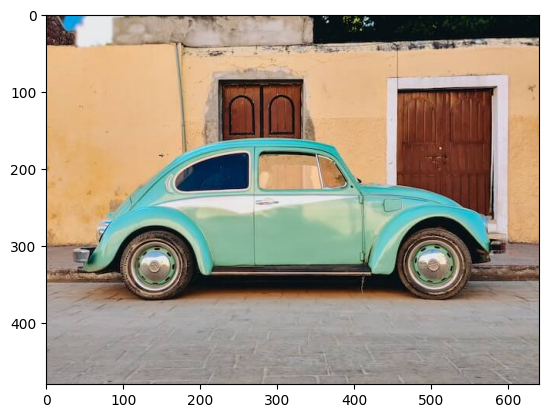

In [ ]:
# Now we will work with a simple question answering example with the below image
url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/car.jpg"
sample_image = load_image(url)
plt.imshow(sample_image)

In [ ]:
# Lets ask the model what the color of the wall in the image is
# The model was trained with a specific syntax for QA tasks, so we will follow it for better results
question = "What is the color of the wall?"
input_text = f"answer en {question}"

# Once we get the input text, we can encode it using the processor.
# The processor will return the input_ids, attention_mask and pixel_values.
# Input_ids are the tokenized input text.
#The preprocessor will add special tokens where the image patches will go, we will have 256 of such tokens.
processed_input = processor(text=input_text, images=sample_image, return_tensors="pt").to(torch.bfloat16)
processed_input["input_ids"]


# Tokens with value some value below are the image tokens (try to guess what they could be!). This index can be accessed with model.config.image_token_index once we create the model instance. These tokens are used as placeholders now, and will be replaced with the image embeddings in the model forward pass.

You are passing both `text` and `images` to `PaliGemmaProcessor`. The processor expects special image tokens in the text, as many tokens as there are images per each text. It is recommended to add `<image>` tokens in the very beginning of your text. For this call, we will infer how many images each text has and add special tokens.


tensor([[257152, 257152, 257152, 257152, 257152, 257152, 257152, 257152, 257152,
         257152, 257152, 257152, 257152, 257152, 257152, 257152, 257152, 257152,
         257152, 257152, 257152, 257152, 257152, 257152, 257152, 257152, 257152,
         257152, 257152, 257152, 257152, 257152, 257152, 257152, 257152, 257152,
         257152, 257152, 257152, 257152, 257152, 257152, 257152, 257152, 257152,
         257152, 257152, 257152, 257152, 257152, 257152, 257152, 257152, 257152,
         257152, 257152, 257152, 257152, 257152, 257152, 257152, 257152, 257152,
         257152, 257152, 257152, 257152, 257152, 257152, 257152, 257152, 257152,
         257152, 257152, 257152, 257152, 257152, 257152, 257152, 257152, 257152,
         257152, 257152, 257152, 257152, 257152, 257152, 257152, 257152, 257152,
         257152, 257152, 257152, 257152, 257152, 257152, 257152, 257152, 257152,
         257152, 257152, 257152, 257152, 257152, 257152, 257152, 257152, 257152,
         257152, 257152, 257

In [ ]:
class CustomPaliGemma(PaliGemmaForConditionalGeneration):
    def __init__(self, config):
        super().__init__(config)

    def forward(self, *args, **kwargs):
        # Our custom forward pass will handle the multimodal fusion
        return our_custom_forward(self, *args, **kwargs)

    def get_image_embeddings(self, pixel_values: torch.FloatTensor) -> torch.Tensor:
        """
        Processes raw pixel values into normalized image embeddings.

        Args:
            pixel_values: (batch_size, channels=3, height=224, width=224) - input images

        Returns:
            image_embeddings: (batch_size, num_patches=256, hidden_size=2304) - processed image features
        """
        # TODO: Call the vision encoder (`self.vision_tower`) on `pixel_values` to get the raw image features.
        # Hint: The output will be a tensor of shape (batch_size, num_patches=256, vision_hidden_size=1152).
        vision_outputs = self.vision_tower(pixel_values)  # Replace `None` with the correct function call

        # TODO: Pass the raw image features (`vision_outputs.last_hidden_state`) through the multimodal projector
        # (`self.multi_modal_projector`) to align the embeddings to the text model's space.
        # Hint: The output shape should be (batch_size, num_patches=256, text_hidden_size=2304).
        image_embeddings = self.multi_modal_projector(vision_outputs.last_hidden_state)  # Replace `None` with the correct function call

        # Normalize the embeddings using text config dimensions for compatibility
        image_embeddings = image_embeddings / (self.config.text_config.hidden_size**0.5)

        return image_embeddings

    def merge_text_and_images(
        self,
        text_embeddings: torch.Tensor,
        input_ids: torch.Tensor,
        pixel_values: torch.Tensor
    ) -> Tuple[torch.Tensor, torch.Tensor]:
        """
        Fuses image embeddings with text embeddings at specified token positions.

        Args:
            text_embeddings: (batch_size, seq_len, hidden_size=2304) - initial text embeddings
            input_ids: (batch_size, seq_len) - token IDs containing image placeholders
            pixel_values: (batch_size, channels=3, height=224, width=224) - input images

        Returns:
            tuple:
                - image_embeddings: (batch_size, num_patches=256, hidden_size=2304)
                - fused_embeddings: (batch_size, seq_len, hidden_size=2304)
        """

        # TODO Step 1: Generate normalized image embeddings from raw pixels.
        # Hint: Call `self.get_image_embeddings` with `pixel_values` as input. This will return a tensor of shape (batch_size, num_patches=256, hidden_size=2304).
        image_embeddings = self.get_image_embeddings(pixel_values)  # (B, 256, 2304)  # Replace `...` with the correct function call

        #TODO Step 2: Create a boolean mask for identifying special "image tokens" in the input IDs.
        # Hint: Compare `input_ids` with `self.config.image_token_index`.The resulting mask should have shape (batch_size, seq_len).
        image_token_mask = (input_ids == self.config.image_token_index)  # (B, seq_len)  # Replace `...` with the correct boolean condition

        # Expand the mask to match the embedding dimensions.
        # Resulting shape should be (batch_size, seq_len, hidden_size).
        image_token_mask = image_token_mask.unsqueeze(-1).expand_as(text_embeddings)

        # Step 3: Validate that the number of "image tokens" matches the number of patches in `image_embeddings`.
        batch_size, seq_len = input_ids.shape
        num_image_tokens = image_token_mask.sum() // self.config.text_config.hidden_size
        expected_tokens = image_embeddings.shape[1]  # Always 256 patches

        if num_image_tokens != expected_tokens:
            raise ValueError(
                f"Mismatch between {num_image_tokens} image tokens in text "
                f"and {expected_tokens} image embeddings from vision model"
            )

        # Step 4: Ensure device compatibility between text and image embeddings.
        image_embeddings = image_embeddings.to(
            device=text_embeddings.device,
            dtype=text_embeddings.dtype
        )

        #TODO Step 5: Replace placeholder tokens in `text_embeddings` with actual `image_embeddings`.
        # Hint: Use `.masked_scatter()` to replace values where `image_token_mask` is True.
        fused_embeddings = text_embeddings.masked_scatter(image_token_mask, image_embeddings.view(-1))  # Replace placeholder tokens in `text_embeddings`
        return image_embeddings, fused_embeddings

# The merged text and image embeddings are then passed through the transformer layers to generate the output tokens. The model is trained to predict the next token in the sequence, conditioned on both the text and image inputs.

# Experiments
Now is the fun part! Let's create an instance of our custom model and first test it on a simple question-answering task.
Apart from QA, here are some other templates and prompts you can play around with:

"cap {lang}": Raw short caption (from WebLI-alt)  
"caption {lang}": Nice, COCO-like short captions  
"describe {lang}": Longer, more descriptive captions  
"ocr": Optical character recognition  
"answer {lang} {question}": Question answering about the image contents  
"question {lang} {answer}": Question generation for a given answer

In [ ]:
# Let's create an instance of our custom model and test it with a sample prompt and image. It should take around 1 minute (provided you are using T4)
processor = PaliGemmaProcessor.from_pretrained(model_id)
custom_model = CustomPaliGemma.from_pretrained(model_id, torch_dtype=torch.bfloat16).to(device).eval()

config.json:   0%|          | 0.00/1.33k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/75.1k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/1.07G [00:00<?, ?B/s]

Error while downloading from https://cdn-lfs-us-1.hf.co/repos/15/5a/155a8996272ff122a6c0c804bafc5530269fd7555a4b944b1cd28f7dabc90c33/94ab5acf581f2afb3fe558bf98152ec572e4d66c6180fce4dae825e3b8ef4a9a?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27model-00002-of-00002.safetensors%3B+filename%3D%22model-00002-of-00002.safetensors%22%3B&Expires=1742704687&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTc0MjcwNDY4N319LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy11cy0xLmhmLmNvL3JlcG9zLzE1LzVhLzE1NWE4OTk2MjcyZmYxMjJhNmMwYzgwNGJhZmM1NTMwMjY5ZmQ3NTU1YTRiOTQ0YjFjZDI4ZjdkYWJjOTBjMzMvOTRhYjVhY2Y1ODFmMmFmYjNmZTU1OGJmOTgxNTJlYzU3MmU0ZDY2YzYxODBmY2U0ZGFlODI1ZTNiOGVmNGE5YT9yZXNwb25zZS1jb250ZW50LWRpc3Bvc2l0aW9uPSoifV19&Signature=u1kLid7rT2RvABPi1-gF3-gYVPuHD1sWblQqouzUoriHpS5TxAxVMKyTgCouYvxS6kc7Z6AGIj5kK%7EkSAhSoqoGd-WAXo0f6pdtAztAI-8Xj0pttGdubyZr3QkzhLF6qWLIKfYQb5D4qdIyYYzNuaPpgAzGcekb%7E7JOP4DUWR%7EyO%7EPm9LCgVcerUm%7Ed6znHh6clk4fhXNo1z9iNw2f0x39nDk9yF

model-00002-of-00002.safetensors:  18%|#7        | 189M/1.07G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/173 [00:00<?, ?B/s]

In [ ]:
def generate_with_paligemma(model, processor, prompt, image):
    model_inputs = processor(text=prompt, images=image, return_tensors="pt").to(torch.bfloat16).to(model.device)
    input_len = model_inputs["input_ids"].shape[-1]

    with torch.inference_mode():
        generation = model.generate(**model_inputs, max_new_tokens=100, do_sample=False)
        generation = generation[0][input_len:]
        decoded = processor.decode(generation, skip_special_tokens=True)
    return (decoded)

You are passing both `text` and `images` to `PaliGemmaProcessor`. The processor expects special image tokens in the text, as many tokens as there are images per each text. It is recommended to add `<image>` tokens in the very beginning of your text. For this call, we will infer how many images each text has and add special tokens.
/usr/local/lib/python3.11/dist-packages/torch/_inductor/compile_fx.py:1948: UserWarning: Tesla T4 does not support bfloat16 compilation natively, skipping
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/_inductor/compile_fx.py:1948: UserWarning: Tesla T4 does not support bfloat16 compilation natively, skipping
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/_inductor/compile_fx.py:1948: UserWarning: Tesla T4 does not support bfloat16 compilation natively, skipping
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/_inductor/compile_fx.py:1948: UserWarning: Tesla T4 does not support bfloat16 compilation natively, skipp

Unsupported: generator

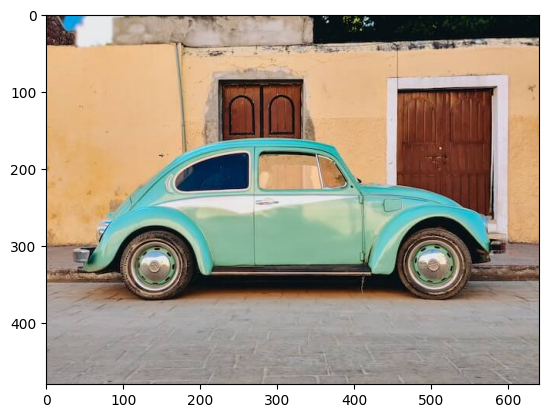

In [ ]:
url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/car.jpg"
image = load_image(url)
plt.imshow(image)
question = "What is the color of the wall?"
input_text = f"answer en {question}"
torch._dynamo.config.suppress_errors = True
torch._dynamo.config.verbose = False
torch._dynamo.reset()
generated = generate_with_paligemma(custom_model, processor, input_text, image)
print("ANSWER:",generated)

In [ ]:
# Let's test the model with a different image and prompt - specifically an OCR task with the below image!

image_url = "https://storage.googleapis.com/gweb-developer-goog-blog-assets/images/3.original_uC39cPq.png"
image = load_image(image_url)
plt.imshow(image)
prompt = "ocr"
generated = generate_with_paligemma(custom_model, processor, prompt, image)
print("ANSWER:",generated)

In [ ]:
#TODO Finally run the model on a custom (image, prompt) and paste the results in your Overleaf document! Experiment with different tasks and see what all the model can do!
